### IMPORT


In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [3]:
# load the data set
df_art = pd.read_csv('tabular/artists.csv')
df_track = pd.read_csv('tabular/tracks.csv')

### UNDERSTANDING

In [7]:
df_art.head()

id                      name  popularity  followers  \
0  19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0     9904.0   
1  4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0    13047.0   
2  0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0    11933.0   
3  09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0     4724.0   
4  0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0    42515.0   

                                              genres  
0  ['acid house', 'chicago house', 'chicago rap',...  
1                 ['chicago house', 'classic house']  
2   ['acid house', 'chicago house', 'classic house']  
3                  ['chicago house', 'garage house']  
4  ['chicago house', 'deep house', 'float house',...

In [8]:
df_track.head()

id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       290479     False          52             5   
1            1       539229     False          45             5   
2            1       264200     False          39             5   
3            1       387413     False           0             6   
4            1       248956     False           0             1   

                  artists   album_type          album_name album_release_date  \
0                  Kölsch        album                1989         2017-09-22   
1                 Kiasmos        album             Kiasmos         2014-10-27   
2         Joris Delacroix        album       Night Visions         2018-06-22   
3  Pan-Pot;Anfisa Letyago       single  Confronted Remixes         2019-12-06   
4   Kollektiv Turmstrasse  compilation   10 Years Diynamic         2016-09-16   

  album_release_date_precision  album_total_tracks  danceability  energy  key  \
0                          day                  13         0.532   0.517    0   
1                          day                   8         0.750   0.340    5   
2                          day                  10         0.801   0.639    7   
3                          day                   7         0.675   0.543    6   
4                          day                  13         0.761   0.671   11   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -9.846     1       0.4930        0.5470             0.535    0.0854   
1   -12.759     0       0.0326        0.1670             0.648    0.1060   
2   -10.681     0       0.1040        0.0290             0.466    0.0688   
3   -11.983     0       0.0639        0.0484             0.719    0.1120   
4   -13.346     0       0.0418        0.5130             0.917    0.1150   

   valence    tempo  features_duration_ms  time_signature  start_of_fade_out  \
0   0.2390  186.001                290479               3          275.90530   
1   0.1450  120.016                539229               4          517.28253   
2   0.3200  118.052                264200               3          259.04180   
3   0.0374  128.990                387414               4          387.41360   
4   0.1190  120.003                248957               4          239.63574   

   tempo_confidence  time_signature_confidence  key_confidence  \
0             0.020                      1.000           0.500   
1             0.678                      0.326           0.410   
2             0.847                      0.457           0.904   
3             0.882                      0.498           0.512   
4             0.882                      1.000           0.474   

   mode_confidence  n_beats  n_bars           genre  
0            0.525    705.0   234.0  minimal-techno  
1            0.589   1074.0   269.0  minimal-techno  
2            0.760    516.0   171.0  minimal-techno  
3            0.503    826.0   207.0  minimal-techno  
4            0.459    493.0   123.0  minimal-techno

In [1245]:
df_art.shape

(30141, 5)

In [1246]:
df_track.shape

(109547, 34)

In [22]:
df_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30141 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30140 non-null  object 
 1   name        30139 non-null  object 
 2   popularity  30140 non-null  float64
 3   followers   30140 non-null  float64
 4   genres      30140 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [25]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109547 entries, 0 to 109546
Data columns (total 34 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            109547 non-null  object 
 1   name                          109547 non-null  object 
 2   disc_number                   109547 non-null  int64  
 3   duration_ms                   109547 non-null  int64  
 4   explicit                      109547 non-null  bool   
 5   popularity                    109547 non-null  int64  
 6   track_number                  109547 non-null  int64  
 7   artists                       109547 non-null  object 
 8   album_type                    109547 non-null  object 
 9   album_name                    109547 non-null  object 
 10  album_release_date            109547 non-null  object 
 11  album_release_date_precision  109547 non-null  object 
 12  album_total_tracks            109547 non-nul

In [100]:
df_track.nunique()

id                              89562
name                            73471
disc_number                        12
duration_ms                     50594
explicit                            2
popularity                         96
track_number                      302
artists                         31480
album_type                          3
album_name                      46473
album_release_date               8772
album_release_date_precision        3
album_total_tracks                155
danceability                     1174
energy                           2083
key                                12
loudness                        19478
mode                                2
speechiness                      1489
acousticness                     5061
instrumentalness                 5345
liveness                         1722
valence                          1790
tempo                           45604
features_duration_ms            50656
time_signature                      5
start_of_fad

In [102]:
df_art.nunique()

id            30137
name          29917
popularity       92
followers     21531
genres        11029
dtype: int64

## Artists

### null

In [47]:
empty_name = df_art[df_art['name'].isnull()]
empty_name

id name  popularity  followers genres
11872                     NaN  NaN         NaN        NaN    NaN
21223  4oPYazJJ1o4rWBrTw9lm40  NaN        47.0    35655.0     []

In [1259]:
df_art = df_art.dropna()

In [49]:
df_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30139 non-null  object 
 1   name        30139 non-null  object 
 2   popularity  30139 non-null  float64
 3   followers   30139 non-null  float64
 4   genres      30139 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


### data cleaning

In [50]:
# check duplicate_name from artists
duplicate_name = df_art[df_art.duplicated(subset='name', keep=False)]
duplicate_name

id               name  popularity  followers  \
143    60alJNnwGVBdNXrx4kOfW0            Tatiana        50.0    68928.0   
175    41afDgAYLuPgxrh1idDJsD            Tatiana        15.0      819.0   
193    091dY4SjI2cy4YHdvhCjg1              Sasha        47.0    35929.0   
201    1UDjGxtS0sJPWn9Oc3M0Fn  Wheels on the Bus        42.0    26428.0   
224    51ZPG7Kk4SfmmKFg0K6RBU   Hush Little Baby        28.0      438.0   
...                       ...                ...         ...        ...   
29904  2w5c2l70mYNDdSLifFyZjJ              Monty        33.0    17540.0   
29913  4wTgto2eauupLwUCQ59vLK             DIESEL         9.0       10.0   
29978  7BXUVNB9LlrJ99RhTwFlqI            Oriente         6.0        0.0   
29986  3I6LbsaSbcArZLIslilSYu               RØRY        13.0       26.0   
30020  3NWwFclLemTYGnCvAUC8nh            Oriente         6.0        0.0   

                                                  genres  
143    ['cancion infantil mexicana', 'musica para nin...  
175                                                   []  
193                                                   []  
201                                 ["children's music"]  
224                                                   []  
...                                                  ...  
29904                     ['french dnb', 'halftime dnb']  
29913                                                 []  
29978                                                 []  
29986                                                 []  
30020                                                 []  

[433 rows x 5 columns]

In [1249]:
df_art[df_art.duplicated(subset='name', keep=False)]['name'].nunique()

211

In [51]:
# check duplicate_id 
duplicate_ids = df_art[df_art.duplicated(keep=False)]
duplicate_ids

id                name  popularity   followers  \
4158   4fEkbug6kZzzJ8eYX6Kbbp                  KK        75.0  12587568.0   
12798  4fEkbug6kZzzJ8eYX6Kbbp                  KK        75.0  12587568.0   
15726  13or1Wf6ipcvSIiurZATvw  La Sonora Dinamita        63.0    867874.0   
15776  13or1Wf6ipcvSIiurZATvw  La Sonora Dinamita        63.0    867874.0   

                                                  genres  
4158                       ['filmi', 'modern bollywood']  
12798                      ['filmi', 'modern bollywood']  
15726  ['cumbia', 'ranchera', 'salsa colombiana', 'tr...  
15776  ['cumbia', 'ranchera', 'salsa colombiana', 'tr...

In [1260]:
df_art = df_art.drop_duplicates(subset='id', keep='first')
df_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30137 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30137 non-null  object 
 1   name        30137 non-null  object 
 2   popularity  30137 non-null  float64
 3   followers   30137 non-null  float64
 4   genres      30137 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [1261]:
# check records differing with only one attribute
d = {}
for col in df_art.columns:
    n = df_art[df_art[df_art.columns.difference([col])].duplicated(keep=False)].shape[0]
    d[col] = n
d

{'id': 2, 'name': 0, 'popularity': 0, 'followers': 0, 'genres': 0}

In [1262]:
df_art[df_art[df_art.columns.difference(['id'])].duplicated(keep=False)]

id     name  popularity  followers genres
29978  7BXUVNB9LlrJ99RhTwFlqI  Oriente         6.0        0.0     []
30020  3NWwFclLemTYGnCvAUC8nh  Oriente         6.0        0.0     []

In [1263]:
df_art = df_art.drop(index = 30020)

In [1265]:
df_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30136 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30136 non-null  object 
 1   name        30136 non-null  object 
 2   popularity  30136 non-null  float64
 3   followers   30136 non-null  float64
 4   genres      30136 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


### feature engineering

In [54]:
import ast
genres = df_art['genres'].apply(lambda x: ast.literal_eval(x))
unique_genres = set()
for g in genres:
    unique_genres.update(g)

In [65]:
unique_genres

{'hardvapour',
 'neo soul',
 'indian ambient',
 'belo horizonte indie',
 'tagalog worship',
 'armenian pop',
 'slowcore',
 'australian indigenous',
 'spanish reggae',
 'ontario indie',
 'latin hip hop',
 'german techno',
 'christian alternative rock',
 'arabesk',
 'old school highlife',
 'frafra',
 'brazilian bass',
 'neo-crust',
 'swing',
 'deep funk house',
 'uyghur pop',
 'bubblegum dance',
 'barockinterpreten',
 'norteno',
 'german orchestra',
 'folclore salteno',
 'vbs',
 'rap napoletano',
 'american post-rock',
 'japanese rockabilly',
 'kannada indie',
 'indian rock',
 'scottish indie',
 'dreamo',
 'jazz cubano',
 'bass music',
 'rebetiko',
 "death 'n' roll",
 'corrido',
 'bow pop',
 'norsk lovsang',
 'new york drill',
 'hyperpop en espanol',
 'minimal dubstep',
 'brit funk',
 'peruvian metal',
 'slovak rock',
 'native american',
 'stoner rock',
 'tejano',
 'filter house',
 'indian indie',
 'spanish electropop',
 'chill out',
 'munich indie',
 'musica cearense',
 'welsh metal',
 

In [64]:
len(unique_genres)

4074

In [1267]:
df_art['num_genres'] = df_art['genres'].apply(lambda x: len(ast.literal_eval(x)) if pd.notnull(x) else 0)
df_art['first_genre'] = df_art['genres'].apply(lambda x: ast.literal_eval(x)[0] if len(ast.literal_eval(x)) > 0 else '')
df_art.head()

id                      name  popularity  followers  \
0  19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0     9904.0   
1  4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0    13047.0   
2  0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0    11933.0   
3  09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0     4724.0   
4  0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0    42515.0   

                                              genres  num_genres  \
0  ['acid house', 'chicago house', 'chicago rap',...           5   
1                 ['chicago house', 'classic house']           2   
2   ['acid house', 'chicago house', 'classic house']           3   
3                  ['chicago house', 'garage house']           2   
4  ['chicago house', 'deep house', 'float house',...           4   

     first_genre  
0     acid house  
1  chicago house  
2     acid house  
3  chicago house  
4  chicago house

In [87]:
df_art.describe()

popularity     followers    num_genres
count  30137.000000  3.013700e+04  30137.000000
mean      36.657298  4.164601e+05      1.978067
std       17.227730  2.483351e+06      1.509334
min        0.000000  0.000000e+00      1.000000
25%       24.000000  1.472000e+03      1.000000
50%       37.000000  1.581200e+04      1.000000
75%       49.000000  1.186220e+05      2.000000
max      100.000000  1.141635e+08     15.000000

In [94]:
df_art[df_art['followers'] == 0].sort_values(by = 'popularity', ascending=False)

id                                            name  \
19744  6HR09922Xdqqnv6OKLeTRO                                    Simon Berard   
10861  71Sf7GnUs0WzO2zAJIbhvx                                  Rodrigo Campos   
3197   4imLzFfMT1Daoy5WUpGxwu                                            Gaab   
29094  07Gig9aJZ6bx2XHB6vMxei                      Coros - La Bella Durmiente   
25207  1bfxFwBzYj2h6M3WMn4cQc                                          Farhid   
...                       ...                                             ...   
15392  2RtSwsP1R8KEM4k89zPJst                                    Лев Болдырев   
15390  3r71h5Yzuzi9URhph8PQl8                             Евгения Гороховская   
15385  1wxSphxPpS1YVTeedaolE2  Инструментальный ансамбль п/у Виктора Фридмана   
15379  09BtbxUKiAluFkkEFtNazH                             Валентина Клепацкая   
15400  22N3qYIXjGwxa8MAWOAodt                                 Sonya Timofeeva   

       popularity  followers genres  num_genres first_genre  
19744        40.0        0.0     []           0              
10861        26.0        0.0     []           0              
3197         25.0        0.0     []           0              
29094        23.0        0.0     []           0              
25207        19.0        0.0     []           0              
...           ...        ...    ...         ...         ...  
15392         0.0        0.0     []           0              
15390         0.0        0.0     []           0              
15385         0.0        0.0     []           0              
15379         0.0        0.0     []           0              
15400         0.0        0.0     []           0              

[120 rows x 7 columns]

### understanding

In [96]:
art_num = ['popularity', 'followers', 'num_genres']
art_cat = ['first_genre']

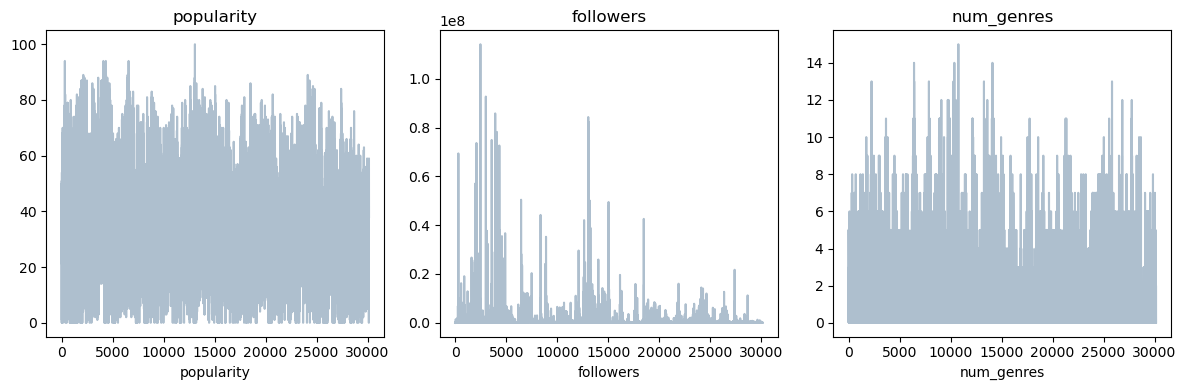

In [97]:
# make a plot for every numeric columns to visualize the data and see possible correlations
rows = 1
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(12, 4))

for i, column in enumerate(art_num):
    ax = axs[i]  
    ax.plot(df_art[column], color='#AEBFCE')  
    ax.set_xlabel(column)  
    ax.set_title(column)   
    ax.tick_params(axis='x')

plt.tight_layout() 
plt.show()

In [101]:
df_art['num_genres'].value_counts()

1     9019
0     7556
2     6071
3     3567
4     1855
5      968
6      478
7      279
8      168
9       83
10      39
11      31
12      12
13       7
14       3
15       1
Name: num_genres, dtype: int64

In [1270]:
df_art['followers'].describe()

count    3.013600e+04
mean     4.164739e+05
std      2.483391e+06
min      0.000000e+00
25%      1.472000e+03
50%      1.581250e+04
75%      1.186262e+05
max      1.141635e+08
Name: followers, dtype: float64

In [1276]:
df_art['popularity'].describe()

count    30136.000000
mean        36.658316
std         17.227111
min          0.000000
25%         24.000000
50%         37.000000
75%         49.000000
max        100.000000
Name: popularity, dtype: float64

In [1281]:
df_art.groupby('num_genres')['popularity'].median()

num_genres
0     24.0
1     37.0
2     42.0
3     43.0
4     46.0
5     48.0
6     50.0
7     52.0
8     52.0
9     52.0
10    55.0
11    54.0
12    48.5
13    60.0
14    54.0
15    58.0
Name: popularity, dtype: float64

In [1279]:
df_art[df_art['num_genres']==15]

id       name  popularity  followers  \
10753  6JW8wliOEwaDZ231ZY7cf4  Sepultura        58.0  1725311.0   

                                                  genres  num_genres  \
10753  ['alternative metal', 'brazilian groove metal'...          15   

             first_genre  
10753  alternative metal

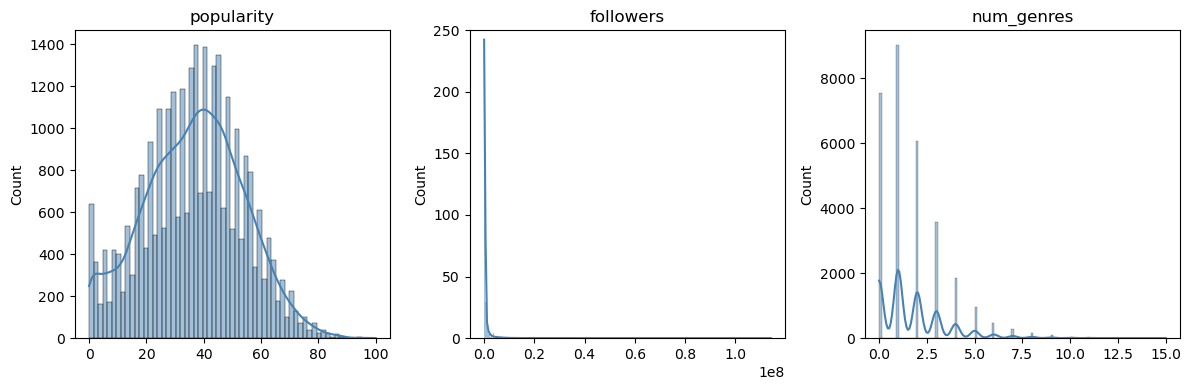

In [100]:
# making histogram plots for numerical variables
rows = 1
cols = 3 

fig, axs = plt.subplots(rows, cols, figsize=(12, 4)) 

for i, col in enumerate(art_num):
    ax = axs[i]
    sns.histplot(df_art[col], ax=ax, kde=True, color = 'steelblue')
    ax.set_title(col)
    ax.set_xlabel('')
    if col == 'followers':
        ax.set_ylim(0, 250)

plt.tight_layout()
plt.show()

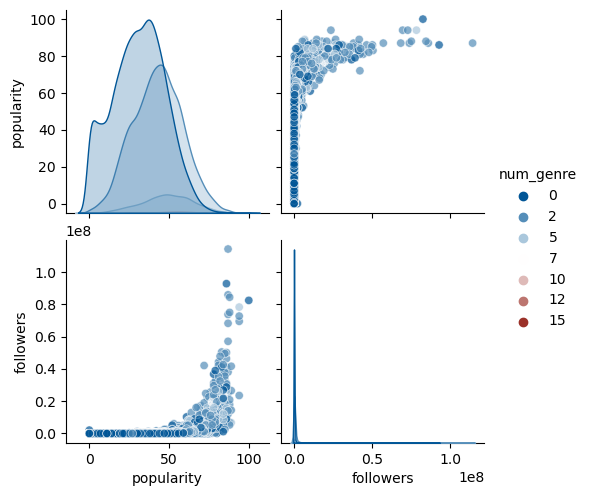

In [1315]:
desired_categories = [0, 2, 5, 7, 10, 12, 15]

# Create a mapping from original values to desired categories
def map_categories(x):
    if x in desired_categories:
        return x
    for i in range(len(desired_categories) - 1):
        if desired_categories[i] < x < desired_categories[i + 1]:
            return desired_categories[i]
    return desired_categories[-1]  # Handle values greater than the last desired category

# Apply the mapping
df_art['num_genre'] = df_art['num_genres'].apply(map_categories)

# Number of distinct colors needed
num_colors = len(desired_categories)

# Create a palette with distinct colors from the colormap
colors = [cmap(i / (num_colors - 1)) for i in range(num_colors)]

# Convert the RGBA colors to hex format
palette = [clr.to_hex(color) for color in colors]

# Create the pairplot
sns.pairplot(df_art[art_num + ['num_genre']], 
             kind='scatter', 
             hue='num_genre', 
             palette=dict(zip(desired_categories, palette)),  # Map categories to colors
             plot_kws={'alpha':0.7})  # Adjust the transparency if needed

# Show the plot
plt.show()

In [1318]:
df_art = df_art.drop(columns=['num_genre', 'num_genres_mapped'])

In [1317]:
# calculate correlation pearson
correlation = df_art[art_num].corr(method='spearman')
correlation

popularity  followers
popularity    1.000000   0.791035
followers     0.791035   1.000000

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
cmap = clr.LinearSegmentedColormap.from_list('custom_map', ['#015697','white',  (0.60784314, 0.19215686, 0.16078431)], N=256)


In [3]:
def deco_heatmap(correlation, figsize=(22, 10)):
    import matplotlib.pyplot as plt
    import matplotlib.colors as clr
    import numpy as np
    cmap = clr.LinearSegmentedColormap.from_list('custom_map', ['#015697','white',  (0.60784314, 0.19215686, 0.16078431)], N=256)
    
    
    mask=np.tri(len(correlation.columns))
    np.fill_diagonal(mask, 0)

    mask=mask.T

    # make heatmap
    plt.figure(figsize=figsize)  
    sns.heatmap(correlation, annot=True, cmap=cmap, linewidths=.5, mask = mask)
    plt.yticks(rotation=0) 
    plt.title('Correlation Heatmap')
    plt.show()

In [4]:
deco_heatmap(correlation, figsize=(6, 3))

NameError: name 'correlation' is not defined

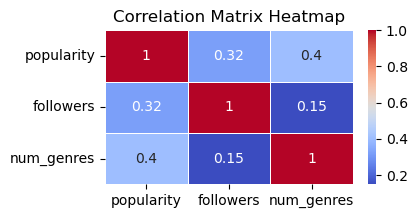

In [104]:

# make heatmap
plt.figure(figsize=(4, 2))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [105]:
# find correlation_spearman
correlation_spearman = df_art[art_num].corr(method = "spearman")
correlation_spearman

popularity  followers  num_genres
popularity    1.000000   0.791055    0.439534
followers     0.791055   1.000000    0.689586
num_genres    0.439534   0.689586    1.000000

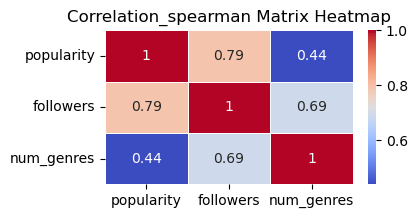

In [106]:
# make heatmap
plt.figure(figsize=(4, 2))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

In [1227]:
df_art.to_csv('artists_new.csv', index=False)

## Tracks

### track understanding

In [4]:
tracks_cat = [
              'explicit',
              'album_type',
              'album_release_date_precision',
              'key',
              'mode', 
              'time_signature',
                ]

In [5]:
tracks_num = [
              'duration_ms',
              'disc_number',
              'popularity', 
              'track_number', 
              'album_total_tracks', 
              'danceability', 
              'energy', 
              'loudness', 
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'liveness', 
              'valence', 
              'tempo', 
              'features_duration_ms',
              'start_of_fade_out',
              'tempo_confidence',
              'time_signature_confidence',
              'key_confidence', 
              'mode_confidence',
             'n_beats',
              'n_bars',
             ]

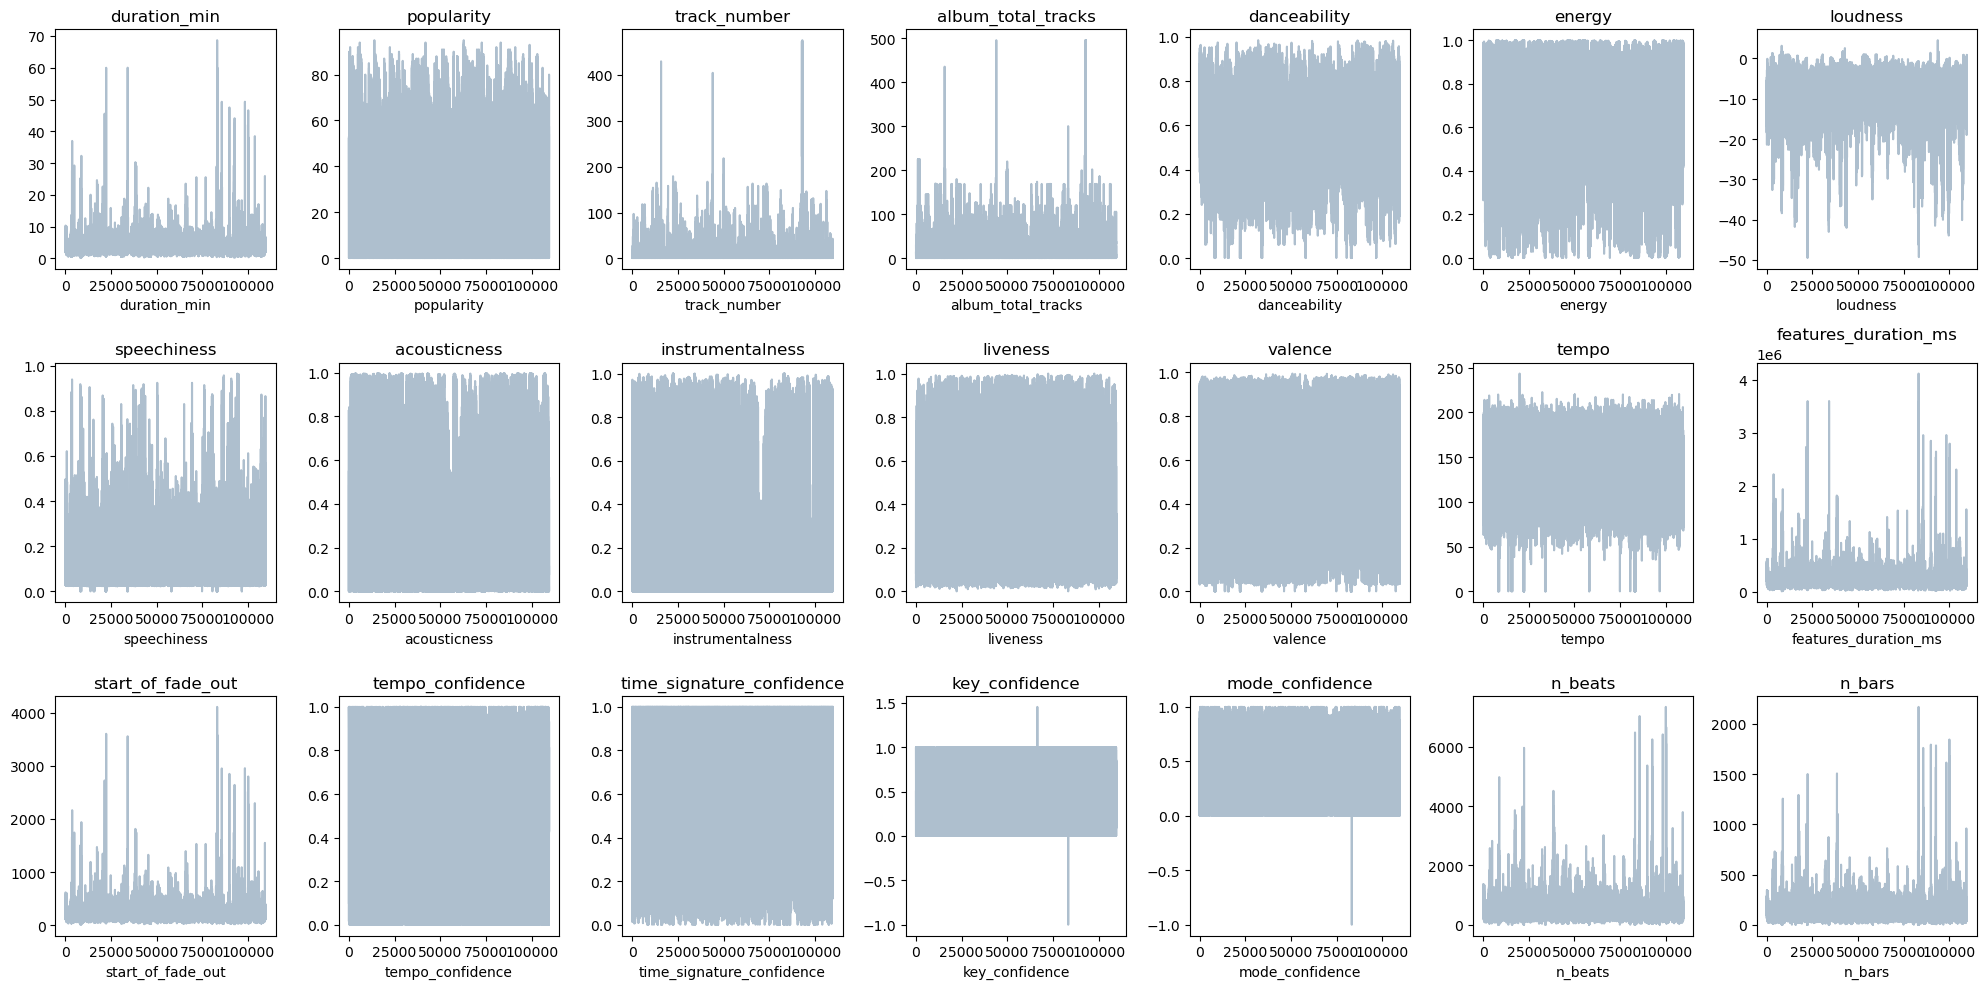

In [67]:
# make a plot for every numeric columns to visualize the data and see possible correlations
rows = 3
cols = 7

fig, axs = plt.subplots(rows, cols, figsize=(20, 10))

for i, column in enumerate(tracks_num):
    ax = axs[i // cols, i % cols]
    ax.plot(df_track[column], color = '#AEBFCE') 
    ax.set_xlabel(column)
    ax.set_title(column) 
    ax.tick_params(axis='x')

plt.tight_layout() 
plt.show()

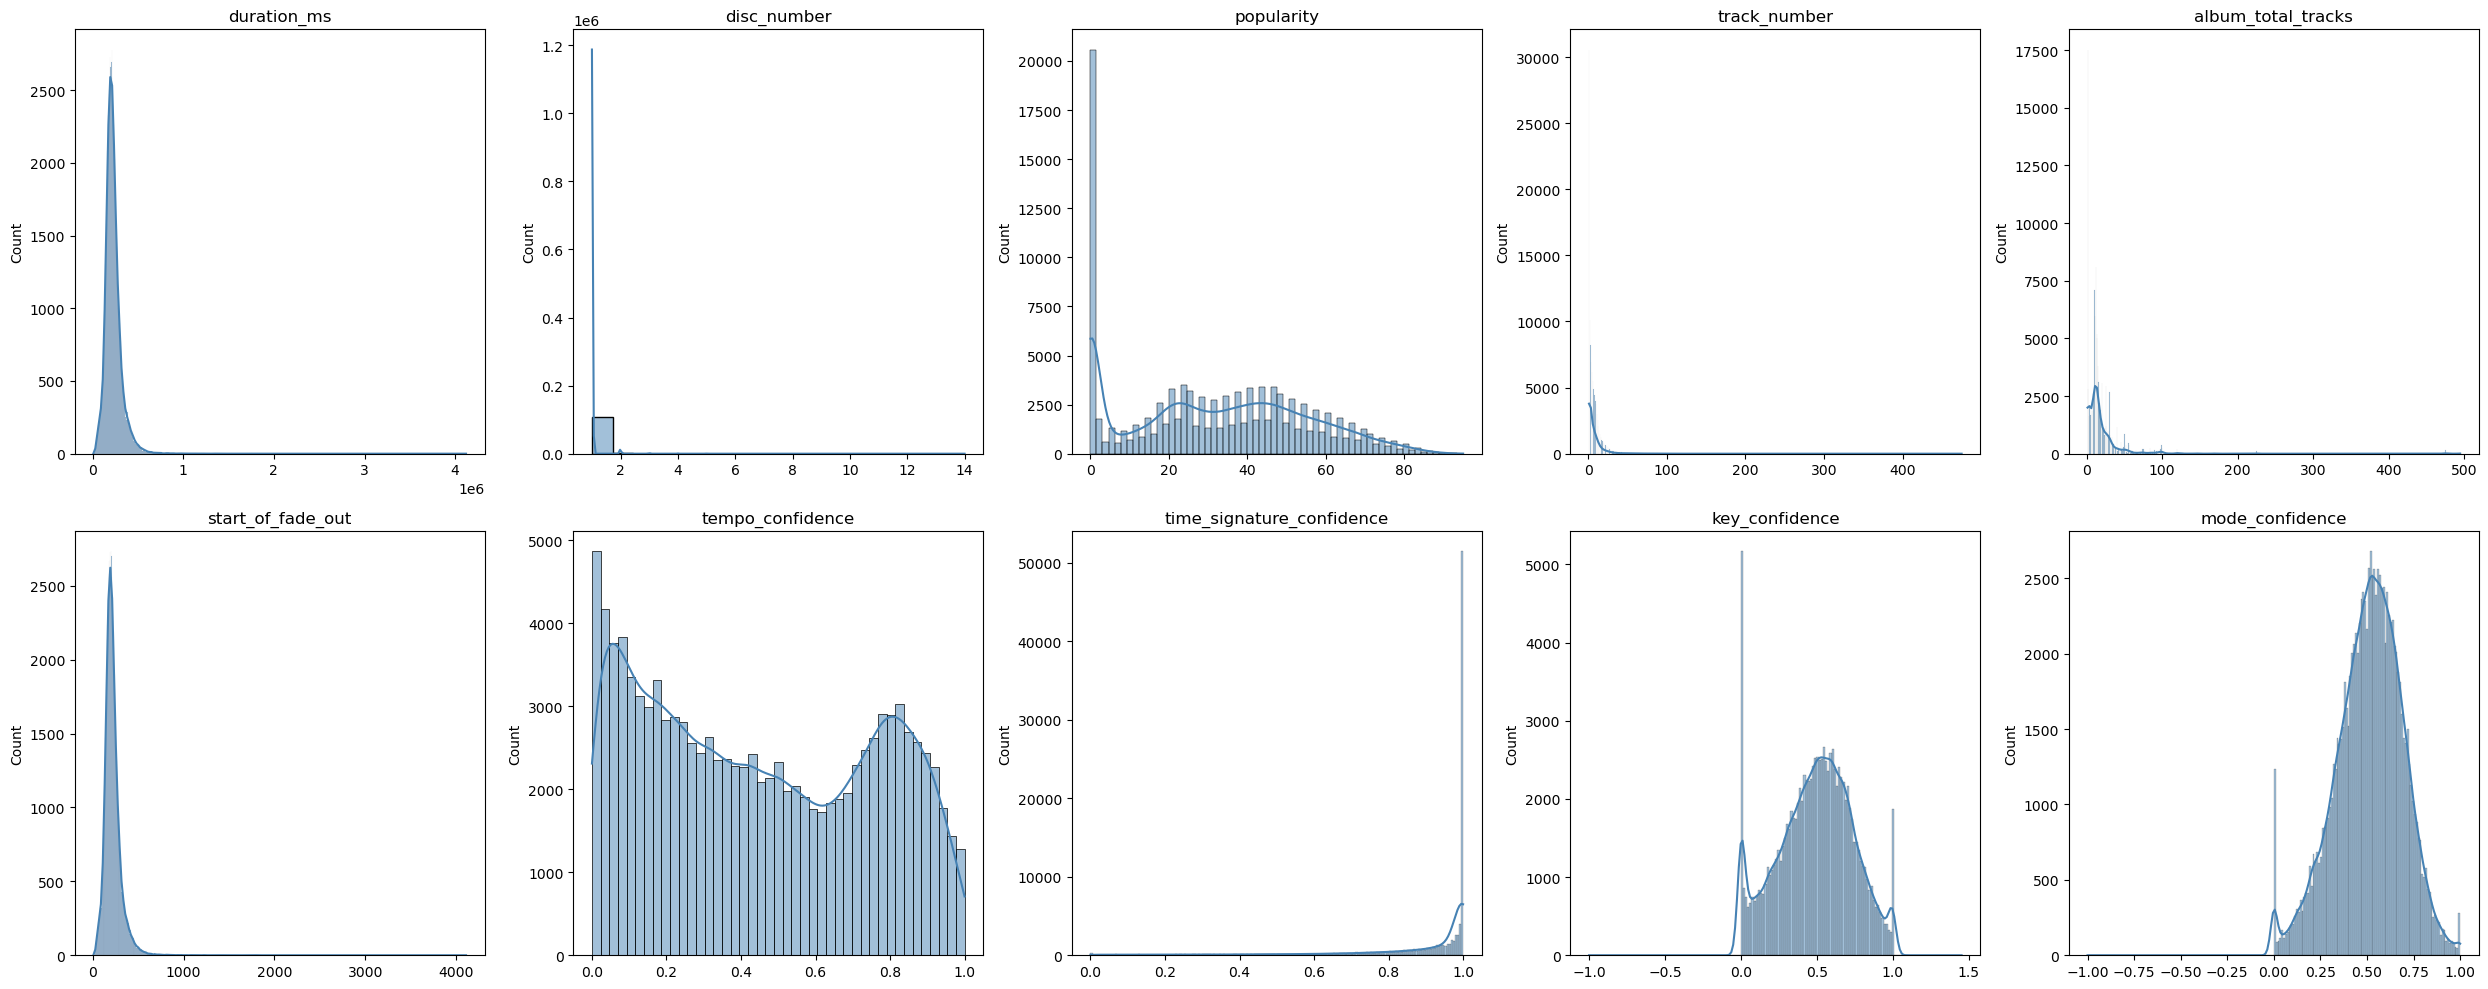

In [1335]:
# making histogram plots for numerical variables
rows = 2
cols = 5 

fig, axs = plt.subplots(rows, cols, figsize=(25, 10)) 

for i, col in enumerate(tracks_num):
    ax = axs[i // cols, i % cols]
    sns.histplot(df_track[col], ax=ax, kde=True, color = 'steelblue')
    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

In [79]:
# calculate correlation pearson
correlation = df_track[tracks_num].corr()
correlation

duration_min  popularity  track_number  \
duration_min                   1.000000    0.005768     -0.083432   
popularity                     0.005768    1.000000     -0.273397   
track_number                  -0.083432   -0.273397      1.000000   
album_total_tracks            -0.123503   -0.303395      0.791860   
danceability                  -0.082158    0.029324     -0.061295   
energy                         0.063436    0.014768     -0.104073   
loudness                      -0.001849    0.062528     -0.104655   
speechiness                   -0.066876   -0.059020     -0.026023   
acousticness                  -0.114341   -0.031477      0.103750   
instrumentalness               0.128042   -0.116889      0.019467   
liveness                       0.013777   -0.001678     -0.003081   
valence                       -0.167225   -0.014305      0.028528   
tempo                          0.021676    0.010787     -0.028106   
features_duration_ms           0.999936    0.005788     -0.083460   
start_of_fade_out              0.998529    0.005588     -0.083288   
tempo_confidence               0.031441    0.013251     -0.054836   
time_signature_confidence     -0.003162    0.092689     -0.050420   
key_confidence                 0.002194    0.027066      0.017977   
mode_confidence               -0.003165    0.067431      0.016452   
n_beats                        0.849645    0.007824     -0.085445   
n_bars                         0.836201    0.001660     -0.076310   

                           album_total_tracks  danceability    energy  \
duration_min                        -0.123503     -0.082158  0.063436   
popularity                          -0.303395      0.029324  0.014768   
track_number                         0.791860     -0.061295 -0.104073   
album_total_tracks                   1.000000     -0.073501 -0.119876   
danceability                        -0.073501      1.000000  0.132497   
energy                              -0.119876      0.132497  1.000000   
loudness                            -0.126451      0.259425  0.760288   
speechiness                         -0.037913      0.109969  0.141518   
acousticness                         0.129615     -0.168408 -0.732843   
instrumentalness                     0.019043     -0.187286 -0.184638   
liveness                             0.005286     -0.131788  0.187376   
valence                              0.055683      0.477675  0.264974   
tempo                               -0.032929     -0.046892  0.249758   
features_duration_ms                -0.123549     -0.082156  0.063432   
start_of_fade_out                   -0.122242     -0.077777  0.073944   
tempo_confidence                    -0.054865      0.457124  0.352088   
time_signature_confidence           -0.059965      0.369778  0.232922   
key_confidence                       0.028423     -0.040065 -0.102222   
mode_confidence                      0.020796     -0.068097 -0.197635   
n_beats                             -0.120552     -0.088254  0.181910   
n_bars                              -0.110779     -0.124820  0.140352   

                           loudness  speechiness  acousticness  \
duration_min              -0.001849    -0.066876     -0.114341   
popularity                 0.062528    -0.059020     -0.031477   
track_number              -0.104655    -0.026023      0.103750   
album_total_tracks        -0.126451    -0.037913      0.129615   
danceability               0.259425     0.109969     -0.168408   
energy                     0.760288     0.141518     -0.732843   
loudness                   1.000000     0.058635     -0.587083   
speechiness                0.058635     1.000000      0.000005   
acousticness              -0.587083     0.000005      1.000000   
instrumentalness          -0.435807    -0.089926      0.104621   
liveness                   0.078410     0.207924     -0.020905   
valence                    0.286910     0.036742     -0.110990   
tempo                      0.214803     0.0

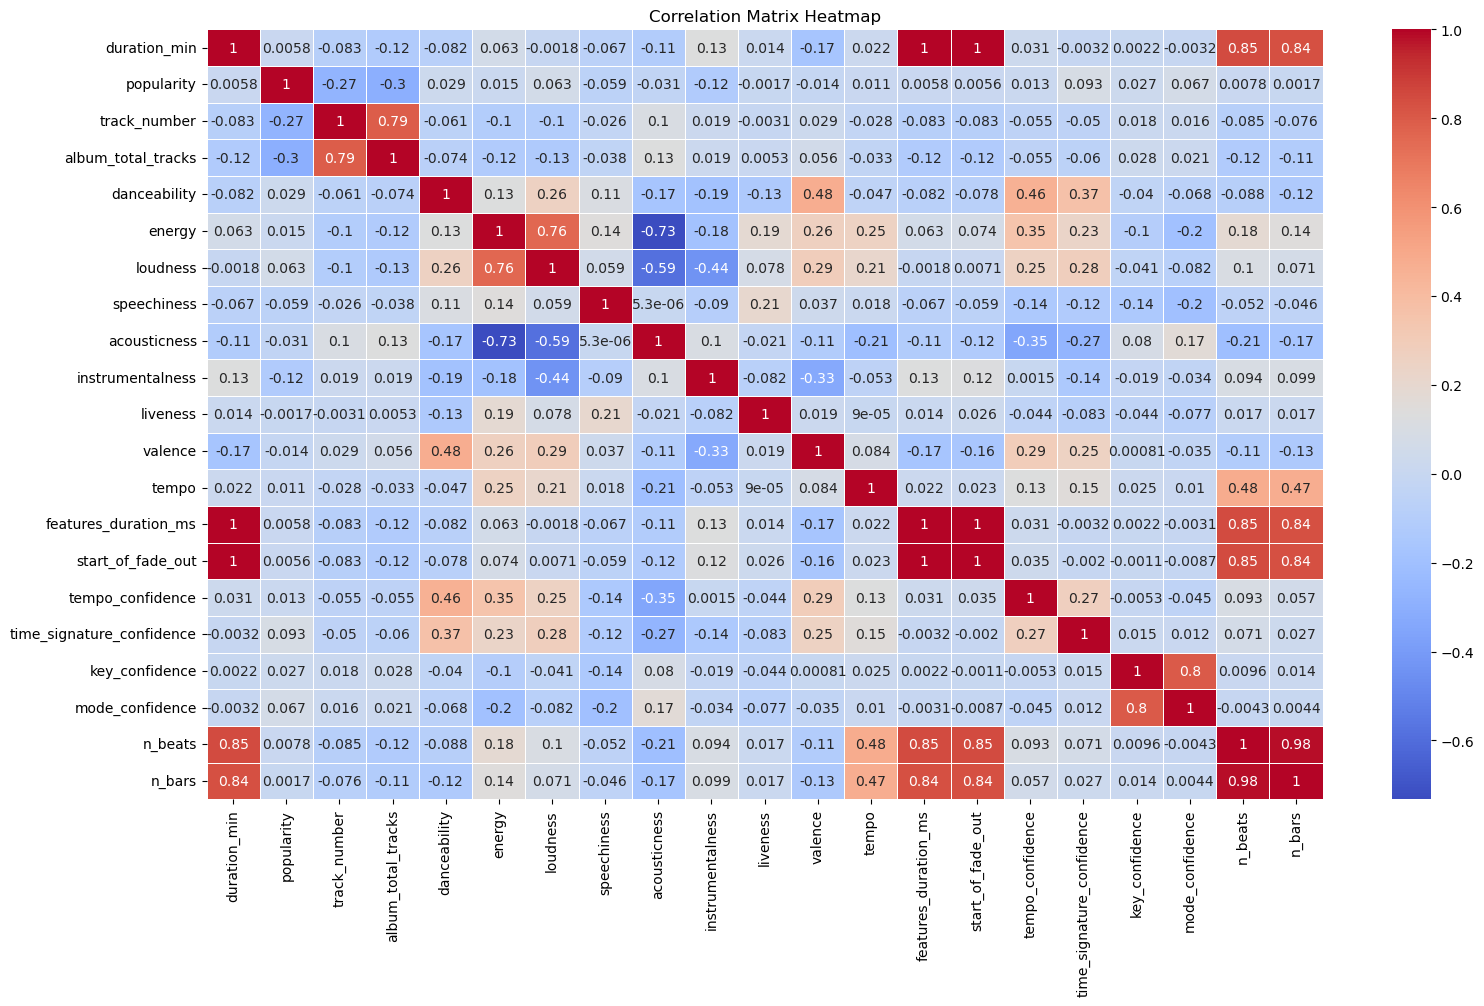

In [82]:
# make heatmap
plt.figure(figsize=(18, 10))  
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# find correlation_spearman
correlation_spearman = df_track[tracks_num].corr(method = "spearman")
correlation_spearman

duration_ms  disc_number  popularity  track_number  \
duration_ms                   1.000000     0.006557    0.046406     -0.034847   
disc_number                   0.006557     1.000000   -0.016858      0.041239   
popularity                    0.046406    -0.016858    1.000000     -0.382217   
track_number                 -0.034847     0.041239   -0.382217      1.000000   
album_total_tracks           -0.092566     0.166278   -0.424542      0.723799   
danceability                 -0.092500    -0.027680    0.018084     -0.093062   
energy                        0.107087    -0.026558   -0.003156     -0.053599   
loudness                      0.026299    -0.033421    0.048832     -0.046423   
speechiness                  -0.128295    -0.023003   -0.078452     -0.055411   
acousticness                 -0.173425     0.034784   -0.003659      0.064990   
instrumentalness              0.122937     0.002930   -0.090356     -0.048785   
liveness                     -0.039236     0.023520   -0.001229      0.033631   
valence                      -0.175941    -0.007319   -0.016610      0.058643   
tempo                         0.047004    -0.001345    0.016847     -0.039339   
features_duration_ms          0.999893     0.006563    0.046437     -0.034879   
start_of_fade_out             0.997249     0.006929    0.047133     -0.035325   
tempo_confidence              0.045686    -0.018070    0.020749     -0.065987   
time_signature_confidence    -0.050815    -0.033165    0.061098     -0.067162   
key_confidence                0.014492     0.012340    0.026986     -0.000479   
mode_confidence               0.017974     0.005373    0.071851     -0.010313   
n_beats                       0.795115     0.003349    0.043610     -0.056458   
n_bars                        0.784466     0.005204    0.035323     -0.047467   

                           album_total_tracks  danceability    energy  \
duration_ms                         -0.092566     -0.092500  0.107087   
disc_number                          0.166278     -0.027680 -0.026558   
popularity                          -0.424542      0.018084 -0.003156   
track_number                         0.723799     -0.093062 -0.053599   
album_total_tracks                   1.000000     -0.089068 -0.023311   
danceability                        -0.089068      1.000000  0.040293   
energy                              -0.023311      0.040293  1.000000   
loudness                            -0.016352      0.113928  0.751969   
speechiness                         -0.048662      0.159895  0.353506   
acousticness                         0.064944     -0.040818 -0.710022   
instrumentalness                    -0.088850     -0.147727 -0.042834   
liveness                             0.058267     -0.144236  0.179691   
valence                              0.117022      0.461768  0.215612   
tempo                               -0.044441     -0.066089  0.243187   
features_duration_ms                -0.092586     -0.092489  0.107093   
start_of_fade_out                   -0.090558     -0.085912  0.121508   
tempo_confidence                    -0.051684      0.453301  0.330860   
time_signature_confidence           -0.067006      0.412676  0.154994   
key_confidence                      -0.007379     -0.055611 -0.107454   
mode_confidence                     -0.026115     -0.090248 -0.209272   
n_beats                             -0.104706     -0.097141  0.228927   
n_bars                              -0.096833     -0.129684  0.193641   

                           loudness  speechiness  acousticness  \
duration_ms                0.026299    -0.128295     -0.173425   
disc_number               -0.033421    -0.023003      0.034784   
popularity                 0.048832    -0.078452     -0.003659   
track_number              -0.046423    -0.055411      0.064990   
album_total_tracks        -0.016352    -0.048662      0.064944   
danceability               0.113928     0.159895     -0.040818   
energy               

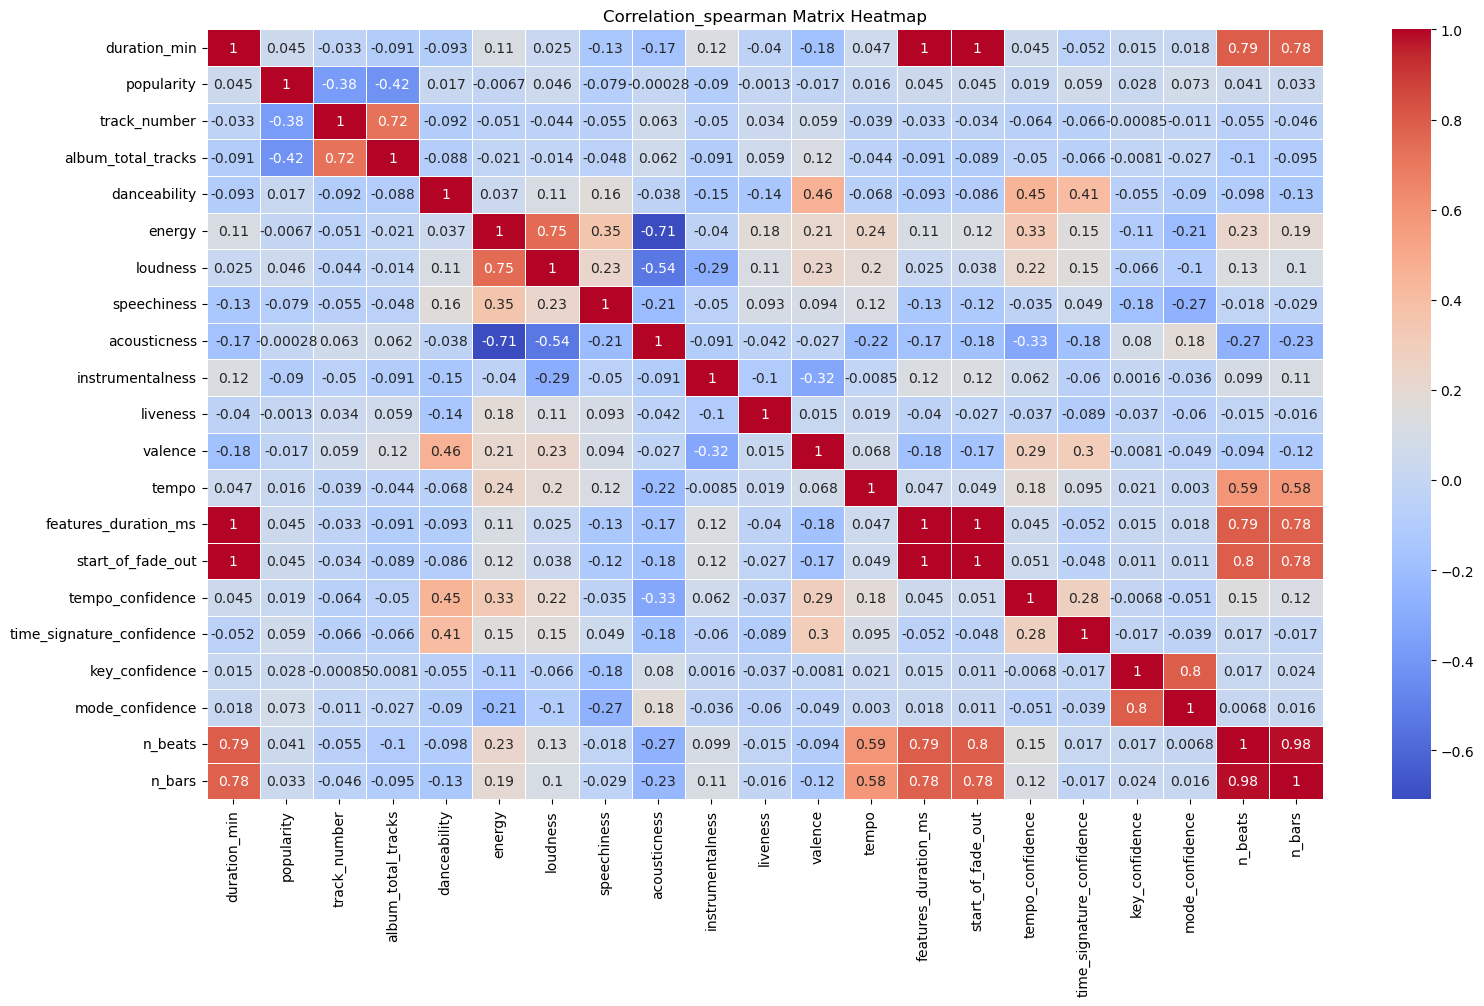

In [90]:
# make heatmap
plt.figure(figsize=(18, 10))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

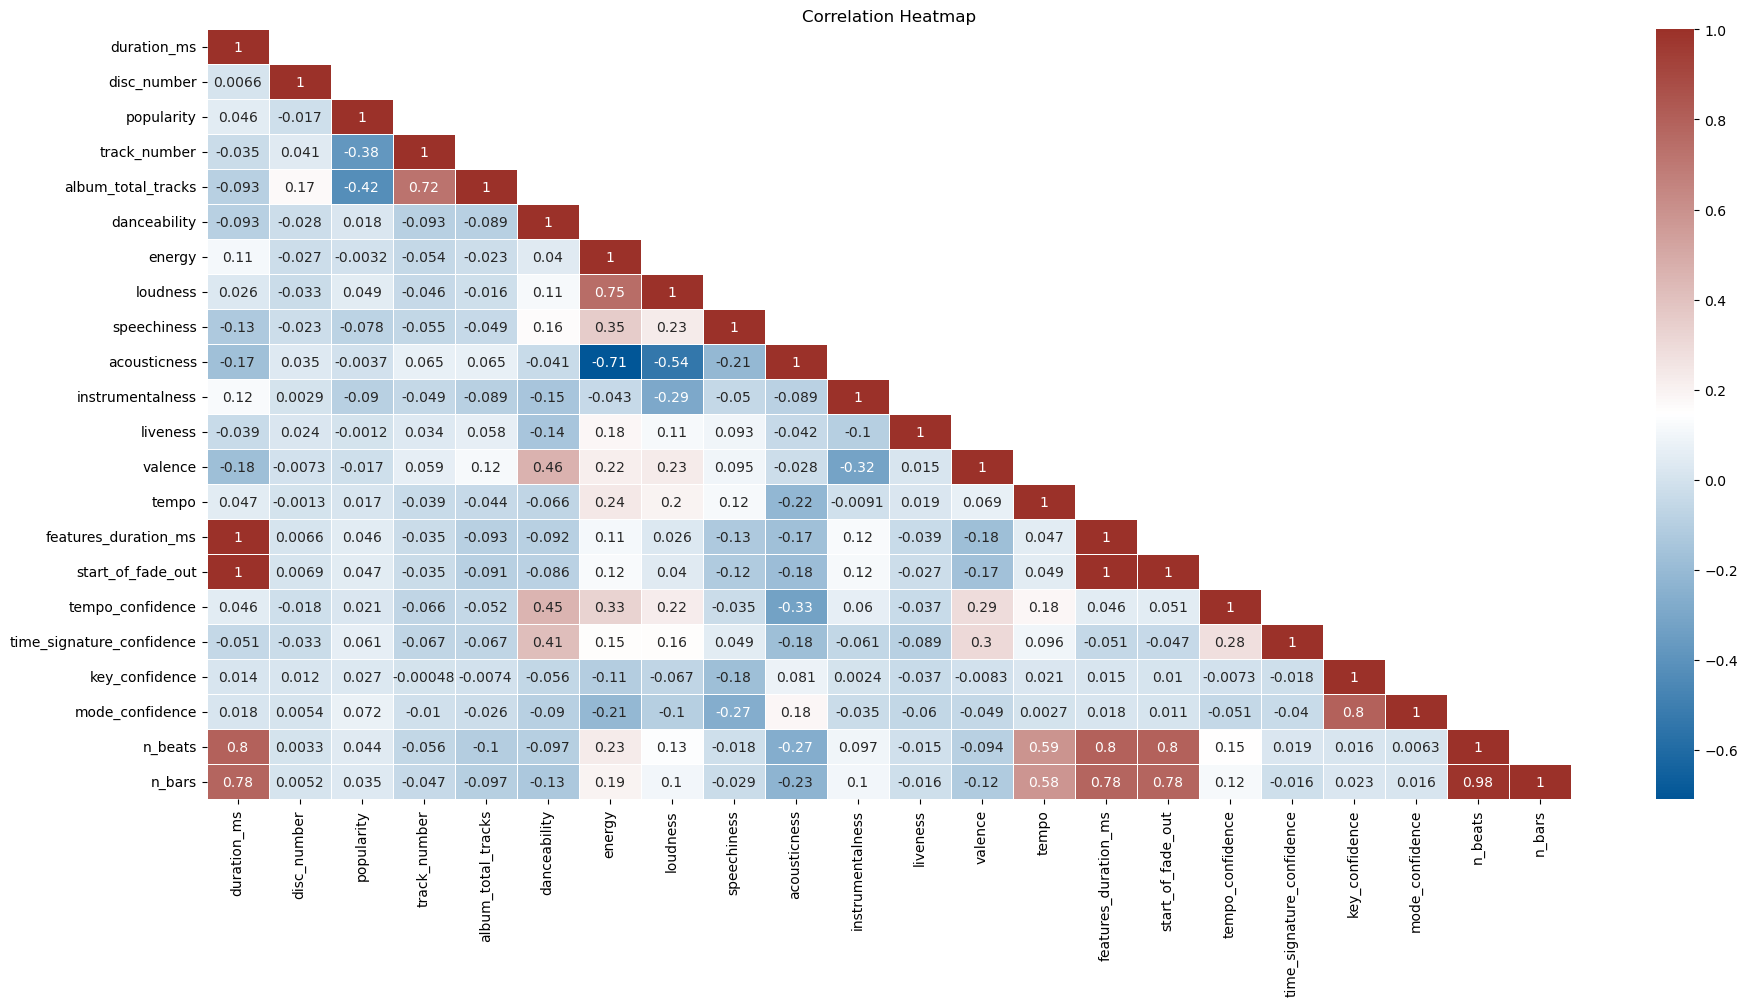

In [14]:
deco_heatmap(correlation_spearman)

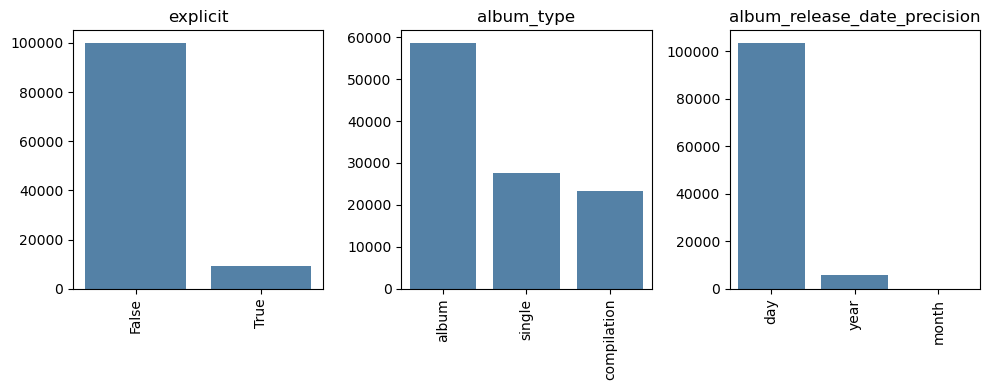

In [1331]:
# bar charts for categorical variables
rows = 1
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(10, 4)) 

for i, col in enumerate(tracks_cat):
    ax = axs[i ]
    sns.barplot(x = df_track[col].value_counts().index, y = df_track[col].value_counts().values, ax=ax, color = 'steelblue')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=90) 
    
plt.tight_layout()
plt.show()

### data cleaning

In [107]:
# check duplicate ids
duplicate_track_ids = df_track[df_track['id'].duplicated(keep=False)]
duplicate_track_ids

id  \
85     0vgIkHFK8wpogVc1XCi18F   
224    7MdX25DW2YXXwCWl8fSHnq   
225    1v8NfOckFEnck9gp7iyetm   
226    6q9XTgfWilsnyiFofvYrIF   
229    4hAmLeBT1Ryk2oxSMMiJ7z   
...                       ...   
99872  7N02vK6QmHRiMVa6oy3HUA   
99880  35RrDnREM1xxx4YBxDHikm   
99886  4bL2aekMQ0jdrEyBwERSmb   
99891  3np71XMsjRnFTol0XTEgOZ   
99893  7xJEyMvEa3eeP1fN3E18PI   

                                                    name  disc_number  \
85                                            Second Sun            1   
224                                            Priceless            1   
225                                              Bachalo            1   
226    Garmi (From "Street Dancer 3D") (feat. Varun D...            1   
229                                                Oouuu            1   
...                                                  ...          ...   
99872                                    Spirit of Grace            1   
99880                             I Will Always Be Yours            1   
99886                                             Lament            1   
99891                                   Father in Heaven            2   
99893                                  Young Man's Fancy            1   

       duration_ms  explicit  popularity  track_number  \
85          224332     False          30             1   
224         107755     False          64             1   
225         165108     False          67             1   
226         182738     False          68             1   
229         147200     False          65             2   
...            ...       ...         ...           ...   
99872       224840     False          29             4   
99880       226826     False          51             2   
99886       143520     False          32             1   
99891       147626     False          29             8   
99893       231585     False          19            14   

                                artists album_type  \
85             Nils Hoffmann;Ben Böhmer     single   
224            Bhalwaan;Signature By SB     single   
225                               Akhil     single   
226    Badshah;Neha Kakkar;Varun Dhawan     single   
229                         Karan Aujla     single   
...                                 ...        ...   
99872                    Stanton Lanier      album   
99880                        Ben Rector      album   
99886                    George Winston      album   
99891                      Paul Cardall      album   
99893                    George Winston      album   

                                              album_name album_release_date  \
85                                            Second Sun         2020-01-10   
224                                            Priceless         2021-11-05   
225                                              Bachalo         2020-10-27   
226                      Garmi (From "Street Dancer 3D")         2019-12-26   
229                                            Way Ahead         2022-05-10   
...                                                  ...                ...   
99872                                        Open Spaces         2013-09-10   
99880                                              Magic         2018-06-22   
99886  Remembrance: A Memorial Benefit (Special Edition)         2001-11-06   
99891                            40 Hymns for Forty Days         2015-04-14   
99893         Linus & Lucy - The Music of Vince Guaraldi         1996-09-07   

      album_release_date_precision  album_total_tracks  danceability  energy  \
85                             day                   2         0.739  0.4090   
224                            day                   4         0.665  0.5720   
225                            day                   1         0.756  0.5380   
226                            day                   1         0.788  0.8700   
229                            day                   6    

In [31]:
duplicate_track_ids['is_full_duplicate'] = duplicate_track_ids.duplicated(keep=False)
duplicate_track_ids.head()

/var/folders/b4/_pvhdsdn0m30ms0n6yxmc4vm0000gn/T/ipykernel_1899/3649119798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_track_ids['is_full_duplicate'] = duplicate_track_ids.duplicated(keep=False)


id  \
85   0vgIkHFK8wpogVc1XCi18F   
224  7MdX25DW2YXXwCWl8fSHnq   
225  1v8NfOckFEnck9gp7iyetm   
226  6q9XTgfWilsnyiFofvYrIF   
229  4hAmLeBT1Ryk2oxSMMiJ7z   

                                                  name  disc_number  \
85                                          Second Sun            1   
224                                          Priceless            1   
225                                            Bachalo            1   
226  Garmi (From "Street Dancer 3D") (feat. Varun D...            1   
229                                              Oouuu            1   

     duration_ms  explicit  popularity  track_number  \
85        224332     False          30             1   
224       107755     False          64             1   
225       165108     False          67             1   
226       182738     False          68             1   
229       147200     False          65             2   

                              artists album_type  \
85           Nils Hoffmann;Ben Böhmer     single   
224          Bhalwaan;Signature By SB     single   
225                             Akhil     single   
226  Badshah;Neha Kakkar;Varun Dhawan     single   
229                       Karan Aujla     single   

                          album_name  ... time_signature start_of_fade_out  \
85                        Second Sun  ...              4         207.44127   
224                        Priceless  ...              4         102.17361   
225                          Bachalo  ...              4         160.21770   
226  Garmi (From "Street Dancer 3D")  ...              4         177.53397   
229                        Way Ahead  ...              4         139.95828   

     tempo_confidence  time_signature_confidence  key_confidence  \
85              0.699                      0.605           1.000   
224             0.454                      0.964           0.709   
225             0.562                      0.992           0.752   
226             0.279                      1.000           0.341   
229             0.249                      1.000           0.359   

     mode_confidence  n_beats  n_bars           genre  is_full_duplicate  
85             0.959    444.0   112.0  minimal-techno              False  
224            0.687    263.0    66.0         hip-hop              False  
225            0.716    244.0    60.0         hip-hop              False  
226            0.330    328.0    81.0         hip-hop              False  
229            0.392    356.0    88.0         hip-hop              False  

[5 rows x 35 columns]

In [112]:
duplicate_track_ids[duplicate_track_ids.duplicated(keep=False)].sort_values(by = 'id')

id  \
1810   00JZ83w0Qm09f4PwWj06sM   
1758   00JZ83w0Qm09f4PwWj06sM   
43229  02KmEChUwcjxG3G29kbLFT   
43261  02KmEChUwcjxG3G29kbLFT   
75104  02MRylJ1WAgxzdqfNfdIsR   
...                       ...   
1614   7zBY3YjvcdkpbHIUx0fe5Q   
75018  7zkgAyL3DS6PE5FWzk3QKM   
75056  7zkgAyL3DS6PE5FWzk3QKM   
92741  7zo05whm8LBnnt1dG979ov   
92941  7zo05whm8LBnnt1dG979ov   

                                                  name  disc_number  \
1810                         A Good Year For The Roses            1   
1758                         A Good Year For The Roses            1   
43229                                 Shelter Mountain            1   
43261                                 Shelter Mountain            1   
75104                       Город пышный, город бедный            1   
...                                                ...          ...   
1614                                 Everything's Okay            1   
75018          Ты рядом со мной - Из к/ф "Наши соседи"            1   
75056          Ты рядом со мной - Из к/ф "Наши соседи"            1   
92741  Six German Dances, K.571: No. 5 in B Flat Major            1   
92941  Six German Dances, K.571: No. 5 in B Flat Major            1   

       duration_ms  explicit  popularity  track_number  \
1810        190546     False          15             1   
1758        190546     False          15             1   
43229       250520     False           3            55   
43261       250520     False           3            55   
75104       114600     False           0             4   
...            ...       ...         ...           ...   
1614        172026     False          14            12   
75018       207438     False           2             1   
75056       207438     False           2             1   
92741        92000     False           0           469   
92941        92000     False           0           469   

                                                 artists   album_type  \
1810                                        George Jones        album   
1758                                        George Jones        album   
43229  Martin Tillman;Hans Zimmer;Henning Lohner;Fiac...  compilation   
43261  Martin Tillman;Hans Zimmer;Henning Lohner;Fiac...  compilation   
75104                                       Oleg Pogudin        album   
...                                                  ...          ...   
1614                                       Hank Williams        album   
75018                                   Vladimir Nechaev  compilation   
75056                                   Vladimir Nechaev  compilation   
92741  Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...  compilation   
92941  Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...  compilation   

                                              album_name album_release_date  \
1810                                           With Love               2005   
1758                                           With Love               2005   
43229                           Hans Zimmer: Epic Scores         2022-10-12   
43261                           Hans Zimmer: Epic Scores         2022-10-12   
75104              Любовь и разлука. Песни Исаака Шварца               2012   
...                                                  ...                ...   
1614   Hank Williams As Luke The Drifter (Expanded Ed...         1953-03-02   
75018            Душевные песни из советских кинофильмов         2017-12-22   
75056            Душевные песни из советских кинофильмов         2017-12-22   
92741                          Mozart - A Classical Dawn         2022-10-14   
92941                          Mozart - A Classical Dawn         2022-10-14   

      album_release_date_precision  album_total_tracks  danceability  energy  \
1810                          year                  10         0.491   0.334   
1758                          year                  10         0.491   0.334   
43229         

In [33]:
duplicate_summary = duplicate_track_ids.groupby('id').agg(
    count=('id', 'size'),  
    full_duplicate=('is_full_duplicate', 'all')  
).reset_index()
duplicate_summary

id  count  full_duplicate
0      001APMDOl3qtx1526T11n1      2           False
1      001YQlnDSduXd5LgBd66gT      2           False
2      003vvx7Niy0yvhvHt4a68B      3           False
3      004h8smbIoAkUNDJvVKwkG      2           False
4      006rHBBNLJMpQs8fRC2GDe      3           False
...                       ...    ...             ...
13684  7zrxUrilLtTk4XnT5G7zF8      2           False
13685  7ztSVy67w9rXpKg5L2zN5l      2           False
13686  7zubR9uYAWjb5KPZTMm85e      4           False
13687  7zumacGldlmxpoP8bpaeLe      2           False
13688  7zwn1eykZtZ5LODrf7c0tS      3           False

[13689 rows x 3 columns]

In [35]:
check = df_track[df_track['id']=='7zubR9uYAWjb5KPZTMm85e']
check

id      name  disc_number  duration_ms  explicit  \
70008  7zubR9uYAWjb5KPZTMm85e  Ley Seca            1       263666     False   
71003  7zubR9uYAWjb5KPZTMm85e  Ley Seca            1       263666     False   
87160  7zubR9uYAWjb5KPZTMm85e  Ley Seca            1       263666     False   
88104  7zubR9uYAWjb5KPZTMm85e  Ley Seca            1       263666     False   

       popularity  track_number          artists   album_type  \
70008           0            22  Jhayco;Anuel AA  compilation   
71003           0            22  Jhayco;Anuel AA  compilation   
87160           0            22  Jhayco;Anuel AA  compilation   
88104           0            22  Jhayco;Anuel AA  compilation   

                   album_name  ... features_duration_ms time_signature  \
70008  El perreo es el futuro  ...               263667              4   
71003  El perreo es el futuro  ...               263667              4   
87160  El perreo es el futuro  ...               263667              4   
88104  El perreo es el futuro  ...               263667              4   

       start_of_fade_out  tempo_confidence  time_signature_confidence  \
70008           257.0681             0.659                       0.87   
71003           257.0681             0.659                       0.87   
87160           257.0681             0.659                       0.87   
88104           257.0681             0.659                       0.87   

       key_confidence  mode_confidence  n_beats  n_bars      genre  
70008           0.478            0.676    457.0   114.0     reggae  
71003           0.478            0.676    457.0   114.0  reggaeton  
87160           0.478            0.676    457.0   114.0      latin  
88104           0.478            0.676    457.0   114.0     latino  

[4 rows x 34 columns]

#### drop duplicates

In [132]:
# delete all entire duplicate rows
df_track = df_track.drop_duplicates()

In [163]:
d = {}
for col in df_track.columns:
    n = df_track[df_track[df_track.columns.difference([col])].duplicated(keep=False)].shape[0]
    d[col] = n

In [168]:
d

{'id': 4,
 'name': 0,
 'disc_number': 0,
 'duration_ms': 0,
 'explicit': 0,
 'popularity': 0,
 'track_number': 0,
 'artists': 0,
 'album_type': 0,
 'album_name': 0,
 'album_release_date': 0,
 'album_release_date_precision': 0,
 'album_total_tracks': 0,
 'danceability': 0,
 'energy': 0,
 'key': 0,
 'loudness': 0,
 'mode': 0,
 'speechiness': 0,
 'acousticness': 0,
 'instrumentalness': 0,
 'liveness': 0,
 'valence': 0,
 'tempo': 0,
 'features_duration_ms': 0,
 'time_signature': 0,
 'start_of_fade_out': 0,
 'tempo_confidence': 0,
 'time_signature_confidence': 0,
 'key_confidence': 0,
 'mode_confidence': 0,
 'n_beats': 0,
 'n_bars': 0,
 'genre': 32128}

In [169]:
df_track[df_track[df_track.columns.difference(['id'])].duplicated(keep=False)]

id                     name  disc_number  \
8339   0hOOs7nsnDt9LvWaW3vi1s  Spreading the Deception            1   
8847   5erd3YODv3uyjimkoLvSTY  Spreading the Deception            1   
57395  5t6HblLYoQipITHnwYhCMV          Lost In Phaedra            1   
57446  6NZYF81lXOvuSp52ArfGnU          Lost In Phaedra            1   

       duration_ms  explicit  popularity  track_number  \
8339        283896     False           0             3   
8847        283896     False           0             3   
57395       402000     False           0            12   
57446       402000     False           0            12   

                                artists   album_type              album_name  \
8339                  AMONGST THE ASHES       single     Agonizing Awakening   
8847                  AMONGST THE ASHES       single     Agonizing Awakening   
57395  Mikis Theodorakis;Francesco Diaz  compilation  Chill Out Mood, Vol. 4   
57446  Mikis Theodorakis;Francesco Diaz  compilation  Chill Out Mood, Vol. 4   

      album_release_date album_release_date_precision  album_total_tracks  \
8339          2020-09-25                          day                   4   
8847          2020-09-25                          day                   4   
57395         2022-10-10                          day                  30   
57446         2022-10-10                          day                  30   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
8339          0.398   0.918    6    -6.989     1       0.0421      0.000017   
8847          0.398   0.918    6    -6.989     1       0.0421      0.000017   
57395         0.344   0.200   10   -15.859     1       0.0340      0.785000   
57446         0.344   0.200   10   -15.859     1       0.0340      0.785000   

       instrumentalness  liveness  valence    tempo  features_duration_ms  \
8339              0.292     0.354    0.409  170.050                283896   
8847              0.292     0.354    0.409  170.050                283896   
57395             0.162     0.374    0.049  119.887                402000   
57446             0.162     0.374    0.049  119.887                402000   

       time_signature  start_of_fade_out  tempo_confidence  \
8339                4          274.23346             0.491   
8847                4          274.23346             0.491   
57395               4          383.08282             0.186   
57446               4          383.08282             0.186   

       time_signature_confidence  key_confidence  mode_confidence  n_beats  \
8339                       0.779           0.037            0.484    784.0   
8847                       0.779           0.037            0.484    784.0   
57395                      0.600           0.000            0.296    778.0   
57446                      0.600           0.000            0.296    778.0   

       n_bars    genre  
8339    196.0  iranian  
8847    196.0  iranian  
57395   196.0   guitar  
57446   196.0   guitar

In [243]:
df_track_drop_id = df_track.drop_duplicates(subset=df_track.columns.difference(['id']), keep='first')

In [186]:
df_track_drop_id[df_track_drop_id[df_track_drop_id.columns.difference(['genre'])].duplicated(keep=False)].sort_values(by=['name'])

id                    name  disc_number  \
15498  2Bc4llhjJBW77I552RgA3L                      #3            1   
36483  2Bc4llhjJBW77I552RgA3L                      #3            1   
12922  7axpJkZcb36Wgjy0SxuEai               #おふしょるにっと            1   
10028  7axpJkZcb36Wgjy0SxuEai               #おふしょるにっと            1   
91505  3UAcFSrt3b8pVbJ0Z1YGSE  $tars and I feel alone            1   
...                       ...                     ...          ...   
58462  4JrGpUQothsSVR6iBhR9NC                    飄向北方            1   
81221  5LiWJsSSjZh7Y3hqml18Ki                 긴 밤이 오면            1   
22964  5LiWJsSSjZh7Y3hqml18Ki                 긴 밤이 오면            1   
12083  6MKOd8KDFzwpu8Vz6ccZU5               ＊〜アスタリスク〜            1   
11234  6MKOd8KDFzwpu8Vz6ccZU5               ＊〜アスタリスク〜            1   

       duration_ms  explicit  popularity  track_number              artists  \
15498       464293     False           6             3           Aphex Twin   
36483       464293     False           6             3           Aphex Twin   
12922       280693     False          33             4                  ≠ME   
10028       280693     False          33             4                  ≠ME   
91505       132858     False          56             1             Vluestar   
...            ...       ...         ...           ...                  ...   
58462       269181     False          55             2  Namewee;Leehom Wang   
81221       226991     False          35             1             Eddy Kim   
22964       226991     False          35             1             Eddy Kim   
12083       255906     False          62             1         ORANGE RANGE   
11234       255906     False          62             1         ORANGE RANGE   

      album_type                                       album_name  \
15498      album                 Selected Ambient Works Volume II   
36483      album                 Selected Ambient Works Volume II   
12922     single                    チョコレートメランコリー<Special Edition>   
10028     single                    チョコレートメランコリー<Special Edition>   
91505     single                           $tars and I feel alone   
...          ...                                              ...   
58462      album                                             亞洲通車   
81221     single  당신이 잠든 사이에 Pt. 1 Original Television Soundtrack   
22964     single  당신이 잠든 사이에 Pt. 1 Original Television Soundtrack   
12083     single                                        ＊〜アスタリスク〜   
11234     single                                        ＊〜アスタリスク〜   

      album_release_date album_release_date_precision  album_total_tracks  \
15498         1994-03-07                          day                  24   
36483         1994-03-07                          day                  24   
12922         2022-02-16                          day                   4   
10028         2022-02-16                          day                   4   
91505         2018-09-09                          day                   1   
...                  ...                          ...                 ...   
58462         2016-12-30                          day                  10   
81221         2017-09-28                          day                   2   
22964         2017-09-28                          day                   2   
12083               2005                         year                   4   
11234               2005                         year                   4   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
15498         0.167   0.071    6   -27.108     0       0.0410         0.911   
36483         0.167   0.071    6   -27.108     0       0.0410         0.911   
12922         0.516   0.842    8    -1.772     1       0.0309         0.459   
10028         0.516   0.842    8    -1.772     1       0.0309         0.459   
91505         0.567   0.214    0   -18.410     1       0.4440         0.860   
...      

In [227]:
df_track.columns[1:]

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature',
       'start_of_fade_out', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'n_beats', 'n_bars', 'genre'],
      dtype='object')

In [230]:
for col in df_track.columns[1:]:
    print(f'"{col}": pd.Series.nunique,')

"name": pd.Series.nunique,
"disc_number": pd.Series.nunique,
"duration_ms": pd.Series.nunique,
"explicit": pd.Series.nunique,
"popularity": pd.Series.nunique,
"track_number": pd.Series.nunique,
"artists": pd.Series.nunique,
"album_type": pd.Series.nunique,
"album_name": pd.Series.nunique,
"album_release_date": pd.Series.nunique,
"album_release_date_precision": pd.Series.nunique,
"album_total_tracks": pd.Series.nunique,
"danceability": pd.Series.nunique,
"energy": pd.Series.nunique,
"key": pd.Series.nunique,
"loudness": pd.Series.nunique,
"mode": pd.Series.nunique,
"speechiness": pd.Series.nunique,
"acousticness": pd.Series.nunique,
"instrumentalness": pd.Series.nunique,
"liveness": pd.Series.nunique,
"valence": pd.Series.nunique,
"tempo": pd.Series.nunique,
"features_duration_ms": pd.Series.nunique,
"time_signature": pd.Series.nunique,
"start_of_fade_out": pd.Series.nunique,
"tempo_confidence": pd.Series.nunique,
"time_signature_confidence": pd.Series.nunique,
"key_confidence": pd.Seri

In [234]:
duplicate_counts = df_track_drop_id.groupby('id').agg({
                                    'name': pd.Series.nunique,
                                    'disc_number': pd.Series.nunique,
                                    'duration_ms': pd.Series.nunique,
                                    'explicit': pd.Series.nunique,
                                    'popularity': pd.Series.nunique,
                                    'track_number': pd.Series.nunique,
                                    'artists': pd.Series.nunique,
                                    'album_type': pd.Series.nunique,
                                    'album_name': pd.Series.nunique,
                                    'album_release_date': pd.Series.nunique,
                                    'album_release_date_precision': pd.Series.nunique,
                                    'album_total_tracks': pd.Series.nunique,
                                    'danceability': pd.Series.nunique,
                                    'energy': pd.Series.nunique,
                                    'key': pd.Series.nunique,
                                    'loudness': pd.Series.nunique,
                                    'mode': pd.Series.nunique,
                                    'speechiness': pd.Series.nunique,
                                    'acousticness': pd.Series.nunique,
                                    'instrumentalness': pd.Series.nunique,
                                    'liveness': pd.Series.nunique,
                                    'valence': pd.Series.nunique,
                                    'tempo': pd.Series.nunique,
                                    'features_duration_ms': pd.Series.nunique,
                                    'time_signature': pd.Series.nunique,
                                    'start_of_fade_out': pd.Series.nunique,
                                    'tempo_confidence': pd.Series.nunique,
                                    'time_signature_confidence': pd.Series.nunique,
                                    'key_confidence': pd.Series.nunique,
                                    'mode_confidence': pd.Series.nunique,
                                    'n_beats': pd.Series.nunique,
                                    'n_bars': pd.Series.nunique,
                                    'genre': pd.Series.nunique
})

In [242]:
duplicate_counts.columns[duplicate_counts.nunique()>1]

Index(['explicit', 'popularity', 'artists', 'genre'], dtype='object')

In [251]:
cols = ['id'] + list(duplicate_counts.columns[duplicate_counts.nunique()==1])

In [363]:
def custom_agg(x):
    if x.nunique() > 1:
        return x.tolist()
    else:
        return x.iloc[0]

# Group by the specified columns and apply the custom aggregation
df_merge = df_track_drop_id.groupby(cols).agg({
    'explicit': custom_agg,
    'popularity': custom_agg,
    'artists': custom_agg,
    'genre': custom_agg
}).reset_index()

In [364]:
df_merge = df_merge[df_track.columns]
df_merge

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       duration_ms explicit popularity  track_number  \
0           160725     True         35             1   
1           322933    False         49            10   
2           515360    False          0             5   
3           190203    False         62             1   
4           331240    False         20             9   
...            ...      ...        ...           ...   
89555       325156    False         64             1   
89556       109573    False         31             3   
89557       260573    False         64             2   
89558       234300    False         60             5   
89559       144973    False         22            10   

                         artists album_type         album_name  \
0                           Rill     single              Lolly   
1                      Glee Cast      album    Glee Love Songs   
2       Paul Kalkbrenner;Pig&Dan      album                  X   
3      Jordan Sandhu;Bunty Bains     single         Teeje Week   
4               Paul Kalkbrenner      album               Zeit   
...                          ...        ...                ...   
89555     Haricharan;Gopi Sundar      album     Bangalore Days   
89556                Piano Genie     single  Disney Favourites   
89557                  Eric Chou      album                學著愛   
89558                 Stereoclip      album             Echoes   
89559                 The Posies      album   Amazing Disgrace   

      album_release_date album_release_date_precision  album_total_tracks  \
0             2022-09-23                          day                   1   
1             2021-02-11                          day                 100   
2             2014-05-30                          day                  11   
3             2018-02-12                          day                   1   
4             2001-10-08                          day                  11   
...                  ...                          ...                 ...   
89555         2014-05-12                          day                   7   
89556         2021-07-15                          day                   7   
89557         2014-12-19                          day                  11   
89558         2021-11-26                          day                  10   
89559         1996-01-01                          day                  14   

       danceability   energy  key  loudness  mode  speechiness  acousticness  \
0             0.910  0.37400    8    -9.844     0       0.1990      0.075700   
1             0.269  0.51600    0    -7.361     1       0.0366      0.406000   
2             0.686  0.56000    5   -13.264     0       0.0462      0.001140   
3             0.679  0.77000    0    -3.53

#### explicit

In [365]:
df_merge[df_merge['explicit'].apply(lambda x: isinstance(x, list))]

id                   name  disc_number  \
81652  769Fq73HiVK9qfOQKKvpLB  Sorted For E's & Wizz            1   

       duration_ms       explicit popularity  track_number artists  \
81652       218181  [False, True]          0             3    Pulp   

        album_type           album_name album_release_date  \
81652  compilation  Fiesta temática 90s         2022-10-07   

      album_release_date_precision  album_total_tracks  danceability  energy  \
81652                          day                  24         0.507     0.9   

       key  loudness  mode  speechiness  acousticness  instrumentalness  \
81652    0    -5.513     1       0.0635         0.226               0.0   

       liveness  valence   tempo  features_duration_ms  time_signature  \
81652     0.377    0.536  94.466                217667               4   

       start_of_fade_out  tempo_confidence  time_signature_confidence  \
81652          208.02757             0.211                      0.913   

       key_confidence  mode_confidence  n_beats  n_bars              genre  
81652             0.0            0.174    329.0    82.0  [alt-rock, r-n-b]

In [366]:
df_merge[df_merge['explicit'].apply(lambda x: isinstance(x, list))].iloc[0, 4] = True

In [368]:
# Find the index of the row where 'explicit' contains a list
index_to_update = df_merge[df_merge['explicit'].apply(lambda x: isinstance(x, list))].index[0]

# Update the cell in the original DataFrame
df_merge.loc[index_to_update, 'explicit'] = False

In [369]:
df_merge[df_merge['id']=='769Fq73HiVK9qfOQKKvpLB']

id                   name  disc_number  \
81652  769Fq73HiVK9qfOQKKvpLB  Sorted For E's & Wizz            1   

       duration_ms explicit popularity  track_number artists   album_type  \
81652       218181     True          0             3    Pulp  compilation   

                album_name album_release_date album_release_date_precision  \
81652  Fiesta temática 90s         2022-10-07                          day   

       album_total_tracks  danceability  energy  key  loudness  mode  \
81652                  24         0.507     0.9    0    -5.513     1   

       speechiness  acousticness  instrumentalness  liveness  valence   tempo  \
81652       0.0635         0.226               0.0     0.377    0.536  94.466   

       features_duration_ms  time_signature  start_of_fade_out  \
81652                217667               4          208.02757   

       tempo_confidence  time_signature_confidence  key_confidence  \
81652             0.211                      0.913             0.0   

       mode_confidence  n_beats  n_bars              genre  
81652            0.174    329.0    82.0  [alt-rock, r-n-b]

#### artists

In [291]:
df_track[df_track['id'].duplicated(keep=False)][df_track[df_track['id'].duplicated(keep=False)].groupby('id')['artists'].transform('nunique') > 1].sort_values(by='id')

id              name  disc_number  duration_ms  \
11111  0OGw7V8wAI6OsZIQ12JkTP       Black Rover            1       209573   
12007  0OGw7V8wAI6OsZIQ12JkTP       Black Rover            1       209573   
16370  0OGw7V8wAI6OsZIQ12JkTP       Black Rover            1       209573   
11119  2y7f8qkrgIqY5KsfPNcuix     Black Catcher            1       196946   
12011  2y7f8qkrgIqY5KsfPNcuix     Black Catcher            1       196946   
16388  2y7f8qkrgIqY5KsfPNcuix     Black Catcher            1       196946   
11750  3ZYKbGJ6I5adT5ozf0N6OH      Lucky Ending            1       255633   
12296  3ZYKbGJ6I5adT5ozf0N6OH      Lucky Ending            1       255633   
16726  3ZYKbGJ6I5adT5ozf0N6OH      Lucky Ending            1       255633   
14078  4lvTfq817mnTPF2eibBdIP  Kadhal Valarthen            1       448641   
62150  4lvTfq817mnTPF2eibBdIP  Kadhal Valarthen            1       448641   
11093  5RXmLhscstsdvWPN0XtUa0     Black Catcher            1       195000   
12002  5RXmLhscstsdvWPN0XtUa0     Black Catcher            1       195000   
16360  5RXmLhscstsdvWPN0XtUa0     Black Catcher            1       195000   

       explicit  popularity  track_number                     artists  \
11111     False          68             6                Vicke Blanka   
12007     False          68             6                Vicke Blanka   
16370     False          69             6                 Vickeblanka   
11119     False          68             7                Vicke Blanka   
12011     False          68             7                Vicke Blanka   
16388     False          68             7                 Vickeblanka   
11750     False          45             1                Vicke Blanka   
12296     False          45             1                Vicke Blanka   
16726     False          45             1                 Vickeblanka   
14078     False          59             3       Yuvan Shankar Raja;KK   
62150     False          59             3  Yuvan Shankar Raja;Kay Kay   
11093     False          68             1                Vicke Blanka   
12002     False          68             1                Vicke Blanka   
16360     False          68             1                 Vickeblanka   

        album_type     album_name album_release_date  \
11111        album         wizard         2018-11-21   
12007        album         wizard         2018-11-21   
16370        album         wizard         2018-11-21   
11119        album          Devil         2020-03-04   
12011        album          Devil         2020-03-04   
16388        album          Devil         2020-03-04   
11750       single   Lucky Ending         2019-04-10   
12296       single   Lucky Ending         2019-04-10   
16726       single   Lucky Ending         2019-04-10   
14078  compilation      Manmadhan               2004   
62150  compilation      Manmadhan               2004   
11093       single  Black Catcher         2020-01-08   
12002       single  Black Catcher         2020-01-08   
16360       single  Black Catcher         2020-01-08   

      album_release_date_precision  album_total_tracks  danceability  energy  \
11111                          day                  12         0.592   0.937   
12007                          day                  12         0.592   0.937   
16370                          day                  12         0.592   0.937   
11119                          day                  11         0.592   0.894   
12011                          day                  11         0.592   0.894   
16388                          day                  11         0.592   0.894   
11750                          day                   1         0.598   0.611   
12296                          day                   1         0.598   0.611   
16726                          day                   1         0.598   0.611   
14078                         year                   6         0.711   0.647   
62150                         year                   6

In [315]:
diff_art = df_merge[df_merge['artists'].apply(lambda x: isinstance(x, list))]['artists']
diff_art

4391             [Vicke Blanka, Vicke Blanka, Vickeblanka]
34145            [Vicke Blanka, Vicke Blanka, Vickeblanka]
41091            [Vicke Blanka, Vicke Blanka, Vickeblanka]
54801    [Yuvan Shankar Raja;KK, Yuvan Shankar Raja;Kay...
62463            [Vicke Blanka, Vicke Blanka, Vickeblanka]
Name: artists, dtype: object

In [332]:
unique_arts = set()
for artists in diff_art:
    for a in artists:
        unique_arts.update(a.split(';'))
unique_arts

{'KK', 'Kay Kay', 'Vicke Blanka', 'Vickeblanka', 'Yuvan Shankar Raja'}

In [346]:
for a in unique_arts:
    if a in df_art['name'].values:
        print(f'{a}: True')

KK: True
Yuvan Shankar Raja: True
Vicke Blanka: True


In [370]:
# Define replacements
replacements = {'Kay Kay': 'KK', 'Vickeblanka': 'Vicke Blanka'}

# Replace using dictionary
df_merge['artists'] = df_merge['artists'].replace(replacements)

In [376]:
df_merge['artists'] = df_merge['artists'].apply(lambda x: x[0] if isinstance(x, list) else x)

In [378]:
replacements = {'Kay Kay': 'KK', 'Vickeblanka': 'Vicke Blanka'}
df_merge['artists'] = df_merge['artists'].replace(replacements)

In [421]:
df_merge['artists'] = df_merge['artists'].str.replace(';', ',')

In [422]:
df_merge

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       duration_ms explicit popularity  track_number  \
0           160725     True         35             1   
1           322933    False         49            10   
2           515360    False          0             5   
3           190203    False         62             1   
4           331240    False         20             9   
...            ...      ...        ...           ...   
89555       325156    False         64             1   
89556       109573    False         31             3   
89557       260573    False         64             2   
89558       234300    False         60             5   
89559       144973    False         22            10   

                         artists album_type         album_name  \
0                           Rill     single              Lolly   
1                      Glee Cast      album    Glee Love Songs   
2       Paul Kalkbrenner,Pig&Dan      album                  X   
3      Jordan Sandhu,Bunty Bains     single         Teeje Week   
4               Paul Kalkbrenner      album               Zeit   
...                          ...        ...                ...   
89555     Haricharan,Gopi Sundar      album     Bangalore Days   
89556                Piano Genie     single  Disney Favourites   
89557                  Eric Chou      album                學著愛   
89558                 Stereoclip      album             Echoes   
89559                 The Posies      album   Amazing Disgrace   

      album_release_date album_release_date_precision  album_total_tracks  \
0             2022-09-23                          day                   1   
1             2021-02-11                          day                 100   
2             2014-05-30                          day                  11   
3             2018-02-12                          day                   1   
4             2001-10-08                          day                  11   
...                  ...                          ...                 ...   
89555         2014-05-12                          day                   7   
89556         2021-07-15                          day                   7   
89557         2014-12-19                          day                  11   
89558         2021-11-26                          day                  10   
89559         1996-01-01                          day                  14   

       danceability   energy  key  loudness  mode  speechiness  acousticness  \
0             0.910  0.37400    8    -9.844     0       0.1990      0.075700   
1             0.269  0.51600    0    -7.361     1       0.0366      0.406000   
2             0.686  0.56000    5   -13.264     0       0.0462      0.001140   
3             0.679  0.77000    0    -3.53

#### popularity

In [387]:
diff_pop = df_merge[df_merge['popularity'].apply(lambda x: isinstance(x, list))]['popularity']

In [405]:
diff_pop.apply(lambda x: max(x)-min(x)).value_counts()

1    513
9      1
Name: popularity, dtype: int64

In [403]:
diff_pop[diff_pop.apply(lambda x: max(x)-min(x)) > 1]

27045    [6, 15]
Name: popularity, dtype: object

In [407]:
df_merge.iloc[27045]

id                              2MZSXhq4XDJWu6coGoXX1V
name                                        Avril 14th
disc_number                                          1
duration_ms                                     125520
explicit                                         False
popularity                                     [6, 15]
track_number                                         9
artists                                     Aphex Twin
album_type                                       album
album_name                                      Drukqs
album_release_date                          2001-10-22
album_release_date_precision                       day
album_total_tracks                                  30
danceability                                     0.558
energy                                          0.0259
key                                                  8
loudness                                       -30.016
mode                                                 1
speechines

In [431]:
df_merge['popularity'] = df_merge['popularity'].apply(lambda x: (max(x)+min(x))/2 if isinstance(x, list) else x)

#### genre

In [434]:
df_merge['genre'].apply(lambda x: len(x)if isinstance(x, list) else 1).value_counts()

1    76194
2     9296
3     2511
4     1091
5      361
6       91
7       15
8        1
Name: genre, dtype: int64

In [442]:
diff_gen = df_merge[df_merge['genre'].apply(lambda x: isinstance(x, list))]['genre']

In [534]:
diff_gen.value_counts()

[songwriter, singer-songwriter]                 520
[reggae, reggaeton, latin, latino]              321
[punk-rock, punk]                               296
[brazil, gospel]                                295
[techno, minimal-techno]                        277
                                               ... 
[songwriter, folk, r-n-b, singer-songwriter]      1
[bluegrass, songwriter, singer-songwriter]        1
[trance, edm, progressive-house]                  1
[trance, happy, hardcore]                         1
[blues, alt-rock, rock]                           1
Name: genre, Length: 1116, dtype: int64

In [452]:
df_merge = df_merge.rename(columns={'genre': 'genres'})

In [453]:
from random import choice

df_merge['num_genres'] = df_merge['genres'].apply(lambda x: len(x) if isinstance(x, list) else 1)
df_merge['genre'] = df_merge['genres'].apply(lambda x: choice(x) if isinstance(x, list) else x)

In [454]:
df_merge

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       duration_ms explicit  popularity  track_number  \
0           160725     True        35.0             1   
1           322933    False        49.0            10   
2           515360    False         0.0             5   
3           190203    False        62.0             1   
4           331240    False        20.0             9   
...            ...      ...         ...           ...   
89555       325156    False        64.0             1   
89556       109573    False        31.0             3   
89557       260573    False        64.0             2   
89558       234300    False        60.0             5   
89559       144973    False        22.0            10   

                         artists album_type         album_name  \
0                           Rill     single              Lolly   
1                      Glee Cast      album    Glee Love Songs   
2       Paul Kalkbrenner,Pig&Dan      album                  X   
3      Jordan Sandhu,Bunty Bains     single         Teeje Week   
4               Paul Kalkbrenner      album               Zeit   
...                          ...        ...                ...   
89555     Haricharan,Gopi Sundar      album     Bangalore Days   
89556                Piano Genie     single  Disney Favourites   
89557                  Eric Chou      album                學著愛   
89558                 Stereoclip      album             Echoes   
89559                 The Posies      album   Amazing Disgrace   

      album_release_date album_release_date_precision  album_total_tracks  \
0             2022-09-23                          day                   1   
1             2021-02-11                          day                 100   
2             2014-05-30                          day                  11   
3             2018-02-12                          day                   1   
4             2001-10-08                          day                  11   
...                  ...                          ...                 ...   
89555         2014-05-12                          day                   7   
89556         2021-07-15                          day                   7   
89557         2014-12-19                          day                  11   
89558         2021-11-26                          day                  10   
89559         1996-01-01                          day                  14   

       danceability   energy  key  loudness  mode  speechiness  acousticness  \
0             0.910  0.37400    8    -9.844     0       0.1990      0.075700   
1             0.269  0.51600    0    -7.361     1       0.0366      0.406000   
2             0.686  0.56000    5   -13.264     0       0.0462      0.001140   
3             0.679  0.77000  

In [466]:
df_merge.drop(columns=['genres']).nunique()

id                              89560
name                            73471
disc_number                        12
duration_ms                     50594
explicit                            2
popularity                        180
track_number                      302
artists                         31478
album_type                          3
album_name                      46473
album_release_date               8772
album_release_date_precision        3
album_total_tracks                155
danceability                     1174
energy                           2083
key                                12
loudness                        19478
mode                                2
speechiness                      1489
acousticness                     5061
instrumentalness                 5345
liveness                         1722
valence                          1790
tempo                           45604
features_duration_ms            50656
time_signature                      5
start_of_fad

In [476]:
df_uniqueID = df_merge.copy()

### feature engineering

In [478]:
# convert boolean type to integer type
df_uniqueID['explicit'] = df_uniqueID['explicit'].astype(int)

In [479]:
df_uniqueID.head()

id                                               name  \
0  0000vdREvCVMxbQTkS888c                                              Lolly   
1  000CC8EParg64OmTxVnZ0p  It's All Coming Back To Me Now (Glee Cast Vers...   
2  000Iz0K615UepwSJ5z2RE5                        Böxig Leise - Pig&Dan Remix   
3  000RDCYioLteXcutOjeweY                                         Teeje Week   
4  000qpdoc97IMTBvF8gwcpy                                               Tief   

   disc_number  duration_ms  explicit  popularity  track_number  \
0            1       160725         1        35.0             1   
1            1       322933         0        49.0            10   
2            1       515360         0         0.0             5   
3            1       190203         0        62.0             1   
4            1       331240         0        20.0             9   

                     artists album_type       album_name album_release_date  \
0                       Rill     single            Lolly         2022-09-23   
1                  Glee Cast      album  Glee Love Songs         2021-02-11   
2   Paul Kalkbrenner,Pig&Dan      album                X         2014-05-30   
3  Jordan Sandhu,Bunty Bains     single       Teeje Week         2018-02-12   
4           Paul Kalkbrenner      album             Zeit         2001-10-08   

  album_release_date_precision  album_total_tracks  danceability  energy  key  \
0                          day                   1         0.910   0.374    8   
1                          day                 100         0.269   0.516    0   
2                          day                  11         0.686   0.560    5   
3                          day                   1         0.679   0.770    0   
4                          day                  11         0.519   0.431    6   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -9.844     0       0.1990      0.075700           0.00301    0.1540   
1    -7.361     1       0.0366      0.406000           0.00000    0.1170   
2   -13.264     0       0.0462      0.001140           0.18100    0.1110   
3    -3.537     1       0.1900      0.058300           0.00000    0.0825   
4   -13.606     0       0.0291      0.000964           0.72000    0.0916   

   valence    tempo  features_duration_ms  time_signature  start_of_fade_out  \
0    0.432  104.042                160726               4          154.11664   
1    0.341  178.174                322933               4          313.21976   
2    0.108  119.997                515360               4          474.23273   
3    0.839  161.721                190203               4          183.53633   
4    0.234  129.971                331240               4          321.92145   

   tempo_confidence  time_signature_confidence  key_confidence  \
0             0.578                      1.000           0.685   
1             0.030                      0.659           0.712   
2             0.832                      0.996           0.052   
3             0.103                      1.000           0.339   
4             0.622                      1.000           0.011   

   mode_confidence  n_beats  n_bars          genres  num_genres  \
0            0.583    276.0    67.0          german           1   
1            0.717    937.0   238.0            club           1   
2            0.322   1025.0   257.0  minimal-techno           1   
3            0.473    501.0   124.0         hip-hop           1   
4            0.160    699.0   175.0  minimal-techno           1   

            genre  
0          german  
1            club  
2  minimal-techno  
3         hip-hop  
4  minimal-techno

In [480]:
# convert time from milliseconds to minutes and update column name
df_uniqueID['duration_min'] = df_uniqueID['duration_ms'] / (1000 * 60)
df_uniqueID.drop(columns=['duration_ms'], inplace=True)
df_uniqueID['features_duration_min'] = df_uniqueID['features_duration_ms'] / (1000 * 60)
df_uniqueID.drop(columns=['features_duration_ms'], inplace=True)
df_uniqueID['start_of_fade_out'] = df_uniqueID['start_of_fade_out'] / 60

In [481]:
df_uniqueID.head()

id                                               name  \
0  0000vdREvCVMxbQTkS888c                                              Lolly   
1  000CC8EParg64OmTxVnZ0p  It's All Coming Back To Me Now (Glee Cast Vers...   
2  000Iz0K615UepwSJ5z2RE5                        Böxig Leise - Pig&Dan Remix   
3  000RDCYioLteXcutOjeweY                                         Teeje Week   
4  000qpdoc97IMTBvF8gwcpy                                               Tief   

   disc_number  explicit  popularity  track_number                    artists  \
0            1         1        35.0             1                       Rill   
1            1         0        49.0            10                  Glee Cast   
2            1         0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3            1         0        62.0             1  Jordan Sandhu,Bunty Bains   
4            1         0        20.0             9           Paul Kalkbrenner   

  album_type       album_name album_release_date album_release_date_precision  \
0     single            Lolly         2022-09-23                          day   
1      album  Glee Love Songs         2021-02-11                          day   
2      album                X         2014-05-30                          day   
3     single       Teeje Week         2018-02-12                          day   
4      album             Zeit         2001-10-08                          day   

   album_total_tracks  danceability  energy  key  loudness  mode  speechiness  \
0                   1         0.910   0.374    8    -9.844     0       0.1990   
1                 100         0.269   0.516    0    -7.361     1       0.0366   
2                  11         0.686   0.560    5   -13.264     0       0.0462   
3                   1         0.679   0.770    0    -3.537     1       0.1900   
4                  11         0.519   0.431    6   -13.606     0       0.0291   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0      0.075700           0.00301    0.1540    0.432  104.042               4   
1      0.406000           0.00000    0.1170    0.341  178.174               4   
2      0.001140           0.18100    0.1110    0.108  119.997               4   
3      0.058300           0.00000    0.0825    0.839  161.721               4   
4      0.000964           0.72000    0.0916    0.234  129.971               4   

   start_of_fade_out  tempo_confidence  time_signature_confidence  \
0           2.568611             0.578                      1.000   
1           5.220329             0.030                      0.659   
2           7.903879             0.832                      0.996   
3           3.058939             0.103                      1.000   
4           5.365358             0.622                      1.000   

   key_confidence  mode_confidence  n_beats  n_bars          genres  \
0           0.685            0.583    276.0    67.0          german   
1           0.712            0.717    937.0   238.0            club   
2           0.052            0.322   1025.0   257.0  minimal-techno   
3           0.339            0.473    501.0   124.0         hip-hop   
4           0.011            0.160    699.0   175.0  minimal-techno   

   num_genres           genre  duration_min  features_duration_min  
0           1          german      2.678750               2.678767  
1           1            club      5.382217               5.382217  
2           1  minimal-techno      8.589333               8.589333  
3           1         hip-hop      3.170050               3.170050  
4           1  minimal-techno      5.520667               5.520667

In [498]:
df_uniqueID["album_release_year"] = df_uniqueID["album_release_date"].apply(lambda x: x[:4])
df_uniqueID.head()

id                                               name  \
0  0000vdREvCVMxbQTkS888c                                              Lolly   
1  000CC8EParg64OmTxVnZ0p  It's All Coming Back To Me Now (Glee Cast Vers...   
2  000Iz0K615UepwSJ5z2RE5                        Böxig Leise - Pig&Dan Remix   
3  000RDCYioLteXcutOjeweY                                         Teeje Week   
4  000qpdoc97IMTBvF8gwcpy                                               Tief   

   disc_number  explicit  popularity  track_number                    artists  \
0            1         1        35.0             1                       Rill   
1            1         0        49.0            10                  Glee Cast   
2            1         0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3            1         0        62.0             1  Jordan Sandhu,Bunty Bains   
4            1         0        20.0             9           Paul Kalkbrenner   

  album_type       album_name album_release_date album_release_date_precision  \
0     single            Lolly         2022-09-23                          day   
1      album  Glee Love Songs         2021-02-11                          day   
2      album                X         2014-05-30                          day   
3     single       Teeje Week         2018-02-12                          day   
4      album             Zeit         2001-10-08                          day   

   album_total_tracks  danceability  energy  key  loudness  mode  speechiness  \
0                   1         0.910   0.374    8    -9.844     0       0.1990   
1                 100         0.269   0.516    0    -7.361     1       0.0366   
2                  11         0.686   0.560    5   -13.264     0       0.0462   
3                   1         0.679   0.770    0    -3.537     1       0.1900   
4                  11         0.519   0.431    6   -13.606     0       0.0291   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0      0.075700           0.00301    0.1540    0.432  104.042               4   
1      0.406000           0.00000    0.1170    0.341  178.174               4   
2      0.001140           0.18100    0.1110    0.108  119.997               4   
3      0.058300           0.00000    0.0825    0.839  161.721               4   
4      0.000964           0.72000    0.0916    0.234  129.971               4   

   start_of_fade_out  tempo_confidence  time_signature_confidence  \
0           2.568611             0.578                      1.000   
1           5.220329             0.030                      0.659   
2           7.903879             0.832                      0.996   
3           3.058939             0.103                      1.000   
4           5.365358             0.622                      1.000   

   key_confidence  mode_confidence  n_beats  n_bars          genres  \
0           0.685            0.583    276.0    67.0          german   
1           0.712            0.717    937.0   238.0            club   
2           0.052            0.322   1025.0   257.0  minimal-techno   
3           0.339            0.473    501.0   124.0         hip-hop   
4           0.011            0.160    699.0   175.0  minimal-techno   

   num_genres           genre  duration_min  features_duration_min  \
0           1          german      2.678750               2.678767   
1           1            club      5.382217               5.382217   
2           1  minimal-techno      8.589333               8.589333   
3           1         hip-hop      3.170050               3.170050   
4           1  minimal-techno      5.520667               5.520667   

  album_release_year  
0               2022  
1               2021  
2               2014  
3               2018  
4               2001

In [500]:
df_uniqueID["album_release_year"].unique()

array(['2022', '2021', '2014', '2018', '2001', '2009', '1984', '2004',
       '1995', '2016', '2020', '1972', '2019', '2012', '1994', '2000',
       '2011', '2013', '2005', '1999', '1991', '2017', '1987', '2015',
       '2010', '2007', '1997', '2002', '2003', '1971', '1966', '1959',
       '1988', '2006', '1986', '1969', '2008', '1990', '1998', '1958',
       '1981', '1985', '1974', '1982', '1943', '1993', '1989', '1973',
       '1956', '1996', '1967', '1980', '1963', '1992', '1976', '1951',
       '1962', '1965', '1983', '1979', '1968', '1977', '1961', '2023',
       '1949', '1970', '1960', '1955', '1975', '1964', '1978', '1925',
       '1954', '1926', '1948', '1953', '1957', '1952', '1938', '1941',
       '1936', '1928', '1931', '1930', '1905', '1929', '1935', '1923',
       '1944', '1950', '1934', '1939', '1940', '1932', '1927', '1913',
       '1945', '1946', '1899', '1937'], dtype=object)

In [535]:
cols = df_uniqueID.drop(columns=['genres']).columns[df_uniqueID.drop(columns=['genres']).nunique() < 20]

In [536]:
for c in cols:
    print(f'{c}: {df_uniqueID[c].unique()}')

disc_number: [ 1  2  3 11  9  6  5  8  7  4 10 14]
explicit: [1 0]
album_type: ['single' 'album' 'compilation']
album_release_date_precision: ['day' 'year' 'month']
key: [ 8  0  5  6  1  2  9  4  7 11 10  3]
mode: [0 1]
time_signature: [4 3 1 5 0]
num_genres: [1 2 3 4 6 5 7 8]


In [539]:
df_uniqueID = df_uniqueID.drop(columns = ['album_release_date', 'album_release_date_precision'])

In [540]:
df_uniqueID.head()

id                                               name  \
0  0000vdREvCVMxbQTkS888c                                              Lolly   
1  000CC8EParg64OmTxVnZ0p  It's All Coming Back To Me Now (Glee Cast Vers...   
2  000Iz0K615UepwSJ5z2RE5                        Böxig Leise - Pig&Dan Remix   
3  000RDCYioLteXcutOjeweY                                         Teeje Week   
4  000qpdoc97IMTBvF8gwcpy                                               Tief   

   disc_number  explicit  popularity  track_number                    artists  \
0            1         1        35.0             1                       Rill   
1            1         0        49.0            10                  Glee Cast   
2            1         0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3            1         0        62.0             1  Jordan Sandhu,Bunty Bains   
4            1         0        20.0             9           Paul Kalkbrenner   

  album_type       album_name  album_total_tracks  danceability  energy  key  \
0     single            Lolly                   1         0.910   0.374    8   
1      album  Glee Love Songs                 100         0.269   0.516    0   
2      album                X                  11         0.686   0.560    5   
3     single       Teeje Week                   1         0.679   0.770    0   
4      album             Zeit                  11         0.519   0.431    6   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -9.844     0       0.1990      0.075700           0.00301    0.1540   
1    -7.361     1       0.0366      0.406000           0.00000    0.1170   
2   -13.264     0       0.0462      0.001140           0.18100    0.1110   
3    -3.537     1       0.1900      0.058300           0.00000    0.0825   
4   -13.606     0       0.0291      0.000964           0.72000    0.0916   

   valence    tempo  time_signature  start_of_fade_out  tempo_confidence  \
0    0.432  104.042               4           2.568611             0.578   
1    0.341  178.174               4           5.220329             0.030   
2    0.108  119.997               4           7.903879             0.832   
3    0.839  161.721               4           3.058939             0.103   
4    0.234  129.971               4           5.365358             0.622   

   time_signature_confidence  key_confidence  mode_confidence  n_beats  \
0                      1.000           0.685            0.583    276.0   
1                      0.659           0.712            0.717    937.0   
2                      0.996           0.052            0.322   1025.0   
3                      1.000           0.339            0.473    501.0   
4                      1.000           0.011            0.160    699.0   

   n_bars          genres  num_genres           genre  duration_min  \
0    67.0          german           1          german      2.678750   
1   238.0            club           1            club      5.382217   
2   257.0  minimal-techno           1  minimal-techno      8.589333   
3   124.0         hip-hop           1         hip-hop      3.170050   
4   175.0  minimal-techno           1  minimal-techno      5.520667   

   features_duration_min album_release_year  
0               2.678767               2022  
1               5.382217               2021  
2               8.589333               2014  
3               3.170050               2018  
4               5.520667               2001

# preperation

In [95]:
#duplicate
#date

# merge

In [92]:
# calculate number of artists
df_track['num_artists'] = df_track['artists'].apply(lambda x: len(x.split(';')))

df_track[['id', 'name', 'artists', 'num_artists']].head()


id                                        name  \
0  4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1  6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2  56tXgHlSHCfgmGhwVXNizc                                     Routine   
3  0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4  4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   

                  artists  num_artists  
0                  Kölsch            1  
1                 Kiasmos            1  
2         Joris Delacroix            1  
3  Pan-Pot;Anfisa Letyago            2  
4   Kollektiv Turmstrasse            1

### df_uniqueID

In [570]:
df_uniqueID['num_artists'] = df_uniqueID['artists'].apply(lambda x: len(x.split(',')))
df_uniqueID['num_artists'].value_counts()

1     66727
2     15946
3      4707
4      1288
5       448
6       186
7       109
8        53
10       23
9        21
11       14
12        6
17        6
13        4
14        4
15        4
23        3
18        3
20        1
30        1
19        1
26        1
22        1
31        1
38        1
32        1
Name: num_artists, dtype: int64

In [571]:
df_uniqueID.columns

Index(['id', 'name', 'disc_number', 'explicit', 'popularity', 'track_number',
       'artists', 'album_type', 'album_name', 'album_total_tracks',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'start_of_fade_out', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_beats', 'n_bars', 'genres', 'num_genres', 'genre', 'duration_min',
       'features_duration_min', 'album_release_year', 'num_artists'],
      dtype='object')

#### check value range

In [584]:
df_uniqueID.describe().loc[['min', 'max']]

disc_number  explicit  popularity  track_number  album_total_tracks  \
min          1.0       0.0         0.0           1.0                 1.0   
max         14.0       1.0        95.0         475.0               495.0   

     danceability  energy   key  loudness  mode  speechiness  acousticness  \
min         0.000     0.0   0.0   -49.531   0.0        0.000         0.000   
max         0.985     1.0  11.0     4.532   1.0        0.965         0.996   

     instrumentalness  liveness  valence    tempo  time_signature  \
min               0.0       0.0    0.000    0.000             0.0   
max               1.0       1.0    0.995  243.372             5.0   

     start_of_fade_out  tempo_confidence  time_signature_confidence  \
min           0.143111               0.0                        0.0   
max          68.438983               1.0                        1.0   

     key_confidence  mode_confidence  n_beats  n_bars  num_genres  \
min          -1.000             -1.0      0.0     0.0         1.0   
max           1.454              1.0   7348.0  2170.0         8.0   

     duration_min  features_duration_min  num_artists  
min      0.143100               0.143117          1.0  
max     68.670967              68.670967         38.0

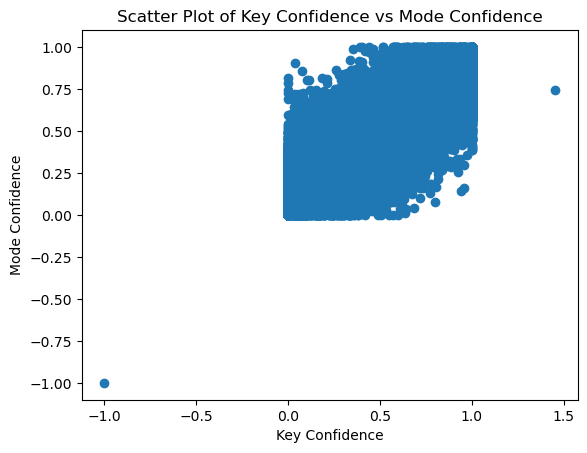

In [588]:
plt.scatter(df_uniqueID['key_confidence'], df_uniqueID['mode_confidence'])

# Add titles and labels
plt.title('Scatter Plot of Key Confidence vs Mode Confidence')
plt.xlabel('Key Confidence')
plt.ylabel('Mode Confidence')

plt.show()

In [594]:
df_uniqueID[
    (~df_uniqueID['key_confidence'].between(0, 1)) | 
    (~df_uniqueID['mode_confidence'].between(0, 1))
]

id                                      name  \
28826  2VsX1BoWSGiuVXGiFSUr6h              Maggie Mae - Remastered 2009   
42381  3gIEb1mxGFTMlJAkaYaG2Q  Pure White Noise - Loopable with No Fade   

       disc_number  explicit  popularity  track_number  \
28826            1         0        50.0             7   
42381            1         0        27.0             7   

                                                 artists album_type  \
28826                                        The Beatles      album   
42381  Sleep Baby Sleep,Relaxation,White Noise Medita...      album   

                                              album_name  album_total_tracks  \
28826                             Let It Be (Remastered)                  12   
42381  Brown Noise, White Noise, and Binaural Beats E...                   7   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
28826         0.516   0.515    2   -12.035     0        0.215         0.379   
42381         0.000   0.000    0    -8.437     0        0.000         0.000   

       instrumentalness  liveness  valence    tempo  time_signature  \
28826               0.0     0.103    0.524  169.039               4   
42381               0.0     0.000    0.000    0.000               0   

       start_of_fade_out  tempo_confidence  time_signature_confidence  \
28826           0.667333             0.052                        1.0   
42381           1.231446             0.000                        0.0   

       key_confidence  mode_confidence  n_beats  n_bars      genres  \
28826           1.454            0.743    104.0    25.0  psych-rock   
42381          -1.000           -1.000      0.0     0.0       sleep   

       num_genres       genre  duration_min  features_duration_min  \
28826           1  psych-rock      0.667333               0.667333   
42381           1       sleep      1.231433               1.231450   

      album_release_year  num_artists  
28826               1970            1  
42381               2015            6

In [602]:
df_uniqueID.loc[28826, 'key_confidence']=1
df_uniqueID.loc[42381, 'key_confidence']=0
df_uniqueID.loc[42381, 'mode_confidence']=0

In [603]:
df_uniqueID.describe().loc[['min', 'max']]

disc_number  explicit  popularity  track_number  album_total_tracks  \
min          1.0       0.0         0.0           1.0                 1.0   
max         14.0       1.0        95.0         475.0               495.0   

     danceability  energy   key  loudness  mode  speechiness  acousticness  \
min         0.000     0.0   0.0   -49.531   0.0        0.000         0.000   
max         0.985     1.0  11.0     4.532   1.0        0.965         0.996   

     instrumentalness  liveness  valence    tempo  time_signature  \
min               0.0       0.0    0.000    0.000             0.0   
max               1.0       1.0    0.995  243.372             5.0   

     start_of_fade_out  tempo_confidence  time_signature_confidence  \
min           0.143111               0.0                        0.0   
max          68.438983               1.0                        1.0   

     key_confidence  mode_confidence  n_beats  n_bars  num_genres  \
min             0.0              0.0      0.0     0.0         1.0   
max             1.0              1.0   7348.0  2170.0         8.0   

     duration_min  features_duration_min  num_artists  
min      0.143100               0.143117          1.0  
max     68.670967              68.670967         38.0

In [1232]:
df_uniqueID

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       explicit  popularity  track_number                    artists  \
0             1        35.0             1                       Rill   
1             0        49.0            10                  Glee Cast   
2             0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3             0        62.0             1  Jordan Sandhu,Bunty Bains   
4             0        20.0             9           Paul Kalkbrenner   
...         ...         ...           ...                        ...   
89555         0        64.0             1     Haricharan,Gopi Sundar   
89556         0        31.0             3                Piano Genie   
89557         0        64.0             2                  Eric Chou   
89558         0        60.0             5                 Stereoclip   
89559         0        22.0            10                 The Posies   

      album_type         album_name  album_total_tracks  danceability  \
0         single              Lolly                   1         0.910   
1          album    Glee Love Songs                 100         0.269   
2          album                  X                  11         0.686   
3         single         Teeje Week                   1         0.679   
4          album               Zeit                  11         0.519   
...          ...                ...                 ...           ...   
89555      album     Bangalore Days                   7         0.766   
89556     single  Disney Favourites                   7         0.529   
89557      album                學著愛                  11         0.423   
89558      album             Echoes                  10         0.649   
89559      album   Amazing Disgrace                  14         0.263   

        energy  key  loudness  mode  speechiness  acousticness  \
0      0.37400    8    -9.844     0       0.1990      0.075700   
1      0.51600    0    -7.361     1       0.0366      0.406000   
2      0.56000    5   -13.264     0       0.0462      0.001140   
3      0.77000    0    -3.537     1       0.1900      0.058300   
4      0.43100    6   -13.606     0       0.0291      0.000964   
...        ...  ...       ...   ...          ...           ...   
89555  0.38200    7   -11.464     0       0.0324      0.698000   
89556  0.00879   10   -32.266     1       0.0587      0.996000   
89557  0.36000    3    -9.458     1       0.0372      0.728000   
89558  0.83400   10   -11.430     0       0.0397      0.268000   
89559  0.95700    4    -6.887     1       0.0897      0.000023   

       instrumentalness  liveness  valence    tempo  time_signature  \
0               0.00301    0.1540    0.432  104.042               4   
1               0.00000    0.1170    0.341  178.174               4   
2    

#### genre distrib. after random selection

In [1233]:
df_uniqueID['genre2'] = df_uniqueID['genres'].apply(lambda x: x[0] if isinstance(x, list) else x)

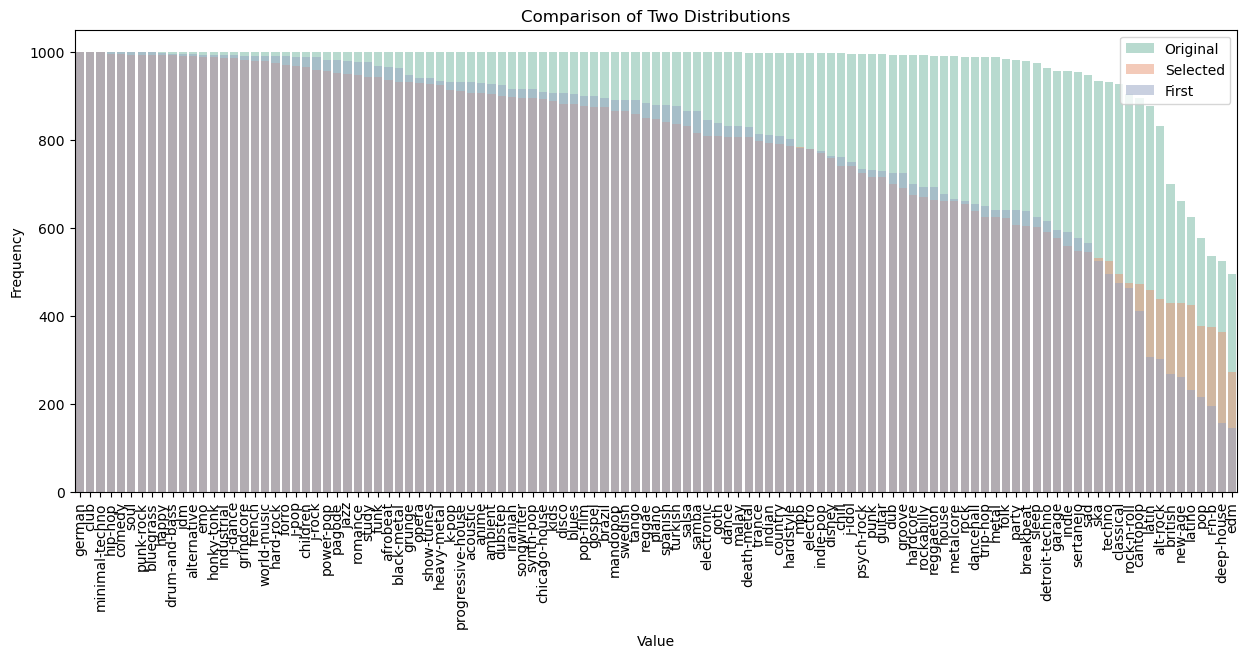

In [1234]:
data1 = df_track['genre'].value_counts()
data2 = df_uniqueID['genre'].value_counts()
data3 = df_uniqueID['genre2'].value_counts()

colors = sns.color_palette('Set2', n_colors=3)

# Plotting
plt.figure(figsize=(15, 6))

sns.barplot(x=df_track['genre'].unique(), y=data1, alpha = 0.5, color=colors[0], label='Original')
sns.barplot(x=df_uniqueID['genre'].unique(), y=data2, alpha = 0.5, color=colors[1], label='Selected')
sns.barplot(x=df_uniqueID['genre2'].unique(), y=data3, alpha = 0.5, color=colors[2], label='First')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Comparison of Two Distributions')
plt.legend(loc='upper right')
plt.grid(False)

# Show plot
plt.show()


In [574]:
new_tracks_cat = ['disc_number',
              'explicit',
              'album_type',
              'key',
              'mode', 
              'time_signature'
                ]



new_tracks_num = ['duration_min',
              'popularity', 
              'track_number', 
              'album_total_tracks', 
              'danceability', 
              'energy', 
              'loudness', 
              'speechiness', 
              'acousticness', 
              'instrumentalness', 
              'liveness', 
              'valence', 
              'tempo', 
              'start_of_fade_out',
              'tempo_confidence',
              'time_signature_confidence',
              'key_confidence', 
              'mode_confidence',
              'n_beats',
              'n_bars',
              'num_genres',
              'features_duration_min', 'album_release_year', 'num_artists'
             ]

In [578]:
# find correlation_spearman
correlation_spearman = df_uniqueID[new_tracks_num].corr(method = "spearman")
correlation_spearman

duration_min  popularity  track_number  \
duration_min                   1.000000    0.034314     -0.034687   
popularity                     0.034314    1.000000     -0.326405   
track_number                  -0.034687   -0.326405      1.000000   
album_total_tracks            -0.097097   -0.348052      0.708843   
danceability                  -0.083370    0.040210     -0.108682   
energy                         0.115177    0.000914     -0.078443   
loudness                       0.032701    0.073318     -0.077894   
speechiness                   -0.124178   -0.078527     -0.066516   
acousticness                  -0.179313    0.000216      0.084615   
instrumentalness               0.118205   -0.125424     -0.039500   
liveness                      -0.041422   -0.006452      0.036515   
valence                       -0.169622    0.009641      0.040799   
tempo                          0.053090    0.009651     -0.042562   
start_of_fade_out              0.997385    0.034889     -0.035271   
tempo_confidence               0.054901    0.024978     -0.077454   
time_signature_confidence     -0.038208    0.075871     -0.083512   
key_confidence                 0.009075    0.021999      0.008336   
mode_confidence                0.011442    0.070176     -0.000961   
n_beats                        0.806609    0.030344     -0.059253   
n_bars                         0.796601    0.021372     -0.049431   
num_genres                     0.001283    0.052052      0.063951   
features_duration_min          0.999878    0.034341     -0.034708   
num_artists                    0.010757    0.020996     -0.073144   

                           album_total_tracks  danceability    energy  \
duration_min                        -0.097097     -0.083370  0.115177   
popularity                          -0.348052      0.040210  0.000914   
track_number                         0.708843     -0.108682 -0.078443   
album_total_tracks                   1.000000     -0.111796 -0.055941   
danceability                        -0.111796      1.000000  0.049857   
energy                              -0.055941      0.049857  1.000000   
loudness                            -0.056734      0.115404  0.753191   
speechiness                         -0.068191      0.152136  0.350309   
acousticness                         0.096644     -0.053084 -0.712426   
instrumentalness                    -0.083671     -0.157977 -0.043066   
liveness                             0.068784     -0.148409  0.182287   
valence                              0.099919      0.476866  0.205096   
tempo                               -0.048014     -0.048328  0.250101   
start_of_fade_out                   -0.095008     -0.077088  0.129487   
tempo_confidence                    -0.066798      0.469303  0.333964   
time_signature_confidence           -0.090090      0.421188  0.160451   
key_confidence                       0.005453     -0.044135 -0.108313   
mode_confidence                     -0.012287     -0.081202 -0.214187   
n_beats                             -0.112176     -0.078917  0.236221   
n_bars                              -0.102990     -0.111111  0.201733   
num_genres                           0.085058      0.024917  0.009590   
features_duration_min               -0.097102     -0.083374  0.115178   
num_artists                         -0.085424      0.104399 -0.029792   

                           loudness  speechiness  acousticness  \
duration_min               0.032701    -0.124178     -0.179313   
popularity                 0.073318    -0.078527      0.000216   
track_number              -0.077894    -0.066516      0.084615   
album_total_tracks        -0.056734    -0.068191      0.096644   
danceability               0.115404     0.152136     -0.053084   
energy                     0.753191     0.350309     -0.712426   
loudness                   1.000000     0.217741     -0.537619   
speechiness                0.217741     1.000000     -0.215343   
acousticness           

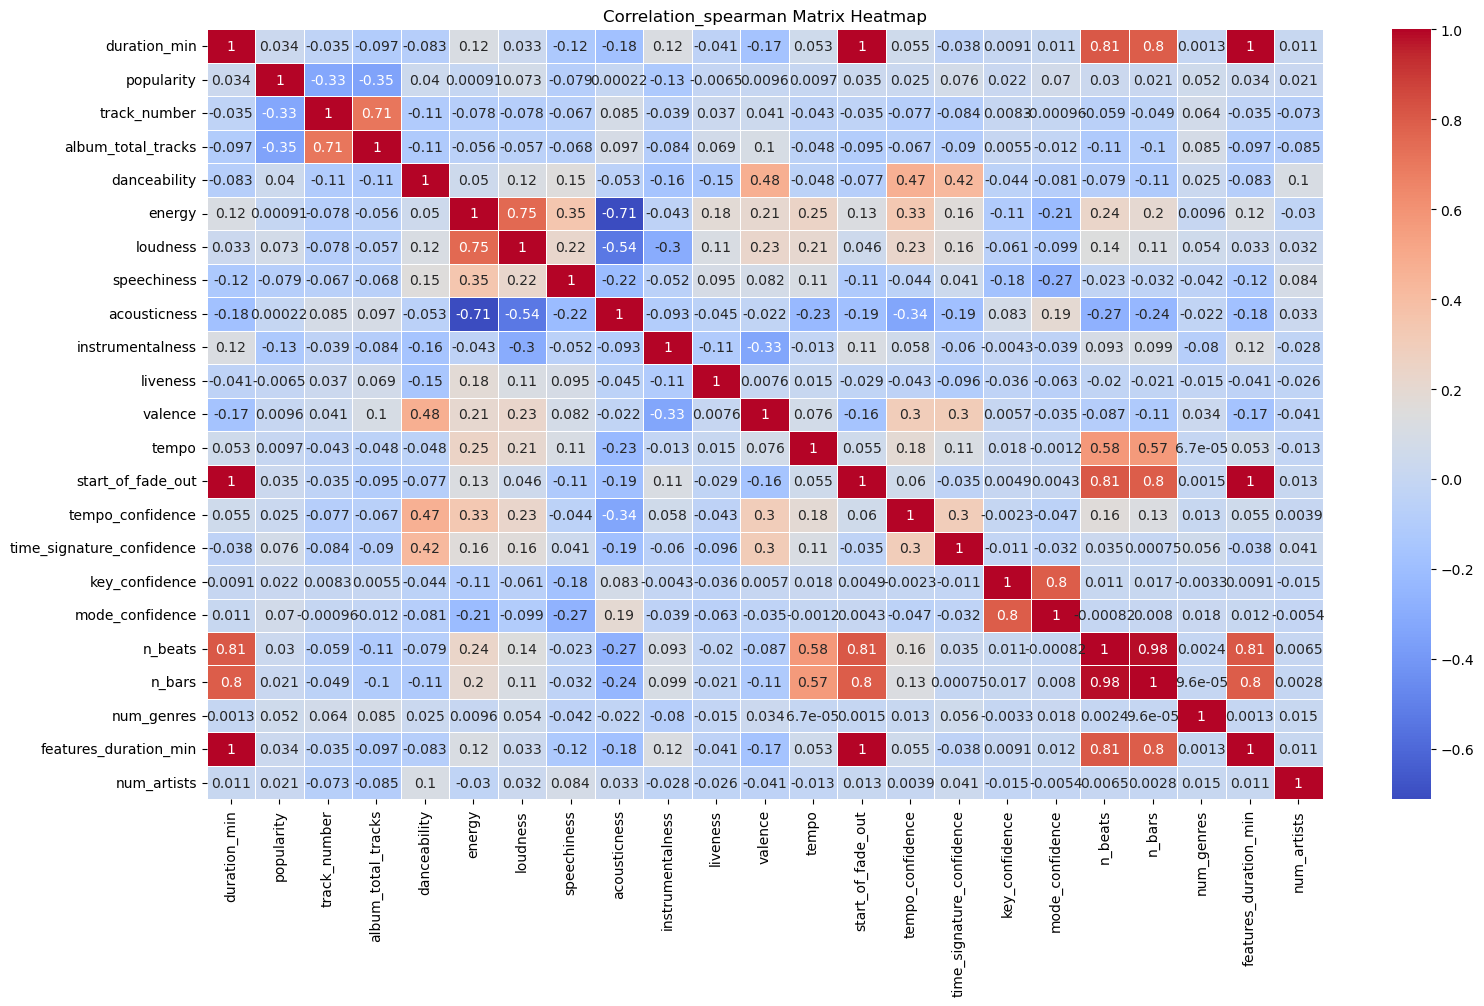

In [579]:
# make heatmap
plt.figure(figsize=(18, 10))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

In [1236]:
df_uniqueID = df_uniqueID.drop(columns = 'genre')

In [1237]:
df_uniqueID = df_uniqueID.rename(columns={'genre2': 'genre'})

In [1239]:
df_uniqueID.to_csv('tracks_new.csv', index=False)

## join 2 df

In [905]:
track_artists = df_uniqueID['artists'].apply(lambda x: x.strip().split(','))

In [909]:
track_artists

0                              [Rill]
1                         [Glee Cast]
2         [Paul Kalkbrenner, Pig&Dan]
3        [Jordan Sandhu, Bunty Bains]
4                  [Paul Kalkbrenner]
                     ...             
89555       [Haricharan, Gopi Sundar]
89556                   [Piano Genie]
89557                     [Eric Chou]
89558                    [Stereoclip]
89559                    [The Posies]
Name: artists, Length: 89560, dtype: object

In [910]:
artists

0                      Fast Eddie
1                      Joe Smooth
2        Farley "Jackmaster" Funk
3                         Jomanda
4                       Floorplan
                   ...           
30136                       Hoang
30137                Robin Hustin
30138                  TobiMorrow
30139                    Diviners
30140                   Philly K.
Name: name, Length: 30137, dtype: object

In [911]:
track_unique_artists = set()
for a in track_artists:
    track_unique_artists.update(a) 
track_unique_artists

{'Miyakawa-kun',
 'Seaforth',
 'Billkin',
 'Raffertie',
 'Vandenberg',
 'KARLK',
 'V- Unit',
 'Rohit Gopalakrishnan',
 'Christian Lais',
 'George Mensah',
 'Extazy',
 'Terveet Kädet',
 'Anna Yvette',
 'Obfusc',
 'Buzz Fuzz',
 'Kiloucura',
 'Them',
 'Valerio Castilla',
 'Stéphanie Detry',
 'Salvatore Accardo',
 'Mitch Fatel',
 "Mary's Blood",
 'Michele Chiavarini',
 'Gabriel Fauré',
 'Diego Karter',
 'Magdalena Hoffmann',
 'Tofiq Quliyev',
 'Trella',
 'Weißes Rauschen HD',
 'Taylor Manns',
 'LE RISQUE',
 'Spa Relaxation & Spa',
 'Gautam Gulati',
 'Mantra para Dormir',
 'Igor Levit',
 'Rikki',
 'Troglauer',
 'Yung Fusion',
 'Sergio Zamora',
 'Major RD',
 'Nina Miranda',
 'Ghostface Playa',
 'GXD',
 'Lobo',
 'Rico Nasty',
 'Alfons Kontarsky',
 'Richie Ray',
 'Chicago Ensemble',
 'Christian J',
 'Матвей Сахаров',
 'Andrew Garfield',
 'Darzamat',
 'Leony',
 'Tan Taşçı',
 'Lesia Karz',
 'Cristiano Lobo',
 'Faithless',
 'Harish Raghavan',
 'Bogdan Mihai',
 'J Capri',
 'Syzz',
 'Massimo Palomb

In [912]:
len(track_unique_artists)

29956

In [913]:
artists = df_art['name']

In [914]:
df_art['name'].nunique()

29917

In [915]:
df_art[df_art['name'].duplicated(keep=False)].sort_values(by='name')

id                    name  popularity  followers  \
23233  4zPCP1wMTDpEWsMWtMvPv5   A Forest Mighty Black        26.0      702.0   
23254  0kvh70DV0fgXwIVVtwNs9y   A Forest Mighty Black         6.0     8217.0   
7862   2s79xe5F6eUQkjwjww27Fh                     ABC        50.0   359430.0   
8018   4rEDJ9ob6KcrCrREd122rK                     ABC         8.0       71.0   
28130  4XwGPoIgGhrnfSqa7slAkZ                    AC15        11.0        0.0   
...                       ...                     ...         ...        ...   
5964   7toc8ts53bAbjtbgb8LYL2  White Noise Baby Sleep        33.0      102.0   
29630  3jASw3YQHarl90fZWNyCdn           Will Anderson        33.0     1829.0   
27343  4r4X95m8UEHEY1mm27IBxo           Will Anderson        33.0       94.0   
3550   0lDA0wr9RTieRMAcnD6RrS                   Xandl         6.0        1.0   
21592  3kqSSvsZnpZwKRAm2fdygw                   Xandl        22.0     1371.0   

                                                  genres  num_genres  \
23233                                                 []           0   
23254                                       ['trip hop']           1   
7862   ['dance rock', 'new romantic', 'new wave', 'ne...           6   
8018                                                  []           0   
28130                                                 []           0   
...                                                  ...         ...   
5964                                                  []           0   
29630                                                 []           0   
27343                                                 []           0   
3550                                                  []           0   
21592                                    ['groove room']           1   

       first_genre  
23233               
23254     trip hop  
7862    dance rock  
8018                
28130               
...            ...  
5964                
29630               
27343               
3550                
21592  groove room  

[430 rows x 7 columns]

In [916]:
count = 0
both = []
in_track = []
for a in track_unique_artists:
    if a in artists.values:
        count += 1
    else: in_track.append(a)

In [917]:
count

29857

In [918]:
len(in_track)

99

In [919]:
count = 0
both = []
in_artist = []
for a in artists.values:
    if a in track_unique_artists:
        count += 1
    else: in_artist.append(a)

In [920]:
count

30077

In [921]:
len(in_artist)

60

**single artist**

0. drop all songs corresponding to the artist that have duplicates in df_art

**multiple artists policy**
1. among all artists, there exists only one artist that belongs to the df_art with no duplicate name => use popularity of this artist
2. among all artists, there exist multiple artists that belongs to the df_art with no duplicate name => use avg popularity
3. all artists can have duplicate name in the df_art/all artists not in df_art => discard

#### check if multiple artists contain some artists with the same name in df_art

In [932]:
df_uniqueArt = df_uniqueID.copy()

In [923]:
duplicated = df_art[df_art['name'].duplicated(keep='first')]['name']
unique = df_art[~df_art['name'].duplicated(keep=False)]['name']
multi_art = track_artists[track_artists.apply(lambda x: len(x)>1)]

In [924]:
track_artists

0                              [Rill]
1                         [Glee Cast]
2         [Paul Kalkbrenner, Pig&Dan]
3        [Jordan Sandhu, Bunty Bains]
4                  [Paul Kalkbrenner]
                     ...             
89555       [Haricharan, Gopi Sundar]
89556                   [Piano Genie]
89557                     [Eric Chou]
89558                    [Stereoclip]
89559                    [The Posies]
Name: artists, Length: 89560, dtype: object

In [925]:
unqiue_art = []
for art in multi_art:
    u = []
    for a in art:
        if a in unique.values:
            u.append(a)
    unqiue_art.append(u)

In [926]:
index = multi_art.index
pd.Series(unqiue_art, index=index)

2                     [Paul Kalkbrenner, Pig&Dan]
3                    [Jordan Sandhu, Bunty Bains]
6                            [Pink Sweat$, KIRBY]
10                                 [Sigma, Birdy]
14                                  [Ouse, Powfu]
                           ...                   
89536    [Pritam, Shahid Mallya, Sunidhi Chauhan]
89538              [Ron Trent, Anthony Nicholson]
89543                          [Jhayco, Anuel AA]
89553                         [Dash Berlin, Syzz]
89555                   [Haricharan, Gopi Sundar]
Length: 22833, dtype: object

In [927]:
multi_art_unique = pd.DataFrame({
                                    'artists': multi_art,
                                    'unique_name': pd.Series(unqiue_art, index=index)
                                })

#### case 1

In [928]:
unique_index = multi_art_unique[multi_art_unique['unique_name'].apply(lambda x: len(x)) == 1].index

In [929]:
multi_art_unique.loc[list(unique_index)]

artists            unique_name
256          [sagun, Shiloh Dynasty]                [sagun]
420                     [Pritam, KK]               [Pritam]
607    [Baby Rasta & Gringo, Plan B]  [Baby Rasta & Gringo]
882        [Michelle, Matthias Reim]        [Matthias Reim]
1122             [Lushington, Felon]           [Lushington]
...                              ...                    ...
88487                   [Pritam, KK]               [Pritam]
88795            [Joel Corry, Mabel]           [Joel Corry]
88817            [Péricles, Chrigor]              [Chrigor]
88998   [KD Da Kid, Grey Skye Evans]            [KD Da Kid]
89286   [Péricles, Xande De Pilares]     [Xande De Pilares]

[541 rows x 2 columns]

In [930]:
 multi_art_unique.loc[list(unique_index), 'unique_name'].apply(lambda x: x[0])

256                    sagun
420                   Pritam
607      Baby Rasta & Gringo
882            Matthias Reim
1122              Lushington
                ...         
88487                 Pritam
88795             Joel Corry
88817                Chrigor
88998              KD Da Kid
89286       Xande De Pilares
Name: unique_name, Length: 541, dtype: object

In [933]:
df_uniqueArt.loc[list(unique_index), 'artists'] = multi_art_unique.loc[list(unique_index), 'unique_name'].apply(lambda x: x[0])

In [934]:
df_uniqueArt.loc[list(unique_index)] 

id                           name  disc_number  \
256    01Rc6yXYtujAnMaR1NME11             I'll Keep You Safe            1   
420    02J3mNwGfcOS7jjAUfzMgV                      Aur Tanha            1   
607    03KbmKOZsiggos6YrO6bUw             Ella Se Contradice            1   
882    04ize5IEH2inSkQkqFGLd8           Idiot - Version 2011            1   
1122   06AnFAzIKIThEEFA1H46Rj  You Got Me Baby - Felon Remix            1   
...                       ...                            ...          ...   
88487  7txLCGOXyDlDXTjtR1Sk4v                     Tu Jo Mila            1   
88795  7vXR7bMvuo6uShUFo4q6sv                         I Wish            1   
88817  7vg4ESJLw2k57MrAh4AsJF          Teu Segredo - Ao Vivo            1   
88998  7wi6xKpE95OcXF9SAqhD7x               Hands Up - Remix            1   
89286  7yRxyBjERAuSfyhK6W0tDk                Brasa - Ao Vivo            1   

       explicit  popularity  track_number              artists   album_type  \
256           0        69.0             1                sagun       single   
420           0        46.0             5               Pritam        album   
607           0        35.0             1  Baby Rasta & Gringo       single   
882           0         0.0            15        Matthias Reim  compilation   
1122          0        14.0            10           Lushington  compilation   
...         ...         ...           ...                  ...          ...   
88487         0        70.0             7               Pritam        album   
88795         0         0.0            10           Joel Corry  compilation   
88817         0        61.0             6              Chrigor        album   
88998         1        12.0             1            KD Da Kid       single   
89286         0        40.0             5     Xande De Pilares        album   

                                              album_name  album_total_tracks  \
256                                   I'll Keep You Safe                   1   
420    Love Aaj Kal (Original Motion Picture Soundtrack)                  11   
607                                   Ella Se Contradice                   1   
882                                     Best Of Karneval                  90   
1122   Armada - The Remixes 2017, Vol. 2 (The Future ...                  15   
...                                                  ...                 ...   
88487                                  Bajrangi Bhaijaan                  11   
88795                                  Dance Dance Dance                  26   
88817                        Pagode do Pericão (Ao Vivo)                  10   
88998                                   Hands Up (Remix)                   1   
89286              Pagode Do Pericão II, Pt. 2 (Ao Vivo)                  11   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
256           0.752  0.0625    7   -24.694     1       0.0557       0.94500   
420           0.434  0.5600    9    -7.656     1       0.0328       0.79000   
607           0.774  0.7470    4    -8.218     0       0.3130       0.31100   
882           0.732  0.8260   11    -4.936     1       0.0353       0.17300   
1122          0.791  0.7380    7    -6.065     1       0.0436       0.00177   
...             ...     ...  ...       ...   ...          ...           ...   
88487         0.576  0.5910    0    -7.725     1       0.0332       0.79500   
88795         0.686  0.8560    9    -2.717     0       0.0426       0.08960   
88817         0.517  0.7070    2    -6.910     1       0.0417       0.67200   
88998         0.823  0.4470    9    -5.582     1       0.1550       0.33500   
89286         0.651  0.7350    7    -6.719     1       0.0537       0.67000   

       instrumentalness  liveness  valence    tempo  time_signature  \
256            0.819000    0.1780    0.462  114.982               4   
420            0.004340    0.0858    0.201  169.896               4   
607            0.000000    0.6

#### case 2

#### test corr between popularity and popularity of  artists

In [985]:
case_2_idx = multi_art_unique[multi_art_unique['unique_name'].apply(lambda x: len(x)) > 1].index

In [1005]:
case_2 = multi_art_unique.loc[list(case_2_idx)]

In [993]:
df_art[df_art['name'].isin(case_2.iloc[0])]

id              name  popularity  followers  \
5296  0rasA5Z5h1ITtHelCpfu9R  Paul Kalkbrenner        62.0  1172268.0   
5324  04jj7dljPI0ixtNsz2pXWK           Pig&Dan        38.0    85944.0   

                                                 genres  num_genres  \
5296  ['electronica', 'german techno', 'leipzig elec...           4   
5324  ['dark techno', 'minimal techno', 'spanish tec...           4   

      first_genre  
5296  electronica  
5324  dark techno

In [998]:
multi_art_unique.loc[list(case_2_idx)]

artists  \
2                   [Paul Kalkbrenner, Pig&Dan]   
3                  [Jordan Sandhu, Bunty Bains]   
6                          [Pink Sweat$, KIRBY]   
10                               [Sigma, Birdy]   
14                                [Ouse, Powfu]   
...                                         ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]   
89538            [Ron Trent, Anthony Nicholson]   
89543                        [Jhayco, Anuel AA]   
89553                       [Dash Berlin, Syzz]   
89555                 [Haricharan, Gopi Sundar]   

                                    unique_name  popularity_track  
2                   [Paul Kalkbrenner, Pig&Dan]               0.0  
3                  [Jordan Sandhu, Bunty Bains]              62.0  
6                          [Pink Sweat$, KIRBY]               0.0  
10                               [Sigma, Birdy]              25.0  
14                                [Ouse, Powfu]              54.0  
...                                         ...               ...  
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]              48.0  
89538            [Ron Trent, Anthony Nicholson]              14.0  
89543                        [Jhayco, Anuel AA]               0.0  
89553                       [Dash Berlin, Syzz]              36.0  
89555                 [Haricharan, Gopi Sundar]              64.0  

[22126 rows x 3 columns]

In [1016]:
%%time
def stat_popularity(artists):
    pop_values = df_art[df_art['name'].isin(artists)]['popularity']
    if len(pop_values) > 0:
        return pop_values.mean(), pop_values.max(), pop_values.min()
    return None, None, None

case_2['pop_stats'] = case_2['artists'].apply(stat_popularity)

CPU times: user 22.8 s, sys: 94.5 ms, total: 22.9 s
Wall time: 22.9 s


In [1019]:
case_2[['avg_pop', 'max_pop', 'min_pop']] = pd.DataFrame(case_2['pop_stats'].tolist(), index=case_2.index)

In [1020]:
case_2

artists  \
2                   [Paul Kalkbrenner, Pig&Dan]   
3                  [Jordan Sandhu, Bunty Bains]   
6                          [Pink Sweat$, KIRBY]   
10                               [Sigma, Birdy]   
14                                [Ouse, Powfu]   
...                                         ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]   
89538            [Ron Trent, Anthony Nicholson]   
89543                        [Jhayco, Anuel AA]   
89553                       [Dash Berlin, Syzz]   
89555                 [Haricharan, Gopi Sundar]   

                                    unique_name  popularity_track    avg_pop  \
2                   [Paul Kalkbrenner, Pig&Dan]               0.0  50.000000   
3                  [Jordan Sandhu, Bunty Bains]              62.0  56.500000   
6                          [Pink Sweat$, KIRBY]               0.0  59.500000   
10                               [Sigma, Birdy]              25.0  62.500000   
14                                [Ouse, Powfu]              54.0  58.500000   
...                                         ...               ...        ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]              48.0  71.333333   
89538            [Ron Trent, Anthony Nicholson]              14.0  18.500000   
89543                        [Jhayco, Anuel AA]               0.0  84.000000   
89553                       [Dash Berlin, Syzz]              36.0  54.500000   
89555                 [Haricharan, Gopi Sundar]              64.0  63.500000   

                             pop_stats  max_pop  min_pop  
2                   (50.0, 62.0, 38.0)     62.0     38.0  
3                   (56.5, 64.0, 49.0)     64.0     49.0  
6                   (59.5, 66.0, 53.0)     66.0     53.0  
10                  (62.5, 68.0, 57.0)     68.0     57.0  
14                  (58.5, 67.0, 50.0)     67.0     50.0  
...                                ...      ...      ...  
89536  (71.33333333333333, 85.0, 57.0)     85.0     57.0  
89538                (18.5, 31.0, 6.0)     31.0      6.0  
89543               (84.0, 86.0, 82.0)     86.0     82.0  
89553               (54.5, 56.0, 53.0)     56.0     53.0  
89555               (63.5, 68.0, 59.0)     68.0     59.0  

[22126 rows x 7 columns]

In [1031]:
%%time
def stat_fol(artists):
    fol_values = df_art[df_art['name'].isin(artists)]['followers']
    if len(fol_values) > 0:
        return fol_values.mean(), fol_values.max(), fol_values.min()
    return None, None, None

case_2['fol_stats'] = case_2['artists'].apply(stat_fol)

CPU times: user 24 s, sys: 211 ms, total: 24.2 s
Wall time: 24.3 s


In [1032]:
case_2[['avg_fol', 'max_fol', 'min_fol']] = pd.DataFrame(case_2['fol_stats'].tolist(), index=case_2.index)

In [1180]:
%%time
def stat_genre(artists):
    gen_values = df_art[df_art['name'].isin(artists)]['num_genres']
    if len(gen_values) > 0:
        return gen_values.mean(), gen_values.max(), gen_values.min()
    return None, None, None

case_2['genre_stats'] = case_2['artists'].apply(stat_genre)

CPU times: user 23.2 s, sys: 96.1 ms, total: 23.3 s
Wall time: 23.3 s


In [1183]:
case_2[['avg_gen', 'max_gen', 'min_gen']] = pd.DataFrame(case_2['genre_stats'].tolist(), index=case_2.index)

In [1185]:
case_2 = case_2.drop(columns=['pop_stats', 'fol_stats', 'genre_stats'])
case_2

artists  \
2                   [Paul Kalkbrenner, Pig&Dan]   
3                  [Jordan Sandhu, Bunty Bains]   
6                          [Pink Sweat$, KIRBY]   
10                               [Sigma, Birdy]   
14                                [Ouse, Powfu]   
...                                         ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]   
89538            [Ron Trent, Anthony Nicholson]   
89543                        [Jhayco, Anuel AA]   
89553                       [Dash Berlin, Syzz]   
89555                 [Haricharan, Gopi Sundar]   

                                    unique_name  popularity_track    avg_pop  \
2                   [Paul Kalkbrenner, Pig&Dan]               0.0  50.000000   
3                  [Jordan Sandhu, Bunty Bains]              62.0  56.500000   
6                          [Pink Sweat$, KIRBY]               0.0  59.500000   
10                               [Sigma, Birdy]              25.0  62.500000   
14                                [Ouse, Powfu]              54.0  58.500000   
...                                         ...               ...        ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]              48.0  71.333333   
89538            [Ron Trent, Anthony Nicholson]              14.0  18.500000   
89543                        [Jhayco, Anuel AA]               0.0  84.000000   
89553                       [Dash Berlin, Syzz]              36.0  54.500000   
89555                 [Haricharan, Gopi Sundar]              64.0  63.500000   

       max_pop  min_pop       avg_fol     max_fol    min_fol   avg_gen  \
2         62.0     38.0  6.291060e+05   1172268.0    85944.0  4.000000   
3         64.0     49.0  1.396958e+06   2792574.0     1342.0  0.500000   
6         66.0     53.0  9.385145e+05   1735444.0   141585.0  1.500000   
10        68.0     57.0  2.040324e+06   3768180.0   312469.0  3.000000   
14        67.0     50.0  6.409705e+05   1189921.0    92020.0  2.500000   
...        ...      ...           ...         ...        ...       ...   
89536     85.0     57.0  1.133798e+07  18674524.0    20037.0  2.333333   
89538     31.0      6.0  1.615350e+04     31266.0     1041.0  3.000000   
89543     86.0     82.0  1.888165e+07  31328312.0  6434983.0  4.000000   
89553     56.0     53.0  2.831990e+05    541576.0    24822.0  3.500000   
89555     68.0     59.0  1.444316e+06   2294522.0   594109.0  1.000000   

       max_gen  min_gen  
2            4        4  
3            1        0  
6            2        1  
10           4        2  
14           3        2  
...        ...      ...  
89536        3        2  
89538        5        1  
89543        5        3  
89553        7        0  
89555        1        1  

[22126 rows x 12 columns]

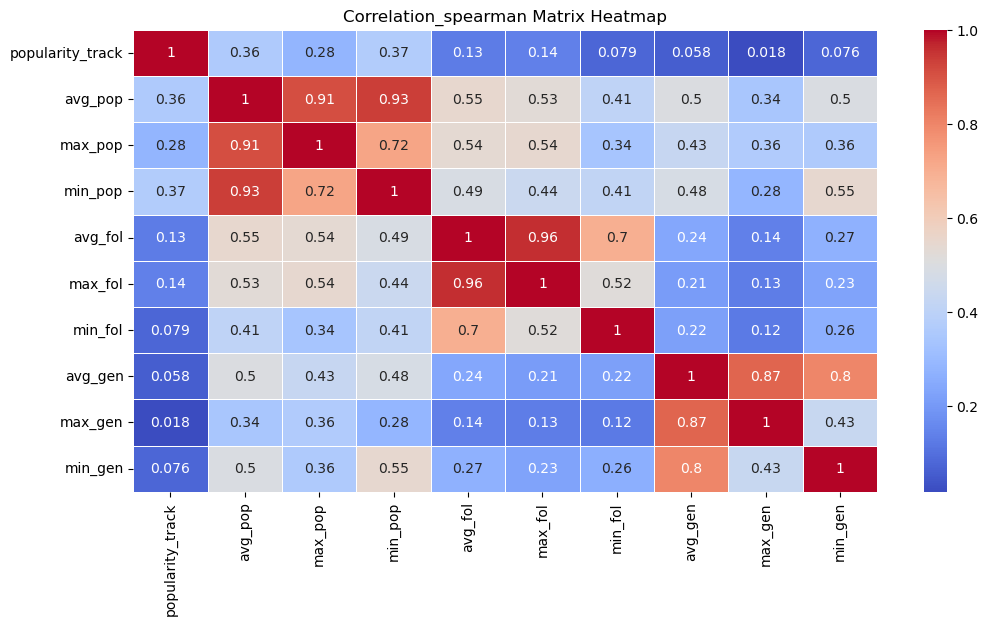

In [1187]:
# find correlation_spearman
cols = ['popularity_track', 'max_popularity', 'min_popularity', 'max_f', 'min_f', 'avg_popularity', 'avg_f']

correlation_spearman = case_2.corr()
correlation_spearman

# make heatmap
plt.figure(figsize=(12, 6))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

#### drop all duplicated name 

In [1038]:
duplicated

175                Tatiana
245      Wheels on the Bus
488         Shiloh Dynasty
1699                Pyt Ny
2688              Ian Dean
               ...        
29904                Monty
29913               DIESEL
29978              Oriente
29986                 RØRY
30020              Oriente
Name: name, Length: 220, dtype: object

In [1046]:
duplicated

175                Tatiana
245      Wheels on the Bus
488         Shiloh Dynasty
1699                Pyt Ny
2688              Ian Dean
               ...        
29904                Monty
29913               DIESEL
29978              Oriente
29986                 RØRY
30020              Oriente
Name: name, Length: 220, dtype: object

In [1054]:
filtered_df = df_uniqueArt[df_uniqueArt['num_artists'] == 1]

In [1060]:
case_0_idx = filtered_df[filtered_df['artists'].isin(duplicated)].index

In [1063]:
df_uniqueArt = df_uniqueArt.drop(index=case_0_idx)
df_uniqueArt

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       explicit  popularity  track_number                    artists  \
0             1        35.0             1                       Rill   
1             0        49.0            10                  Glee Cast   
2             0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3             0        62.0             1  Jordan Sandhu,Bunty Bains   
4             0        20.0             9           Paul Kalkbrenner   
...         ...         ...           ...                        ...   
89555         0        64.0             1     Haricharan,Gopi Sundar   
89556         0        31.0             3                Piano Genie   
89557         0        64.0             2                  Eric Chou   
89558         0        60.0             5                 Stereoclip   
89559         0        22.0            10                 The Posies   

      album_type         album_name  album_total_tracks  danceability  \
0         single              Lolly                   1         0.910   
1          album    Glee Love Songs                 100         0.269   
2          album                  X                  11         0.686   
3         single         Teeje Week                   1         0.679   
4          album               Zeit                  11         0.519   
...          ...                ...                 ...           ...   
89555      album     Bangalore Days                   7         0.766   
89556     single  Disney Favourites                   7         0.529   
89557      album                學著愛                  11         0.423   
89558      album             Echoes                  10         0.649   
89559      album   Amazing Disgrace                  14         0.263   

        energy  key  loudness  mode  speechiness  acousticness  \
0      0.37400    8    -9.844     0       0.1990      0.075700   
1      0.51600    0    -7.361     1       0.0366      0.406000   
2      0.56000    5   -13.264     0       0.0462      0.001140   
3      0.77000    0    -3.537     1       0.1900      0.058300   
4      0.43100    6   -13.606     0       0.0291      0.000964   
...        ...  ...       ...   ...          ...           ...   
89555  0.38200    7   -11.464     0       0.0324      0.698000   
89556  0.00879   10   -32.266     1       0.0587      0.996000   
89557  0.36000    3    -9.458     1       0.0372      0.728000   
89558  0.83400   10   -11.430     0       0.0397      0.268000   
89559  0.95700    4    -6.887     1       0.0897      0.000023   

       instrumentalness  liveness  valence    tempo  time_signature  \
0               0.00301    0.1540    0.432  104.042               4   
1               0.00000    0.1170    0.341  178.174               4   
2    

#### case 3

In [950]:
multi_art_unique[multi_art_unique['unique_name'].apply(lambda x: len(x)) == 0]

artists unique_name  popularity_track
557                       [nothing, nowhere.]          []               0.0
718                   [Our Hollow,  Our Home]          []              20.0
1159           [Sarah,  the Illstrumentalist]          []              14.0
1759                  [Francisco,  el Hombre]          []              39.0
2051   [Susan Rigvava-Dumas,  Carsten Lepper]          []              20.0
...                                       ...         ...               ...
85567          [Sarah,  the Illstrumentalist]          []              15.0
85614      [Fear,  and Loathing in Las Vegas]          []              47.0
87236                     [Pe. Zezinho,  SCJ]          []              45.0
87746          [Sarah,  the Illstrumentalist]          []               6.0
87852          [Sarah,  the Illstrumentalist]          []               4.0

[166 rows x 3 columns]

In [974]:
all_duplicates_noMatch_index = multi_art_unique[multi_art_unique['unique_name'].apply(lambda x: len(x)) == 0].index

In [952]:
multi_art_unique.loc[list(all_duplicates_noMatch_index)]

artists unique_name  popularity_track
557                       [nothing, nowhere.]          []               0.0
718                   [Our Hollow,  Our Home]          []              20.0
1159           [Sarah,  the Illstrumentalist]          []              14.0
1759                  [Francisco,  el Hombre]          []              39.0
2051   [Susan Rigvava-Dumas,  Carsten Lepper]          []              20.0
...                                       ...         ...               ...
85567          [Sarah,  the Illstrumentalist]          []              15.0
85614      [Fear,  and Loathing in Las Vegas]          []              47.0
87236                     [Pe. Zezinho,  SCJ]          []              45.0
87746          [Sarah,  the Illstrumentalist]          []               6.0
87852          [Sarah,  the Illstrumentalist]          []               4.0

[166 rows x 3 columns]

In [1064]:
df_uniqueArt

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       explicit  popularity  track_number                    artists  \
0             1        35.0             1                       Rill   
1             0        49.0            10                  Glee Cast   
2             0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3             0        62.0             1  Jordan Sandhu,Bunty Bains   
4             0        20.0             9           Paul Kalkbrenner   
...         ...         ...           ...                        ...   
89555         0        64.0             1     Haricharan,Gopi Sundar   
89556         0        31.0             3                Piano Genie   
89557         0        64.0             2                  Eric Chou   
89558         0        60.0             5                 Stereoclip   
89559         0        22.0            10                 The Posies   

      album_type         album_name  album_total_tracks  danceability  \
0         single              Lolly                   1         0.910   
1          album    Glee Love Songs                 100         0.269   
2          album                  X                  11         0.686   
3         single         Teeje Week                   1         0.679   
4          album               Zeit                  11         0.519   
...          ...                ...                 ...           ...   
89555      album     Bangalore Days                   7         0.766   
89556     single  Disney Favourites                   7         0.529   
89557      album                學著愛                  11         0.423   
89558      album             Echoes                  10         0.649   
89559      album   Amazing Disgrace                  14         0.263   

        energy  key  loudness  mode  speechiness  acousticness  \
0      0.37400    8    -9.844     0       0.1990      0.075700   
1      0.51600    0    -7.361     1       0.0366      0.406000   
2      0.56000    5   -13.264     0       0.0462      0.001140   
3      0.77000    0    -3.537     1       0.1900      0.058300   
4      0.43100    6   -13.606     0       0.0291      0.000964   
...        ...  ...       ...   ...          ...           ...   
89555  0.38200    7   -11.464     0       0.0324      0.698000   
89556  0.00879   10   -32.266     1       0.0587      0.996000   
89557  0.36000    3    -9.458     1       0.0372      0.728000   
89558  0.83400   10   -11.430     0       0.0397      0.268000   
89559  0.95700    4    -6.887     1       0.0897      0.000023   

       instrumentalness  liveness  valence    tempo  time_signature  \
0               0.00301    0.1540    0.432  104.042               4   
1               0.00000    0.1170    0.341  178.174               4   
2    

In [1065]:
df_uniqueArt.loc[list(all_duplicates_noMatch_index)]

id                  name  disc_number  explicit  \
557    038N1pDTNC5oOF9Vzk8fkv               pretend            1         0   
718    03tosz8WySyXlSffvvMidv               //Anger            1         0   
1159   06Oo3jUysaJeKQtuu2FpHQ         Amber Citrine            1         0   
1759   09cmEXqugz9e6D3ZzWiZZF          Calor da Rua            1         0   
2051   0BAvfy66AgcVs6PKbIumEp               Rebecca            1         0   
...                       ...                   ...          ...       ...   
85567  7e4xPma019GgBJ9akT42sZ          Come Correct            1         0   
85614  7eITsVSfN8kKAxT35hoKF2  The Gong of Knockout            1         0   
87236  7nE91jTdniDuc9BS2Haoyc                Utopia            1         0   
87746  7q2MGRYsOfn9wJ6gQ05KtE                Hyades            1         0   
87852  7qXOU6cphWamDZg2vYm3iw             Echinacea            1         0   

       popularity  track_number                              artists  \
557           0.0            45                     nothing,nowhere.   
718          20.0             4                 Our Hollow, Our Home   
1159         14.0             6          Sarah, the Illstrumentalist   
1759         39.0             2                 Francisco, el Hombre   
2051         20.0            14  Susan Rigvava-Dumas, Carsten Lepper   
...           ...           ...                                  ...   
85567        15.0             1          Sarah, the Illstrumentalist   
85614        47.0             2      Fear, and Loathing in Las Vegas   
87236        45.0             7                     Pe. Zezinho, SCJ   
87746         6.0             7          Sarah, the Illstrumentalist   
87852         4.0             6          Sarah, the Illstrumentalist   

        album_type                      album_name  album_total_tracks  \
557    compilation             All Out Alternative                  55   
718          album         In Moment / / In Memory                  15   
1159         album  Pocket Full of Crystals: Vol 1                   9   
1759         album                     Soltasbruxa                  13   
2051   compilation        Rebecca - Gesamtaufnahme                  45   
...            ...                             ...                 ...   
85567       single                    Come Correct                   2   
85614        album                  HYPERTOUGHNESS                  11   
87236        album        Um Certo Galileu, Vol. 1                  10   
87746        album                  Constellations                  12   
87852        album                         FLOWERS                  12   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
557           0.533   0.838    1    -5.625     0       0.0837      0.025100   
718           0.342   0.957    9    -3.897     0       0.1600      0.062400   
1159          0.672   0.463    1    -9.856     0       0.0842      0.864000   
1759          0.632   0.593    4    -6.473     0       0.0320      0.302000   
2051          0.408   0.642    3    -8.471     0       0.1730      0.708000   
...             ...     ...  ...       ...   ...          ...           ...   
85567         0.772   0.596    0    -7.105     1       0.2290      0.369000   
85614         0.197   0.994    8    -1.721     1       0.3240      0.000193   
87236         0.647   0.333    5   -12.329     1       0.0345      0.926000   
87746         0.676   0.380    9   -14.349     1       0.0330      0.497000   
87852         0.567   0.483    9   -12.536     0       0.0561      0.392000   

       instrumentalness  liveness  valence    tempo  time_signature  \
557            0.000000     0.318   0.7220   80.049               4   
718            0.001650     0.860   0.0387  139.943               4   
1159           0.950000     0.177   0.2520  182.041               4   
1759           0.510000     0.175   0.7990  100.545               4   
2051           0.000000     0.90

In [1138]:
df_uniqueArt.shape

(88863, 36)

In [1067]:
df_drop_no_match

id  \
0      0000vdREvCVMxbQTkS888c   
1      000CC8EParg64OmTxVnZ0p   
2      000Iz0K615UepwSJ5z2RE5   
3      000RDCYioLteXcutOjeweY   
4      000qpdoc97IMTBvF8gwcpy   
...                       ...   
89555  7zxHiMmVLt4LGWpOMqOpUh   
89556  7zxpdh3EqMq2JCkOI0EqcG   
89557  7zyYmIdjqqiX6kLryb7QBx   
89558  7zybSU9tFO9HNlwmGF7stc   
89559  7zz7iNGIWhmfFE7zlXkMma   

                                                    name  disc_number  \
0                                                  Lolly            1   
1      It's All Coming Back To Me Now (Glee Cast Vers...            1   
2                            Böxig Leise - Pig&Dan Remix            1   
3                                             Teeje Week            1   
4                                                   Tief            1   
...                                                  ...          ...   
89555        Aethu Kari Raavilum - From "Bangalore Days"            1   
89556                         Two Worlds (From "Tarzan")            1   
89557                                             以後別做朋友            1   
89558                                       Sunset Drive            1   
89559                                         Grant Hart            1   

       explicit  popularity  track_number                    artists  \
0             1        35.0             1                       Rill   
1             0        49.0            10                  Glee Cast   
2             0         0.0             5   Paul Kalkbrenner,Pig&Dan   
3             0        62.0             1  Jordan Sandhu,Bunty Bains   
4             0        20.0             9           Paul Kalkbrenner   
...         ...         ...           ...                        ...   
89555         0        64.0             1     Haricharan,Gopi Sundar   
89556         0        31.0             3                Piano Genie   
89557         0        64.0             2                  Eric Chou   
89558         0        60.0             5                 Stereoclip   
89559         0        22.0            10                 The Posies   

      album_type         album_name  album_total_tracks  danceability  \
0         single              Lolly                   1         0.910   
1          album    Glee Love Songs                 100         0.269   
2          album                  X                  11         0.686   
3         single         Teeje Week                   1         0.679   
4          album               Zeit                  11         0.519   
...          ...                ...                 ...           ...   
89555      album     Bangalore Days                   7         0.766   
89556     single  Disney Favourites                   7         0.529   
89557      album                學著愛                  11         0.423   
89558      album             Echoes                  10         0.649   
89559      album   Amazing Disgrace                  14         0.263   

        energy  key  loudness  mode  speechiness  acousticness  \
0      0.37400    8    -9.844     0       0.1990      0.075700   
1      0.51600    0    -7.361     1       0.0366      0.406000   
2      0.56000    5   -13.264     0       0.0462      0.001140   
3      0.77000    0    -3.537     1       0.1900      0.058300   
4      0.43100    6   -13.606     0       0.0291      0.000964   
...        ...  ...       ...   ...          ...           ...   
89555  0.38200    7   -11.464     0       0.0324      0.698000   
89556  0.00879   10   -32.266     1       0.0587      0.996000   
89557  0.36000    3    -9.458     1       0.0372      0.728000   
89558  0.83400   10   -11.430     0       0.0397      0.268000   
89559  0.95700    4    -6.887     1       0.0897      0.000023   

       instrumentalness  liveness  valence    tempo  time_signature  \
0               0.00301    0.1540    0.432  104.042               4   
1               0.00000    0.1170    0.341  178.174               4   
2    

In [1188]:
cols = ['name', 'popularity', 'followers', 'num_genres']
filtered_df = df_drop_no_match[df_drop_no_match['num_artists'] == 1]
art_pop_fol = pd.merge(filtered_df, df_art[cols], left_on='artists', right_on='name', how='inner')

In [1190]:
art_pop_fol.columns

Index(['id', 'name_x', 'disc_number', 'explicit', 'popularity_x',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'n_bars', 'genres', 'num_genres_x',
       'genre', 'duration_min', 'features_duration_min', 'album_release_year',
       'num_artists', 'name_y', 'popularity_y', 'followers', 'num_genres_y'],
      dtype='object')

In [1192]:
art_pop_fol.columns = ['id', 'name', 'disc_number', 'explicit', 'popularity_track',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'start_of_fade_out',
       'tempo_confidence', 'time_signature_confidence', 'key_confidence',
       'mode_confidence', 'n_beats', 'n_bars', 'genres', 'num_genres_track',
       'genre', 'duration_min', 'features_duration_min', 'album_release_year',
       'num_artists', 'name_y', 'popularity_art', 'followers', 'num_genres_art']

In [1130]:
multi_art_unique.shape

(22833, 3)

In [1132]:
multi_art_unique[multi_art_unique["unique_name"].apply(lambda x: len(x) > 1)].shape

(22126, 3)

In [1124]:
df_drop_no_match[df_drop_no_match['num_artists'] > 1]

id                                         name  \
2      000Iz0K615UepwSJ5z2RE5                  Böxig Leise - Pig&Dan Remix   
3      000RDCYioLteXcutOjeweY                                   Teeje Week   
6      001APMDOl3qtx1526T11n1                                       Better   
10     002uYDBLOvJz21C4FuArDS                    Find Me - Sigma VIP Remix   
14     004h8smbIoAkUNDJvVKwkG                                     Lovemark   
...                       ...                                          ...   
89536  7ztCi9k76A4QmSqWEutFyV           Radha (From "Jab Harry Met Sejal")   
89538  7ztesPnVwqssLMsXlmbvwG                           Soul Samba Express   
89543  7zubR9uYAWjb5KPZTMm85e                                     Ley Seca   
89553  7zx2Nb2BTMOFelkvb4nNPB                           This Is Who We Are   
89555  7zxHiMmVLt4LGWpOMqOpUh  Aethu Kari Raavilum - From "Bangalore Days"   

       disc_number  explicit  popularity  track_number  \
2                1         0         0.0             5   
3                1         0        62.0             1   
6                1         0         0.0            36   
10               1         0        25.0             2   
14               1         1        54.0             1   
...            ...       ...         ...           ...   
89536            1         0        48.0             1   
89538            1         0        14.0            10   
89543            1         0         0.0            22   
89553            1         0        36.0             9   
89555            1         0        64.0             1   

                                    artists   album_type  \
2                  Paul Kalkbrenner,Pig&Dan        album   
3                 Jordan Sandhu,Bunty Bains       single   
6                         Pink Sweat$,KIRBY  compilation   
10                              Sigma,Birdy       single   
14                               Ouse,Powfu        album   
...                                     ...          ...   
89536  Pritam,Shahid Mallya,Sunidhi Chauhan       single   
89538           Ron Trent,Anthony Nicholson        album   
89543                       Jhayco,Anuel AA  compilation   
89553                      Dash Berlin,Syzz        album   
89555                Haricharan,Gopi Sundar        album   

                               album_name  album_total_tracks  danceability  \
2                                       X                  11         0.686   
3                              Teeje Week                   1         0.679   
6                                 New RnB                  38         0.613   
10                      Find Me (Remixes)                   5         0.415   
14                           Loners Diary                  10         0.808   
...                                   ...                 ...           ...   
89536  Radha (From "Jab Harry Met Sejal")                   1         0.693   
89538                 Word, Sound & Power                  24         0.712   
89543              El perreo es el futuro                  31         0.759   
89553                     We Are (Part 2)                  10         0.529   
89555                      Bangalore Days                   7         0.766   

       energy  key  loudness  mode  speechiness  acousticness  \
2       0.560    5   -13.264     0       0.0462       0.00114   
3       0.770    0    -3.537     1       0.1900       0.05830   
6       0.471    1    -6.644     0       0.1070       0.31600   
10      0.888    5    -2.544     0       0.0685       0.00510   
14      0.331    5   -13.457     1       0.0557       0.13100   
...       ...  ...       ...   ...          ...           ...   
89536   0.896    7    -4.114     1       0.0682       0.31000   
89538   0.976    1    -7.570     1       0.0964       0.00504   
89543   0.843    8    -3.718     1       0.0913       0.12700   
89553   0.704    5    -2.691     0       0.0411       0.00486   
89555   

In [1193]:
art_pop_fol = art_pop_fol.drop(columns = 'name_y')

In [1194]:
case_2

artists  \
2                   [Paul Kalkbrenner, Pig&Dan]   
3                  [Jordan Sandhu, Bunty Bains]   
6                          [Pink Sweat$, KIRBY]   
10                               [Sigma, Birdy]   
14                                [Ouse, Powfu]   
...                                         ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]   
89538            [Ron Trent, Anthony Nicholson]   
89543                        [Jhayco, Anuel AA]   
89553                       [Dash Berlin, Syzz]   
89555                 [Haricharan, Gopi Sundar]   

                                    unique_name  popularity_track    avg_pop  \
2                   [Paul Kalkbrenner, Pig&Dan]               0.0  50.000000   
3                  [Jordan Sandhu, Bunty Bains]              62.0  56.500000   
6                          [Pink Sweat$, KIRBY]               0.0  59.500000   
10                               [Sigma, Birdy]              25.0  62.500000   
14                                [Ouse, Powfu]              54.0  58.500000   
...                                         ...               ...        ...   
89536  [Pritam, Shahid Mallya, Sunidhi Chauhan]              48.0  71.333333   
89538            [Ron Trent, Anthony Nicholson]              14.0  18.500000   
89543                        [Jhayco, Anuel AA]               0.0  84.000000   
89553                       [Dash Berlin, Syzz]              36.0  54.500000   
89555                 [Haricharan, Gopi Sundar]              64.0  63.500000   

       max_pop  min_pop       avg_fol     max_fol    min_fol   avg_gen  \
2         62.0     38.0  6.291060e+05   1172268.0    85944.0  4.000000   
3         64.0     49.0  1.396958e+06   2792574.0     1342.0  0.500000   
6         66.0     53.0  9.385145e+05   1735444.0   141585.0  1.500000   
10        68.0     57.0  2.040324e+06   3768180.0   312469.0  3.000000   
14        67.0     50.0  6.409705e+05   1189921.0    92020.0  2.500000   
...        ...      ...           ...         ...        ...       ...   
89536     85.0     57.0  1.133798e+07  18674524.0    20037.0  2.333333   
89538     31.0      6.0  1.615350e+04     31266.0     1041.0  3.000000   
89543     86.0     82.0  1.888165e+07  31328312.0  6434983.0  4.000000   
89553     56.0     53.0  2.831990e+05    541576.0    24822.0  3.500000   
89555     68.0     59.0  1.444316e+06   2294522.0   594109.0  1.000000   

       max_gen  min_gen  
2            4        4  
3            1        0  
6            2        1  
10           4        2  
14           3        2  
...        ...      ...  
89536        3        2  
89538        5        1  
89543        5        3  
89553        7        0  
89555        1        1  

[22126 rows x 12 columns]

In [1195]:
df_multiArt_case2 = df_drop_no_match.loc[case_2_idx]

In [1197]:
df_multiArt_case2['popularity_art'] = case_2['min_pop']
df_multiArt_case2['followers'] = case_2['max_fol']
df_multiArt_case2['num_genres_art'] = case_2['min_gen']

In [1209]:
df_multiArt_case2_avg = df_drop_no_match.loc[case_2_idx]
df_multiArt_case2_avg['popularity_art'] = case_2['avg_pop']
df_multiArt_case2_avg['followers'] = case_2['avg_fol']
df_multiArt_case2_avg['num_genres_art'] = case_2['avg_gen']

In [1198]:
df_multiArt_case2.shape

(22126, 39)

In [1210]:
df_multiArt_case2.columns = art_pop_fol.columns
df_multiArt_case2_avg.columns = art_pop_fol.columns

In [1202]:
art_pop_fol.shape

(66028, 39)

In [1211]:
df_final = pd.concat([art_pop_fol, df_multiArt_case2]).reset_index()
df_final_avg = pd.concat([art_pop_fol, df_multiArt_case2_avg]).reset_index()

In [1212]:
df_final = df_final.drop(columns='index')
df_final_avg = df_final_avg.drop(columns='index')

In [1205]:
df_final.drop(columns='genres').nunique()

id                           88154
name                         72371
disc_number                     12
explicit                         2
popularity_track               180
track_number                   302
artists                      30950
album_type                       3
album_name                   45785
album_total_tracks             155
danceability                  1162
energy                        2078
key                             12
loudness                     19368
mode                             2
speechiness                   1488
acousticness                  5059
instrumentalness              5339
liveness                      1721
valence                       1786
tempo                        45189
time_signature                   5
start_of_fade_out            44433
tempo_confidence               993
time_signature_confidence      999
key_confidence                1001
mode_confidence                998
n_beats                       1604
n_bars              

In [1206]:
d = {}
df_final_noGenres = df_final.drop(columns=['genres'])
for col in df_final_noGenres.columns:
    n = df_final_noGenres[df_final_noGenres[df_final_noGenres.columns.difference([col])].duplicated(keep=False)].shape[0]
    d[col] = n

d

{'id': 4,
 'name': 0,
 'disc_number': 0,
 'explicit': 0,
 'popularity_track': 0,
 'track_number': 0,
 'artists': 0,
 'album_type': 0,
 'album_name': 0,
 'album_total_tracks': 0,
 'danceability': 0,
 'energy': 0,
 'key': 0,
 'loudness': 0,
 'mode': 0,
 'speechiness': 0,
 'acousticness': 0,
 'instrumentalness': 0,
 'liveness': 0,
 'valence': 0,
 'tempo': 0,
 'time_signature': 0,
 'start_of_fade_out': 0,
 'tempo_confidence': 0,
 'time_signature_confidence': 0,
 'key_confidence': 0,
 'mode_confidence': 0,
 'n_beats': 0,
 'n_bars': 0,
 'num_genres_track': 0,
 'genre': 0,
 'duration_min': 0,
 'features_duration_min': 0,
 'album_release_year': 0,
 'num_artists': 0,
 'popularity_art': 0,
 'followers': 0,
 'num_genres_art': 0}

In [1155]:
df_track[df_track['name']=='No More Dram']

id           name  disc_number  duration_ms  \
102853  2g3afkZqrBxT9RWNSPSWa7  No More Drama            1       140041   
102955  2MRfEJTfX12xPY0vx4STNe  No More Drama            1       140041   

        explicit  popularity  track_number       artists album_type  \
102853     False          58            12  Charlie Puth      album   
102955     False          58            12  Charlie Puth      album   

       album_name album_release_date album_release_date_precision  \
102853    CHARLIE         2022-10-07                          day   
102955    CHARLIE         2022-10-06                          day   

        album_total_tracks  danceability  energy  key  loudness  mode  \
102853                  12         0.555   0.648   11    -6.539     0   
102955                  12         0.555   0.648   11    -6.539     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
102853        0.296         0.693          0.000644     0.128    0.641   
102955        0.296         0.693          0.000644     0.128    0.641   

          tempo  features_duration_ms  time_signature  start_of_fade_out  \
102853  195.887                140041               4          135.11111   
102955  195.887                140041               4          135.11111   

        tempo_confidence  time_signature_confidence  key_confidence  \
102853             0.322                        1.0           0.587   
102955             0.322                        1.0           0.587   

        mode_confidence  n_beats  n_bars  genre  
102853            0.601    450.0   114.0  dance  
102955            0.601    450.0   114.0  dance

In [1157]:
df_track[df_track['name']=='Love on Your Side']

id               name  disc_number  duration_ms  \
28094  4AyUaumLrKH1uYHSUxUOsv  Love on Your Side            1       239666   
28434  0ZKtHVg8mu6GIngKP9vbhN  Love on Your Side            1       239666   

       explicit  popularity  track_number         artists   album_type  \
28094     False           0             5  Thompson Twins  compilation   
28434     False           0             5  Thompson Twins  compilation   

                                              album_name album_release_date  \
28094  Love, Lies And Other Strange Things: Greatest ...         1996-09-30   
28434  Love, Lies And Other Strange Things: Greatest ...         1996-10-01   

      album_release_date_precision  album_total_tracks  danceability  energy  \
28094                          day                  16         0.767    0.76   
28434                          day                  16         0.767    0.76   

       key  loudness  mode  speechiness  acousticness  instrumentalness  \
28094    0    -9.293     1        0.105        0.0679           0.00213   
28434    0    -9.293     1        0.105        0.0679           0.00213   

       liveness  valence    tempo  features_duration_ms  time_signature  \
28094    0.0974    0.697  111.859                239667               4   
28434    0.0974    0.697  111.859                239667               4   

       start_of_fade_out  tempo_confidence  time_signature_confidence  \
28094          229.20416             0.893                        1.0   
28434          229.20416             0.893                        1.0   

       key_confidence  mode_confidence  n_beats  n_bars      genre  
28094           0.254            0.395    445.0   110.0  synth-pop  
28434           0.254            0.395    445.0   110.0  synth-pop

In [1164]:
df_final[df_final['name']=='No More Drama']

id           name  disc_number  explicit  \
4831  2MRfEJTfX12xPY0vx4STNe  No More Drama            1         0   
4834  2g3afkZqrBxT9RWNSPSWa7  No More Drama            1         0   

      popularity  track_number       artists album_type album_name  \
4831        58.0            12  Charlie Puth      album    CHARLIE   
4834        58.0            12  Charlie Puth      album    CHARLIE   

      album_total_tracks  danceability  energy  key  loudness  mode  \
4831                  12         0.555   0.648   11    -6.539     0   
4834                  12         0.555   0.648   11    -6.539     0   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
4831        0.296         0.693          0.000644     0.128    0.641  195.887   
4834        0.296         0.693          0.000644     0.128    0.641  195.887   

      time_signature  start_of_fade_out  tempo_confidence  \
4831               4           2.251852             0.322   
4834               4           2.251852             0.322   

      time_signature_confidence  key_confidence  mode_confidence  n_beats  \
4831                        1.0           0.587            0.601    450.0   
4834                        1.0           0.587            0.601    450.0   

      n_bars genres  num_genres  genre  duration_min  features_duration_min  \
4831   114.0  dance           1  dance      2.334017               2.334017   
4834   114.0  dance           1  dance      2.334017               2.334017   

     album_release_year  num_artists  popularity_y   followers  
4831               2022            1          81.0  21001979.0  
4834               2022            1          81.0  21001979.0

In [1160]:
df_final[df_final['name']=='Love on Your Side']

id               name  disc_number  explicit  \
19894  0ZKtHVg8mu6GIngKP9vbhN  Love on Your Side            1         0   
19896  4AyUaumLrKH1uYHSUxUOsv  Love on Your Side            1         0   

       popularity  track_number         artists   album_type  \
19894         0.0             5  Thompson Twins  compilation   
19896         0.0             5  Thompson Twins  compilation   

                                              album_name  album_total_tracks  \
19894  Love, Lies And Other Strange Things: Greatest ...                  16   
19896  Love, Lies And Other Strange Things: Greatest ...                  16   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
19894         0.767    0.76    0    -9.293     1        0.105        0.0679   
19896         0.767    0.76    0    -9.293     1        0.105        0.0679   

       instrumentalness  liveness  valence    tempo  time_signature  \
19894           0.00213    0.0974    0.697  111.859               4   
19896           0.00213    0.0974    0.697  111.859               4   

       start_of_fade_out  tempo_confidence  time_signature_confidence  \
19894           3.820069             0.893                        1.0   
19896           3.820069             0.893                        1.0   

       key_confidence  mode_confidence  n_beats  n_bars     genres  \
19894           0.254            0.395    445.0   110.0  synth-pop   
19896           0.254            0.395    445.0   110.0  synth-pop   

       num_genres      genre  duration_min  features_duration_min  \
19894           1  synth-pop      3.994433                3.99445   
19896           1  synth-pop      3.994433                3.99445   

      album_release_year  num_artists  popularity_y  followers  
19894               1996            1          49.0   623850.0  
19896               1996            1          49.0   623850.0

In [1214]:
df_final = df_final.drop(index = [19896, 4834])
df_final_avg = df_final_avg.drop(index = [19896, 4834])

In [1167]:
df_final.describe()

disc_number      explicit    popularity  track_number  \
count  88152.000000  88152.000000  88152.000000  88152.000000   
mean       1.028122      0.086623     31.445940      8.042983   
std        0.287994      0.281284     21.531319     18.550629   
min        1.000000      0.000000      0.000000      1.000000   
25%        1.000000      0.000000     15.000000      1.000000   
50%        1.000000      0.000000     31.000000      4.000000   
75%        1.000000      0.000000     48.000000      9.000000   
max       14.000000      1.000000     95.000000    475.000000   

       album_total_tracks  danceability        energy           key  \
count        88152.000000  88152.000000  88152.000000  88152.000000   
mean            17.894671      0.561635      0.634473      5.283249   
std             31.988646      0.176468      0.256984      3.558932   
min              1.000000      0.000000      0.000000      0.000000   
25%              6.000000      0.449000      0.457000      2.000000   
50%             12.000000      0.575000      0.677000      5.000000   
75%             20.000000      0.691000      0.854000      8.000000   
max            495.000000      0.985000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  88152.000000  88152.000000  88152.000000  88152.000000   
mean      -8.496549      0.638012      0.087417      0.328346   
std        5.216315      0.480578      0.113655      0.338854   
min      -49.531000      0.000000      0.000000      0.000000   
25%      -10.326000      0.000000      0.036000      0.016900   
50%       -7.183000      1.000000      0.048900      0.187000   
75%       -5.104000      1.000000      0.085700      0.626250   
max        4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      88152.000000  88152.000000  88152.000000  88152.000000   
mean           0.173055      0.217110      0.469587    122.104086   
std            0.323370      0.194821      0.263004     30.095948   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.249000     99.436500   
50%            0.000059      0.132000      0.457000    122.017000   
75%            0.097000      0.279000      0.683000    140.082000   
max            1.000000      1.000000      0.995000    243.372000   

       time_signature  start_of_fade_out  tempo_confidence  \
count    88152.000000       88152.000000      88152.000000   
mean         3.897212           3.680177          0.444477   
std          0.452803           1.672780          0.301975   
min          0.000000           0.143111          0.000000   
25%          4.000000           2.771592          0.167000   
50%          4.000000           3.428717          0.414000   
75%          4.000000           4.257306          0.730000   
max          5.000000          68.438983          1.000000   

       time_signature_confidence  key_confidence  mode_confidence  \
count               88152.000000    88152.000000     88152.000000   
mean                    0.875324        0.489534         0.510093   
std                     0.218871        0.248280         0.182765   
min                     0.000000        0.000000         0.000000   
25%                     0.855000        0.322000         0.397000   
50%                     0.987000        0.507000         0.522000   
75%                     1.000000        0.666000         0.635000   
max                     1.000000        1.000000         1.000000   

            n_beats        n_bars    num_genres  duration_min  \
count  88152.000000  88152.000000  88152.000000  88152.000000   
mean     458.595982    117.540827      1.219224      3.810143   
std      232.033660     61.693563      0.612482      1.697188   
min        0.000000      0.000000      1.000000      0.143100   
25%      313.000000     79.000000      1.000000      2.884433   
50%

In [1173]:
df_final[df_final[['name', 'artists']].duplicated(keep=False)].sort_values(by='name')

id  \
8382   1Ffxfl1vuEDc0xBVPIQ50s   
8381   03XMXPAE2Yx6HeqCpAPL5o   
5714   7CzUkV2dSe5WwM4apgSIhK   
5702   2eDNes32ixF4zZnBcRgIAw   
5700   2JerUEDYblFmPzZjLs4a1z   
...                       ...   
32427  7pNQQkZ7VHvvr1Y6wcmqZa   
11421  5xPqG3KrBkIGarQQCDKfxC   
11419  5mUl6GfKv2cGnnF7KsZTup   
36512  1LwSnnsoKcAUv9TPFEZ7iQ   
36517  5v1dhqe9vgvp87eyd27hkb   

                                                    name  disc_number  \
8382   "Was He Slow?" - Music From The Motion Picture...            1   
8381   "Was He Slow?" - Music From The Motion Picture...            1   
5714                                      'Til You Can't            1   
5702                                      'Til You Can't            1   
5700                                      'Til You Can't            1   
...                                                  ...          ...   
32427                                            風に吹かれても            1   
11421            風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜)            1   
11419            風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜)            1   
36512                                                 麻痺            1   
36517                                                 麻痺            1   

       explicit  popularity  track_number        artists   album_type  \
8382          0        39.0             1      Kid Koala       single   
8381          0        26.0            29      Kid Koala  compilation   
5714          0         0.0            12   Cody Johnson  compilation   
5702          0         0.0            13   Cody Johnson  compilation   
5700          0         0.0             8   Cody Johnson  compilation   
...         ...         ...           ...            ...          ...   
32427         0        21.0             6   Keyakizaka46  compilation   
11421         0        27.0             1  Seiko Matsuda       single   
11419         0        28.0             5  Seiko Matsuda        album   
36512         0        55.0             1           yama       single   
36517         0        60.0             3           yama        album   

                                              album_name  album_total_tracks  \
8382   "Was He Slow?" (Music From The Motion Picture ...                   1   
8381         Baby Driver (Music from the Motion Picture)                  30   
5714                                    New Country Hits                  25   
5702                   Burn Burn Burn - Hot Country Hits                  25   
5700               Single Saturday Night - Country Songs                  27   
...                                                  ...                 ...   
32427        永遠より長い一瞬 ~あの頃、確かに存在した私たち~(Complete Edition)                  44   
11421                                               風立ちぬ                   4   
11419                                               風立ちぬ                  12   
36512                                                 麻痺                   1   
36517                                the meaning of life                  14   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
8382          0.754   0.719   10    -5.806     0       0.3710        0.3730   
8381          0.754   0.719   10    -5.806     0       0.3710        0.3730   
5714          0.501   0.815    1    -4.865     1       0.0436        0.0513   
5702          0.501   0.815    1    -4.865     1       0.0436        0.0513   
5700          0.501   0.815    1    -4.865     1       0.0436        0.0513   
...             ...     ...  ...       ...   ...          ...           ...   
32427         0.705   0.906    4    -2.734     0       0.1190        0.3440   
11421         0.588   0.710   10    -6.249     1       0.0291        0.4120   
11419         0.580   0.725   10    -4.996     1       0.0289        0.4790   
36512         0.532   0.932    5    -4.303     0       0.0522        0.0661   
36517         0.309   0.941    0    -3.558    

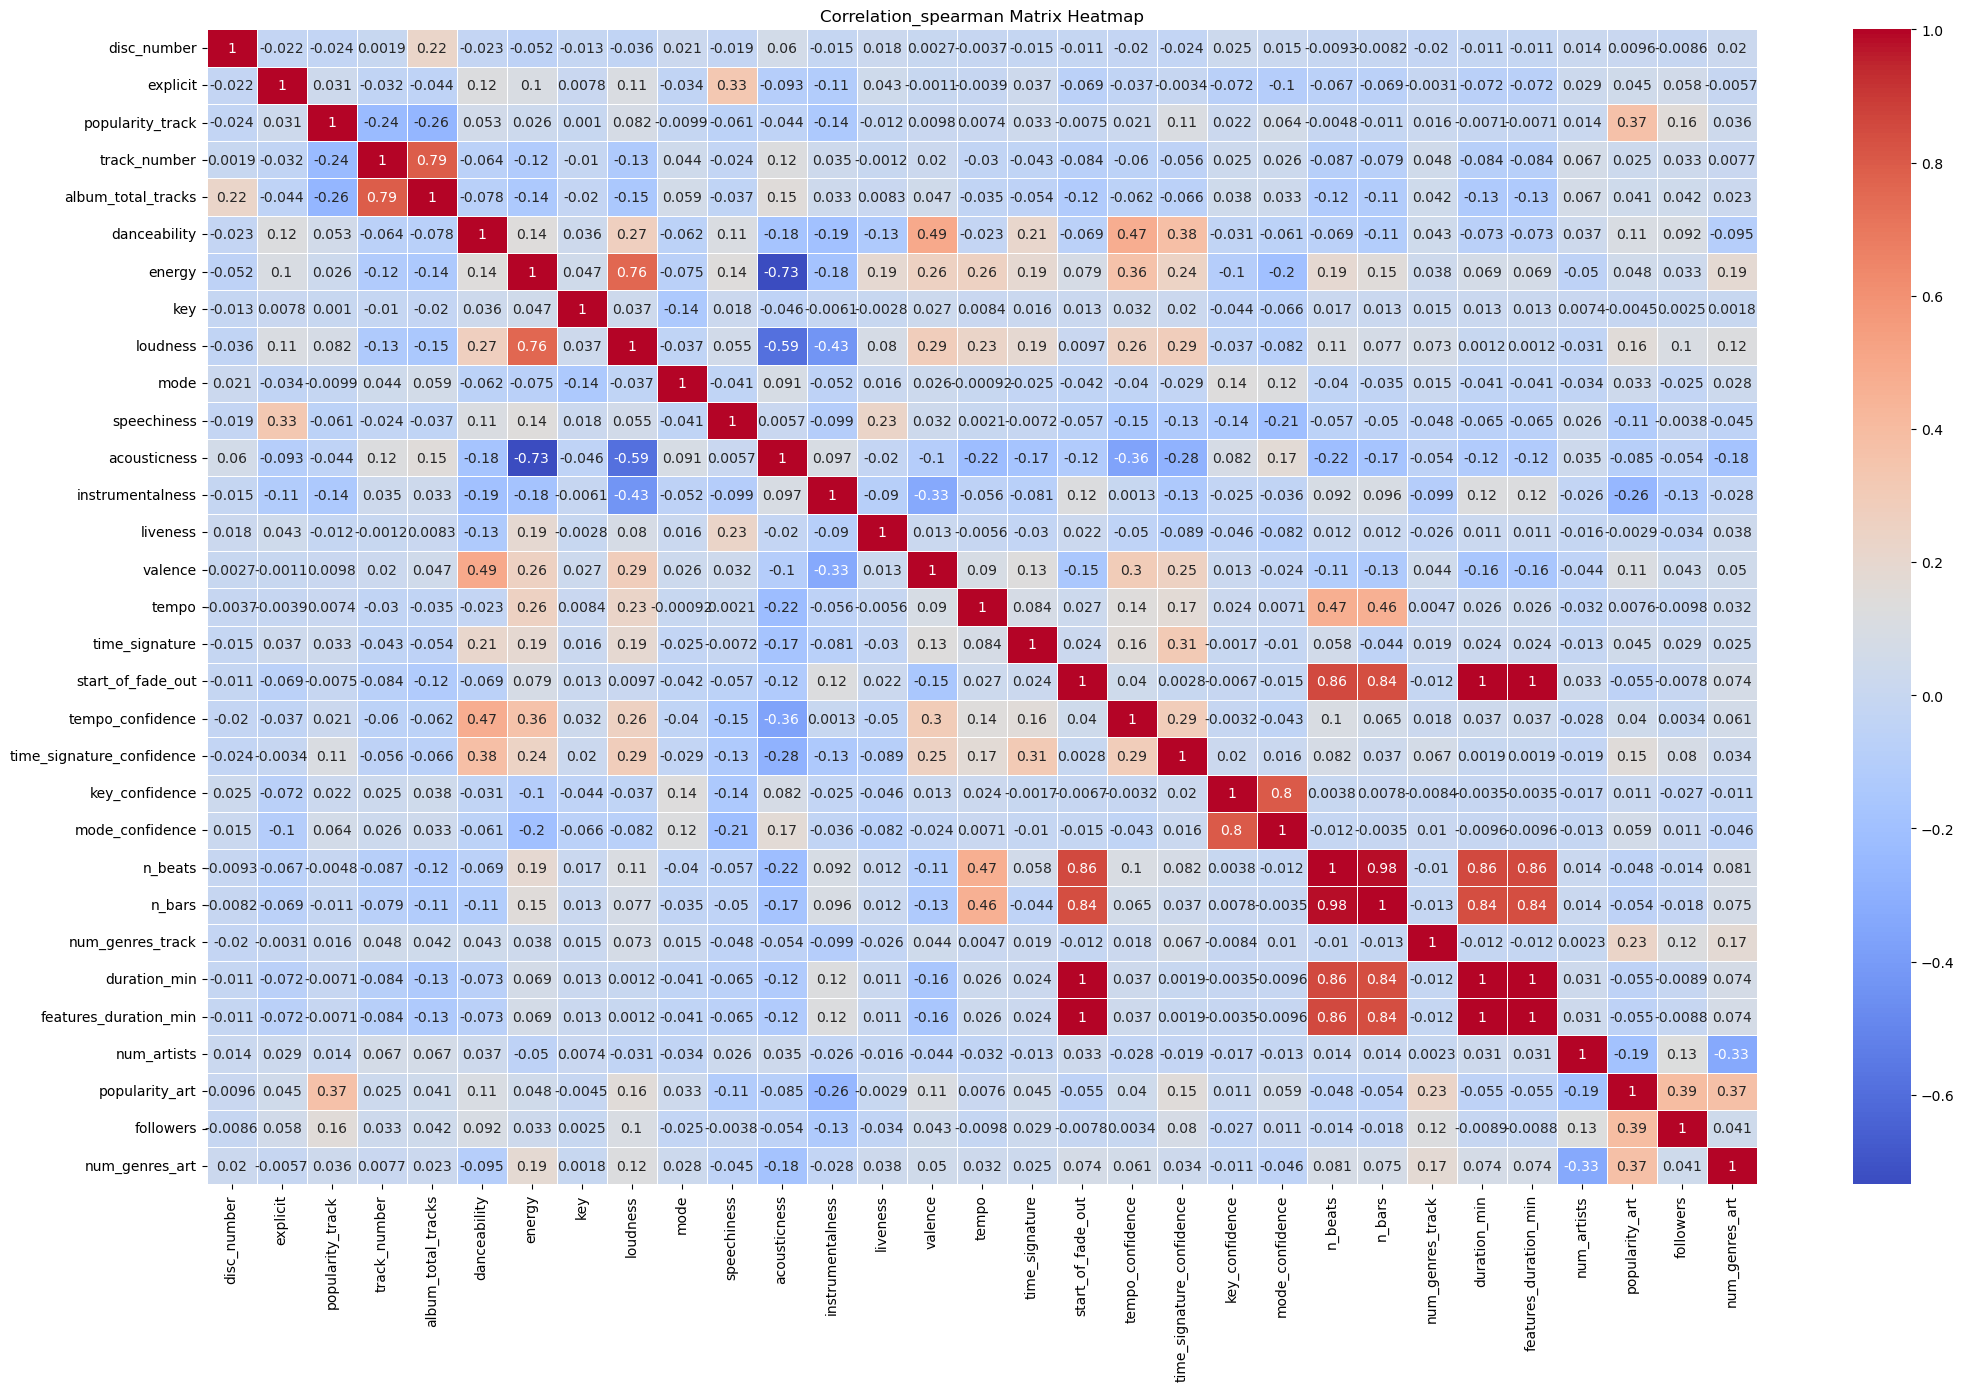

In [1208]:
correlation_spearman = df_final.corr()
correlation_spearman

# make heatmap
plt.figure(figsize=(25, 15))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

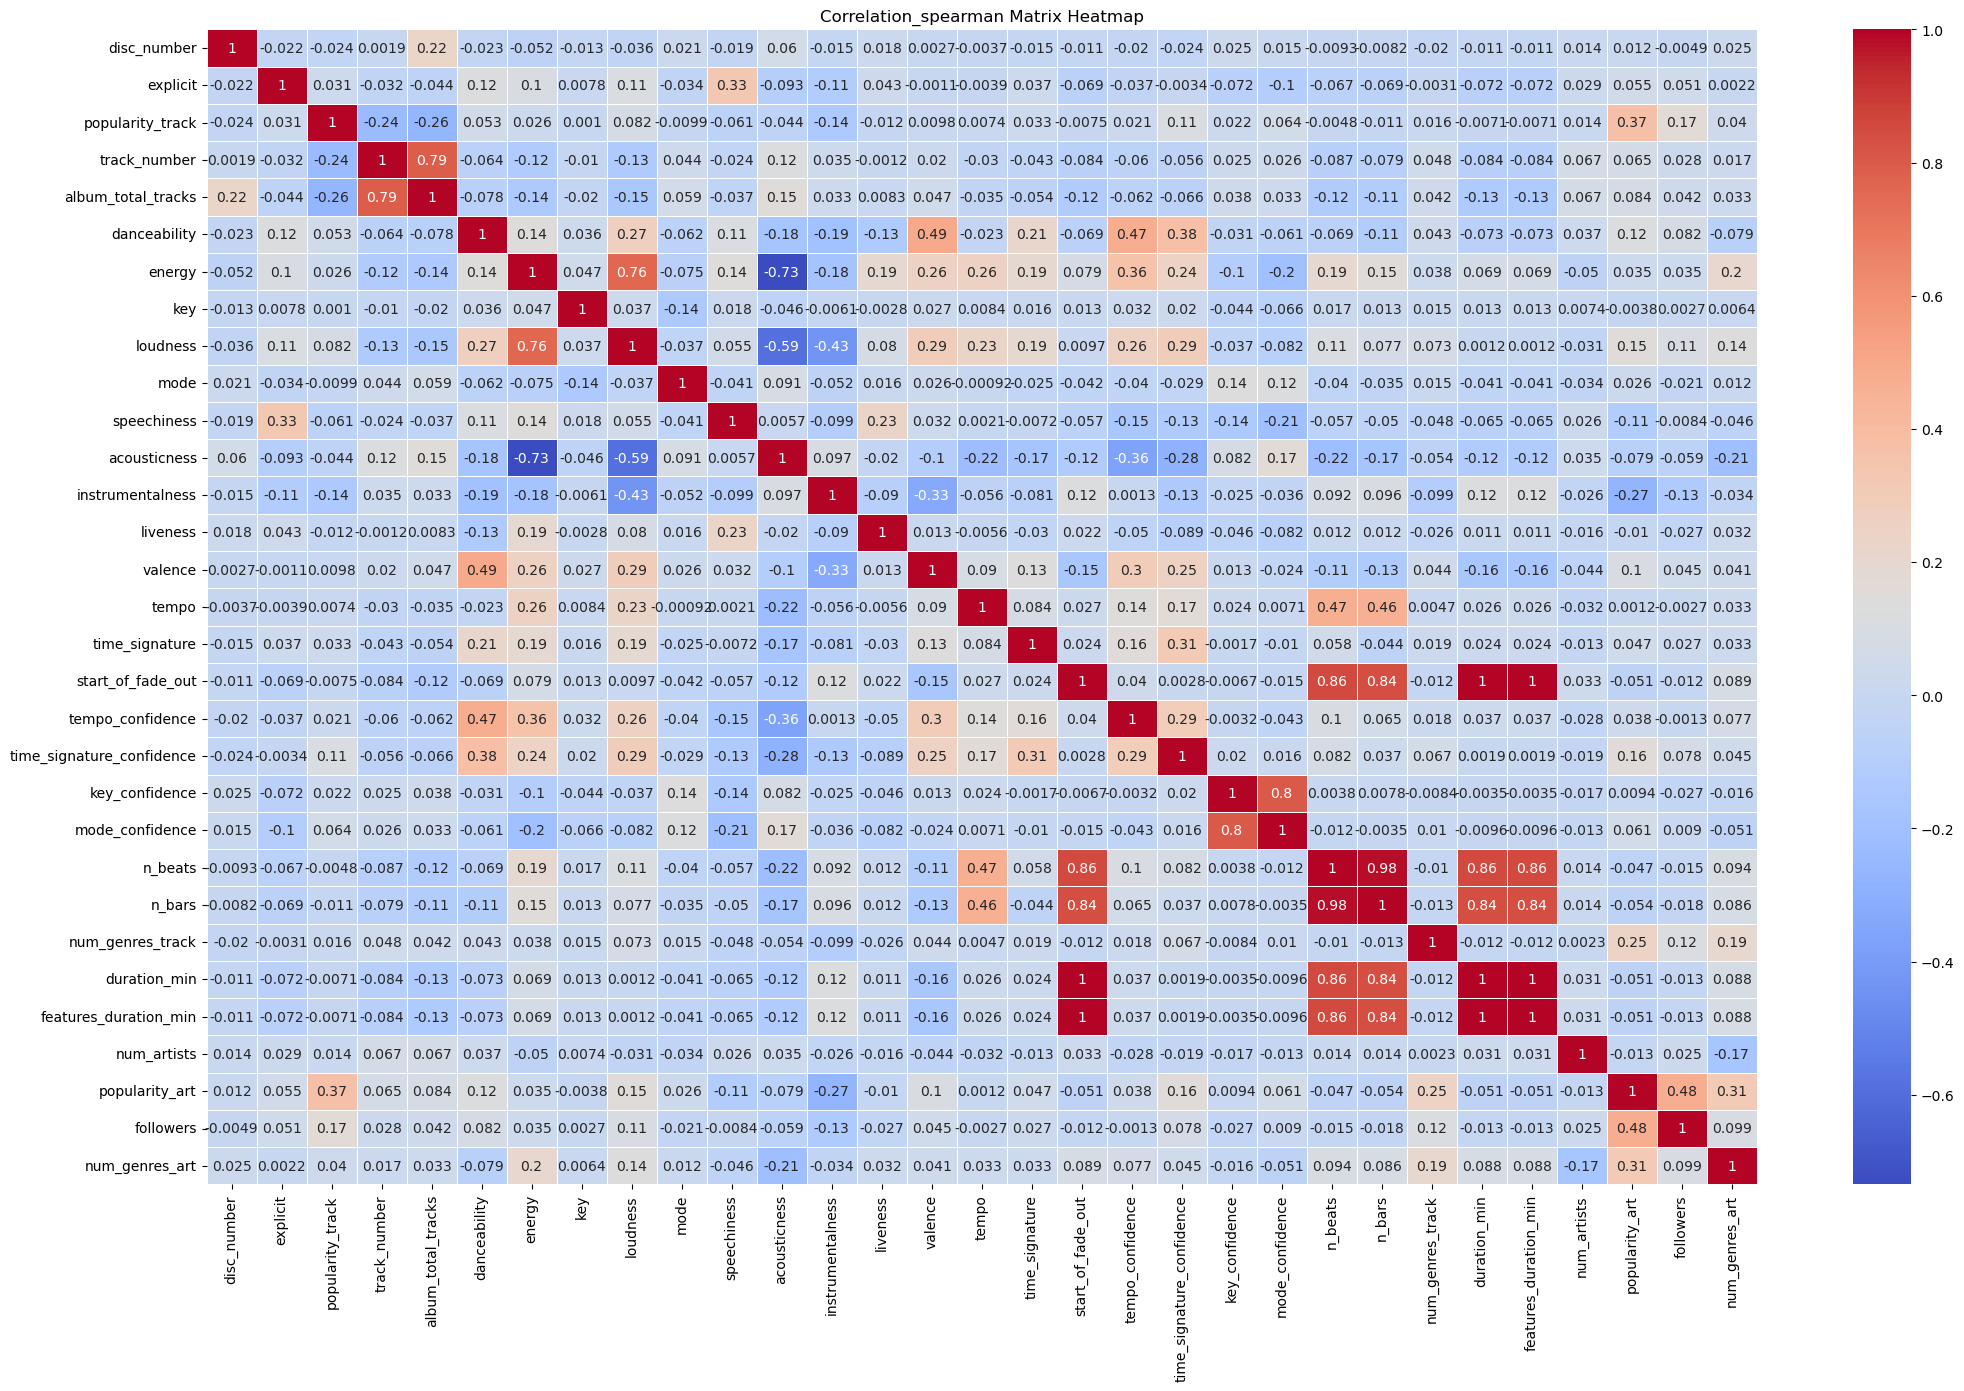

In [1215]:
correlation_spearman = df_final_avg.corr()
correlation_spearman

# make heatmap
plt.figure(figsize=(25, 15))  
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation_spearman Matrix Heatmap')
plt.show()

In [8]:
df_final = pd.read_csv('reduced_merged.csv')

In [15]:
df_final = df_final[[ 'popularity_track', 'track_number', 'album_type', 'album_total_tracks', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'genre', 'duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art',
      ]]

In [16]:
df_final['popularity_track'].describe()

count    88152.000000
mean        31.445940
std         21.531319
min          0.000000
25%         15.000000
50%         31.000000
75%         48.000000
max         95.000000
Name: popularity_track, dtype: float64

In [17]:
df_final['popularity_track_bin'] = df_final['popularity_track'].apply(lambda x: 1 if x >= 31 else 0)

/var/folders/w8/zhd8pb895515_ncyccx0fwym0000gn/T/ipykernel_65594/3468118774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['popularity_track_bin'] = df_final['popularity_track'].apply(lambda x: 1 if x >= 31 else 0)


In [23]:
df_final = df_final[[ 'popularity_track_bin', 'track_number', 'album_type', 'album_total_tracks', 'danceability',
       'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'tempo_confidence', 'mode_confidence',
       'num_genres_track', 'genre', 'duration_min', 'album_release_year',
       'num_artists', 'popularity_art', 'followers', 'num_genres_art',
      ]]

In [24]:
correlation_spearman = df_final.corr(method='spearman')

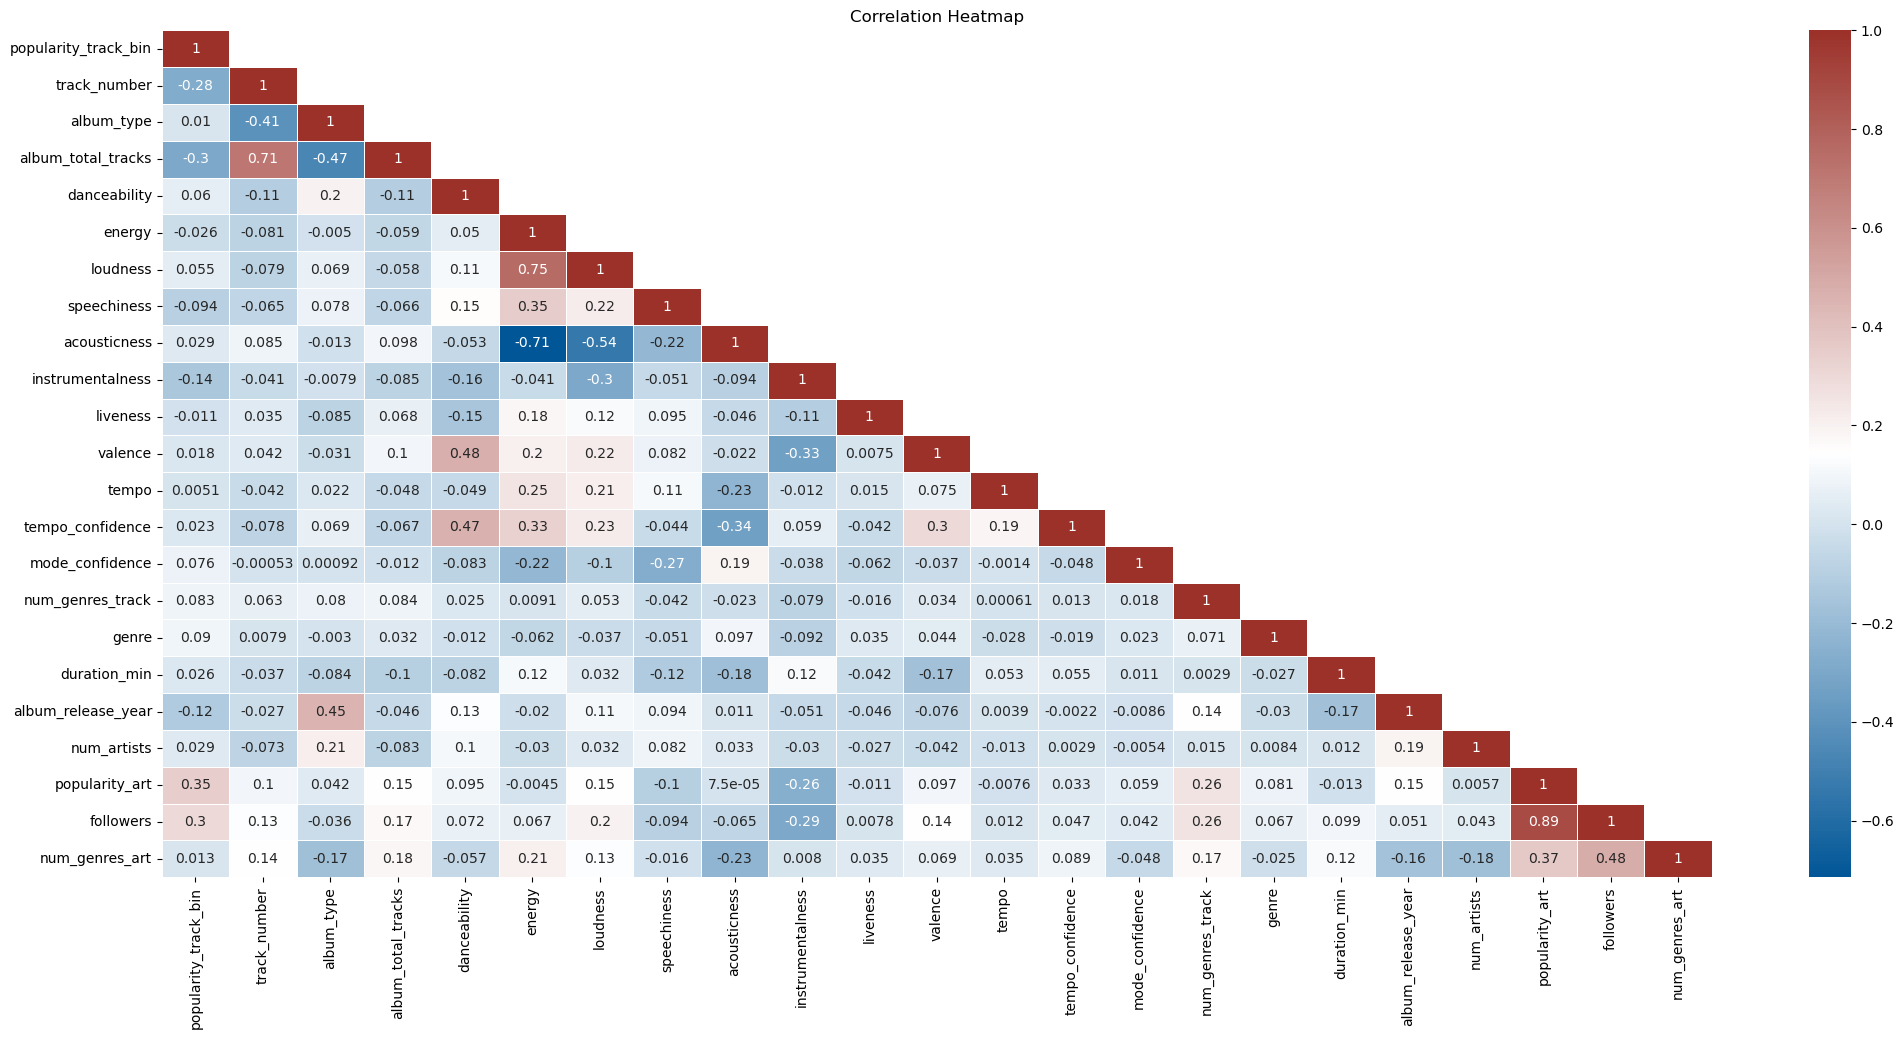

In [25]:
deco_heatmap(correlation_spearman, figsize=(25, 11))

In [1216]:
df_final_avg.to_csv('merged.csv', index=False)